<a href="https://colab.research.google.com/github/cesarrivera52/Concentracion2/blob/main/Actividad_Regresion/RioDeJaneiro/Rio_de_Janeiro_Act3_5_Regresion_Lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad 3.5: Regresion Lineal Simple (Airbnb - Rio de Janeiro)

In [312]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [313]:
#Ajustar el maximo de columnas
pd.options.display.max_columns = None

#Ajustar el maximo de filas
pd.options.display.max_rows = None

In [314]:
#Crear DataFrame
data = pd.read_csv('datos_limpios_iqr.csv')
data.drop('Unnamed: 0',axis=1,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34664 entries, 0 to 34663
Data columns (total 48 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_name                       34664 non-null  object 
 1   host_since                      34664 non-null  object 
 2   host_location                   34664 non-null  object 
 3   host_response_time              34664 non-null  object 
 4   host_is_superhost               34664 non-null  object 
 5   host_neighbourhood              34664 non-null  object 
 6   host_verifications              34664 non-null  object 
 7   host_has_profile_pic            34664 non-null  object 
 8   host_identity_verified          34664 non-null  object 
 9   neighbourhood                   34664 non-null  object 
 10  neighbourhood_cleansed          34664 non-null  object 
 11  property_type                   34664 non-null  object 
 12  room_type                       

In [315]:
#Se corrobora que no haya valores nulos
valores_nulos = data.isnull().sum().sum()
valores_nulos

0

In [316]:
#Dolarizamos la moneda local
data['price']=data['price']*0.18

In [317]:
data['price'].head()

0    55.80
1    36.54
2    39.60
3    36.18
4    57.78
Name: price, dtype: float64

# Regresión Lineal Simple

Para analizar la Regresión Lineal Simple de la base de datos, se llevara a cabo un análisis de la correlación que existe en cuatro tipos de habitación ('room_type') respecto a las siguientes variables:

“host_acceptance_rate vs host_response_rate”

“review_scores_location vs review_scores_cleanliness”

“host_acceptance_rate vs price”

“availability_365 vs number_of_reviews”

“host_acceptance_rate vs number_of_reviews ”

“reviews_per_month vs review_scores_communication”

Cada una se lee de la forma 'dependiente vs independiente' para la realización del modelo.

A partir de los resultados obtenidos, estos se almacenaran en una tabla y se creara el modelo matemático que describa de mejor manera el número de reseñas para cada tipo de alojamiento elegido, utilizando la variable con mayor correlación.

In [318]:
#Libreria para definir model como la función de regresión lineal
from sklearn.linear_model import LinearRegression

# Entire home/apt

In [319]:
#Se genera el SubFrame con los datos donde el tipo de habitacion sea el establecido
home = data[data['room_type'] == 'Entire home/apt']
home.shape

(27383, 48)

## Variables 1

In [320]:
#Declaramos las variables dependientes e independientes para la regresion lineal
vars_indep_A1 = home[['host_response_rate']]
var_dep_A1 = home['host_acceptance_rate']

In [321]:
model_A1 = LinearRegression()

In [322]:
#Ajustamos el modelo con las variables antes declaradas
model_A1.fit(X=vars_indep_A1, y=var_dep_A1)

LinearRegression()

In [323]:
#Predecimos los valores a partir de la variable
y_pred_A1 = model_A1.predict(X=home[['host_response_rate']])

In [324]:
#Insertamos la columna de predicciones en el DataFrame
home.insert(0,'predicciones_1',y_pred_A1)
home.head(3)

predicciones_1                 host_name host_since  \
0        0.834511                  Matthias   08/01/10   
1        0.834511                   Viviane   03/04/10   
3        0.834511  Patricia Miranda & Paulo   27/06/10   

            host_location  host_response_time host_is_superhost  \
0  Rio de Janeiro, Brazil      within an hour                 t   
1  Rio de Janeiro, Brazil      within an hour                 t   
3  Rio de Janeiro, Brazil  within a few hours                 t   

  host_neighbourhood  host_verifications host_has_profile_pic  \
0         Copacabana  ['email', 'phone']                    t   
1         Copacabana  ['email', 'phone']                    t   
3         Copacabana  ['email', 'phone']                    t   

  host_identity_verified           neighbourhood neighbourhood_cleansed  \
0                      t  Rio de Janeiro, Brazil             Copacabana   
1                      t  Rio de Janeiro, Brazil             Copacabana   
3                      t  Rio de Janeiro, Brazil             Copacabana   

        property_type        room_type has_availability instant_bookable  \
0        Entire condo  Entire home/apt                t                f   
1  Entire rental unit  Entire home/apt                t                f   
3         Entire loft  Entire home/apt                t                f   

        id  host_id  host_response_rate  host_acceptance_rate  \
0  17878.0    68997                 1.0                  1.00   
1  25026.0   102840                 1.0                  0.82   
3  35764.0   153691                 1.0                  0.98   

   host_listings_count  host_total_listings_count  latitude  longitude  \
0                  2.0                        5.0 -22.96599  -43.17940   
1                  1.0                        5.0 -22.97735  -43.19105   
3                  1.0                        2.0 -22.98107  -43.19136   

   accommodates  bathrooms  bedrooms  beds  price  minimum_nights  \
0           5.0        1.0       2.0   2.0  55.80             5.0   
1           3.0        1.0       1.0   2.0  36.54             2.0   
3           2.0        1.5       1.0   1.0  36.18             3.0   

   maximum_nights  maximum_maximum_nights  minimum_nights_avg_ntm  \
0            28.0                      28                     5.0   
1            60.0                      60                     2.0   
3            15.0                      15                     3.0   

   maximum_nights_avg_ntm  availability_30  availability_60  availability_90  \
0                    28.0                6               32               51   
1                    60.0               24               54               71   
3                    15.0                5               10               24   

   availability_365  number_of_reviews  number_of_reviews_ltm  \
0               274               10.0                   23.0   
1               241               10.0                   23.0   
3                93               10.0                    4.7   

   review_scores_rating  review_scores_accuracy  review_scores_cleanliness  \
0                  4.71                    4.77                       4.64   
1                  4.73                    4.71                       4.79   
3                  4.91                    4.94                       4.92   

   review_scores_checkin  review_scores_communication  review_scores_location  \
0                   4.84                         4.91                    4.77   
1                   4.82                         4.92                    4.84   
3                   4.97                         4.95                    4.94   

   review_scores_value  calculated_host_listings_count  reviews_per_month  
0                 4.67                             1.0               1.88  
1                 4.62                             1.0               1.70  
3                 4.89                             1.0               2.85

<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

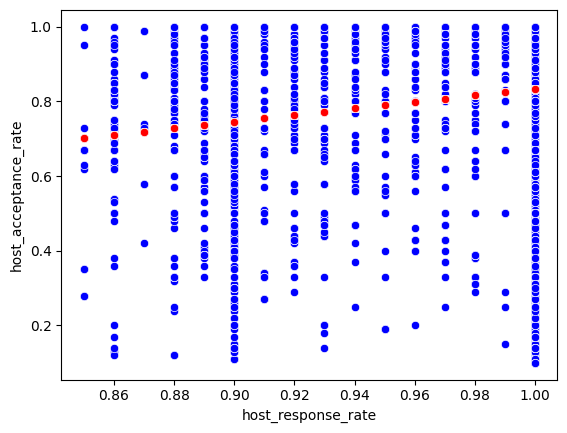

In [325]:
#Visualizamos la gráfica comparativa
sns.scatterplot(x='host_response_rate', y='host_acceptance_rate', color='blue', data=home)
sns.scatterplot(x='host_response_rate', y='predicciones_1', color='red', data=home)

In [326]:
#Corrobaremos cual es el coeficiente de Determinacion de nuestro modelo (R_Cuadrada)
coef_deter_A1 = model_A1.score(X=vars_indep_A1, y=var_dep_A1)
coef_deter_A1

0.01112195810005534

In [327]:
#Corroboramos cual es el coeficiente de correlacion de nuestro modelo (R)
coef_correl_A1 = np.sqrt(coef_deter_A1)
coef_correl_A1

0.1054606945741177

## Variables 2

In [328]:
#Declaramos las variables dependientes e independientes para la regresion lineal
vars_indep_A2 = home[['review_scores_cleanliness']]
var_dep_A2 = home['review_scores_location']

In [329]:
model_A2 = LinearRegression()

In [330]:
#Ajustamos el modelo con las variables antes declaradas
model_A2.fit(X=vars_indep_A2, y=var_dep_A2)

LinearRegression()

In [331]:
#Predecimos los valores a partir de la variable
y_pred_A2 = model_A2.predict(X=home[['review_scores_cleanliness']])

In [332]:
#Insertamos la columna de predicciones en el DataFrame
home.insert(1,'predicciones_2 host_acceptance_rate vs host_response_rate',y_pred_A2)
home.head(3)

predicciones_1  predicciones_2 host_acceptance_rate vs host_response_rate  \
0        0.834511                                           4.906763           
1        0.834511                                           4.925434           
3        0.834511                                           4.941615           

                  host_name host_since           host_location  \
0                  Matthias   08/01/10  Rio de Janeiro, Brazil   
1                   Viviane   03/04/10  Rio de Janeiro, Brazil   
3  Patricia Miranda & Paulo   27/06/10  Rio de Janeiro, Brazil   

   host_response_time host_is_superhost host_neighbourhood  \
0      within an hour                 t         Copacabana   
1      within an hour                 t         Copacabana   
3  within a few hours                 t         Copacabana   

   host_verifications host_has_profile_pic host_identity_verified  \
0  ['email', 'phone']                    t                      t   
1  ['email', 'phone']                    t                      t   
3  ['email', 'phone']                    t                      t   

            neighbourhood neighbourhood_cleansed       property_type  \
0  Rio de Janeiro, Brazil             Copacabana        Entire condo   
1  Rio de Janeiro, Brazil             Copacabana  Entire rental unit   
3  Rio de Janeiro, Brazil             Copacabana         Entire loft   

         room_type has_availability instant_bookable       id  host_id  \
0  Entire home/apt                t                f  17878.0    68997   
1  Entire home/apt                t                f  25026.0   102840   
3  Entire home/apt                t                f  35764.0   153691   

   host_response_rate  host_acceptance_rate  host_listings_count  \
0                 1.0                  1.00                  2.0   
1                 1.0                  0.82                  1.0   
3                 1.0                  0.98                  1.0   

   host_total_listings_count  latitude  longitude  accommodates  bathrooms  \
0                        5.0 -22.96599  -43.17940           5.0        1.0   
1                        5.0 -22.97735  -43.19105           3.0        1.0   
3                        2.0 -22.98107  -43.19136           2.0        1.5   

   bedrooms  beds  price  minimum_nights  maximum_nights  \
0       2.0   2.0  55.80             5.0            28.0   
1       1.0   2.0  36.54             2.0            60.0   
3       1.0   1.0  36.18             3.0            15.0   

   maximum_maximum_nights  minimum_nights_avg_ntm  maximum_nights_avg_ntm  \
0                      28                     5.0                    28.0   
1                      60                     2.0                    60.0   
3                      15                     3.0                    15.0   

   availability_30  availability_60  availability_90  availability_365  \
0                6               32               51               274   
1               24               54               71               241   
3                5               10               24                93   

   number_of_reviews  number_of_reviews_ltm  review_scores_rating  \
0               10.0                   23.0                  4.71   
1               10.0                   23.0                  4.73   
3               10.0                    4.7                  4.91   

   review_scores_accuracy  review_scores_cleanliness  review_scores_checkin  \
0                    4.77                       4.64                   4.84   
1                    4.71                       4.79                   4.82   
3                    4.94                       4.92                   4.97   

   review_scores_communication  review_scores_location  review_scores_value  \
0                         4.91                    4.77                 4.67   
1                         4.92                    4.84                 4.62   
3                         4.95           

<Axes: xlabel='review_scores_cleanliness', ylabel='review_scores_location'>

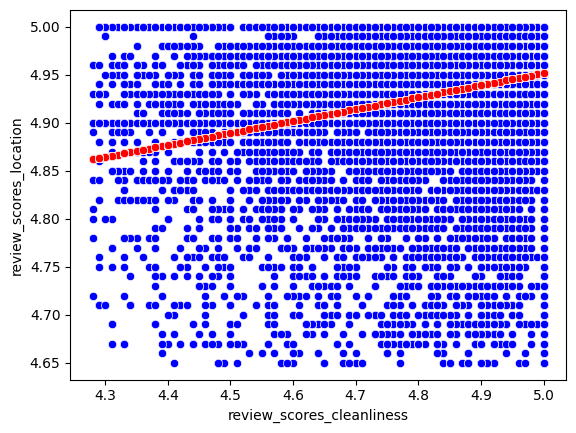

In [333]:
#Visualizamos la gráfica comparativa
sns.scatterplot(x='review_scores_cleanliness', y='review_scores_location', color='blue', data=home)
sns.scatterplot(x='review_scores_cleanliness', y='predicciones_2 host_acceptance_rate vs host_response_rate', color='red', data=home)

In [334]:
#Corrobaremos cual es el coeficiente de Determinacion de nuestro modelo (R_Cuadrada)
coef_deter_A2 = model_A2.score(X=vars_indep_A2, y=var_dep_A2)
coef_deter_A2

0.0615961358739916

In [335]:
#Corroboramos cual es el coeficiente de correlacion de nuestro modelo (R)
coef_correl_A2 = np.sqrt(coef_deter_A2)
coef_correl_A2

0.2481856882940505

In [336]:
model_A2.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.12447189]),
 'rank_': 1,
 'singular_': array([28.09575915]),
 'intercept_': 4.329213480335983}

MODELO MATEMÁTICO:

**X 0.12447189 + 4.329213480335983**

## Variables 3

In [337]:
#Declaramos las variables dependientes e independientes para la regresion lineal
vars_indep_A3 = home[['price']]
var_dep_A3 = home['host_acceptance_rate']

In [338]:
model_A3 = LinearRegression()

In [339]:
#Ajustamos el modelo con las variables antes declaradas
model_A3.fit(X=vars_indep_A3, y=var_dep_A3)

LinearRegression()

In [340]:
#Predecimos los valores a partir de la variable
y_pred_A3 = model_A3.predict(X=home[['price']])

In [341]:
#Insertamos la columna de predicciones en el DataFrame
home.insert(2,'predicciones_3',y_pred_A3)
home.head(3)

predicciones_1  predicciones_2 host_acceptance_rate vs host_response_rate  \
0        0.834511                                           4.906763           
1        0.834511                                           4.925434           
3        0.834511                                           4.941615           

   predicciones_3                 host_name host_since  \
0        0.834541                  Matthias   08/01/10   
1        0.845338                   Viviane   03/04/10   
3        0.845540  Patricia Miranda & Paulo   27/06/10   

            host_location  host_response_time host_is_superhost  \
0  Rio de Janeiro, Brazil      within an hour                 t   
1  Rio de Janeiro, Brazil      within an hour                 t   
3  Rio de Janeiro, Brazil  within a few hours                 t   

  host_neighbourhood  host_verifications host_has_profile_pic  \
0         Copacabana  ['email', 'phone']                    t   
1         Copacabana  ['email', 'phone']                    t   
3         Copacabana  ['email', 'phone']                    t   

  host_identity_verified           neighbourhood neighbourhood_cleansed  \
0                      t  Rio de Janeiro, Brazil             Copacabana   
1                      t  Rio de Janeiro, Brazil             Copacabana   
3                      t  Rio de Janeiro, Brazil             Copacabana   

        property_type        room_type has_availability instant_bookable  \
0        Entire condo  Entire home/apt                t                f   
1  Entire rental unit  Entire home/apt                t                f   
3         Entire loft  Entire home/apt                t                f   

        id  host_id  host_response_rate  host_acceptance_rate  \
0  17878.0    68997                 1.0                  1.00   
1  25026.0   102840                 1.0                  0.82   
3  35764.0   153691                 1.0                  0.98   

   host_listings_count  host_total_listings_count  latitude  longitude  \
0                  2.0                        5.0 -22.96599  -43.17940   
1                  1.0                        5.0 -22.97735  -43.19105   
3                  1.0                        2.0 -22.98107  -43.19136   

   accommodates  bathrooms  bedrooms  beds  price  minimum_nights  \
0           5.0        1.0       2.0   2.0  55.80             5.0   
1           3.0        1.0       1.0   2.0  36.54             2.0   
3           2.0        1.5       1.0   1.0  36.18             3.0   

   maximum_nights  maximum_maximum_nights  minimum_nights_avg_ntm  \
0            28.0                      28                     5.0   
1            60.0                      60                     2.0   
3            15.0                      15                     3.0   

   maximum_nights_avg_ntm  availability_30  availability_60  availability_90  \
0                    28.0                6               32               51   
1                    60.0               24               54               71   
3                    15.0                5               10               24   

   availability_365  number_of_reviews  number_of_reviews_ltm  \
0               274               10.0                   23.0   
1               241               10.0                   23.0   
3                93               10.0                    4.7   

   review_scores_rating  review_scores_accuracy  review_scores_cleanliness  \
0                  4.71                    4.77                       4.64   
1                  4.73                    4.71                       4.79   
3                  4.91                    4.94                       4.92   

   review_scores_checkin  review_scores_communication  review_scores_location  \
0                   4.84                         4.91                    4.77   
1                   4.82                         4.92                    4.84   
3                   4.97                         4.95          

<Axes: xlabel='price', ylabel='host_acceptance_rate'>

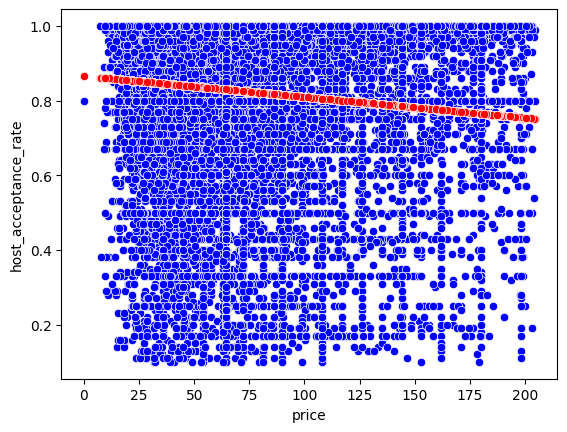

In [342]:
#Visualizamos la gráfica comparativa
sns.scatterplot(x='price', y='host_acceptance_rate', color='blue', data=home)
sns.scatterplot(x='price', y='predicciones_3', color='red', data=home)

In [343]:
#Corrobaremos cual es el coeficiente de Determinacion de nuestro modelo (R_Cuadrada)
coef_deter_A3 = model_A3.score(X=vars_indep_A3, y=var_dep_A3)
coef_deter_A3

0.010516183720194694

In [344]:
#Corroboramos cual es el coeficiente de correlacion de nuestro modelo (R)
coef_correl_A3 = np.sqrt(coef_deter_A3)
coef_correl_A3

0.10254844572295913

## Variables 4

In [345]:
#Declaramos las variables dependientes e independientes para la regresion lineal
vars_indep_A4 = home[['number_of_reviews']]
var_dep_A4 = home['availability_365']

In [346]:
model_A4 = LinearRegression()

In [347]:
#Ajustamos el modelo con las variables antes declaradas
model_A4.fit(X=vars_indep_A4, y=var_dep_A4)

LinearRegression()

In [348]:
#Predecimos los valores a partir de la variable
y_pred_A4 = model_A4.predict(X=home[['number_of_reviews']])

In [349]:
#Insertamos la columna de predicciones en el DataFrame
home.insert(3,'predicciones_4',y_pred_A4)
home.head(3)

predicciones_1  predicciones_2 host_acceptance_rate vs host_response_rate  \
0        0.834511                                           4.906763           
1        0.834511                                           4.925434           
3        0.834511                                           4.941615           

   predicciones_3  predicciones_4                 host_name host_since  \
0        0.834541      198.277204                  Matthias   08/01/10   
1        0.845338      198.277204                   Viviane   03/04/10   
3        0.845540      198.277204  Patricia Miranda & Paulo   27/06/10   

            host_location  host_response_time host_is_superhost  \
0  Rio de Janeiro, Brazil      within an hour                 t   
1  Rio de Janeiro, Brazil      within an hour                 t   
3  Rio de Janeiro, Brazil  within a few hours                 t   

  host_neighbourhood  host_verifications host_has_profile_pic  \
0         Copacabana  ['email', 'phone']                    t   
1         Copacabana  ['email', 'phone']                    t   
3         Copacabana  ['email', 'phone']                    t   

  host_identity_verified           neighbourhood neighbourhood_cleansed  \
0                      t  Rio de Janeiro, Brazil             Copacabana   
1                      t  Rio de Janeiro, Brazil             Copacabana   
3                      t  Rio de Janeiro, Brazil             Copacabana   

        property_type        room_type has_availability instant_bookable  \
0        Entire condo  Entire home/apt                t                f   
1  Entire rental unit  Entire home/apt                t                f   
3         Entire loft  Entire home/apt                t                f   

        id  host_id  host_response_rate  host_acceptance_rate  \
0  17878.0    68997                 1.0                  1.00   
1  25026.0   102840                 1.0                  0.82   
3  35764.0   153691                 1.0                  0.98   

   host_listings_count  host_total_listings_count  latitude  longitude  \
0                  2.0                        5.0 -22.96599  -43.17940   
1                  1.0                        5.0 -22.97735  -43.19105   
3                  1.0                        2.0 -22.98107  -43.19136   

   accommodates  bathrooms  bedrooms  beds  price  minimum_nights  \
0           5.0        1.0       2.0   2.0  55.80             5.0   
1           3.0        1.0       1.0   2.0  36.54             2.0   
3           2.0        1.5       1.0   1.0  36.18             3.0   

   maximum_nights  maximum_maximum_nights  minimum_nights_avg_ntm  \
0            28.0                      28                     5.0   
1            60.0                      60                     2.0   
3            15.0                      15                     3.0   

   maximum_nights_avg_ntm  availability_30  availability_60  availability_90  \
0                    28.0                6               32               51   
1                    60.0               24               54               71   
3                    15.0                5               10               24   

   availability_365  number_of_reviews  number_of_reviews_ltm  \
0               274               10.0                   23.0   
1               241               10.0                   23.0   
3                93               10.0                    4.7   

   review_scores_rating  review_scores_accuracy  review_scores_cleanliness  \
0                  4.71                    4.77                       4.64   
1                  4.73                    4.71                       4.79   
3                  4.91                    4.94                       4.92   

   review_scores_checkin  review_scores_communication  review_scores_location  \
0                   4.84                         4.91                    4.77   
1                   4.82                         4.92                    4.84   

<Axes: xlabel='number_of_reviews', ylabel='availability_365'>

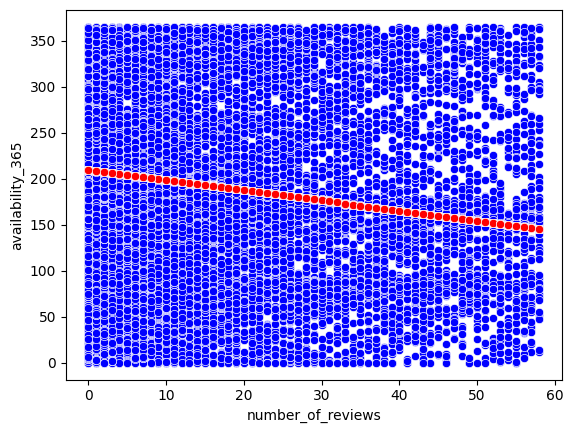

In [350]:
#Visualizamos la gráfica comparativa
sns.scatterplot(x='number_of_reviews', y='availability_365', color='blue', data=home)
sns.scatterplot(x='number_of_reviews', y='predicciones_4', color='red', data=home)

In [351]:
#Corrobaremos cual es el coeficiente de Determinacion de nuestro modelo (R_Cuadrada)
coef_deter_A4 = model_A4.score(X=vars_indep_A4, y=var_dep_A4)
coef_deter_A4

0.016220137274977287

In [352]:
#Corroboramos cual es el coeficiente de correlacion de nuestro modelo (R)
coef_correl_A4 = np.sqrt(coef_deter_A4)
coef_correl_A4

0.1273583027327912

## Variables 5

In [353]:
#Declaramos las variables dependientes e independientes para la regresion lineal
vars_indep_A5 = home[['number_of_reviews']]
var_dep_A5 = home['host_acceptance_rate']

In [354]:
model_A5 = LinearRegression()

In [355]:
#Ajustamos el modelo con las variables antes declaradas
model_A5.fit(X=vars_indep_A5, y=var_dep_A5)

LinearRegression()

In [356]:
#Predecimos los valores a partir de la variable
y_pred_A5 = model_A5.predict(X=home[['number_of_reviews']])

In [357]:
#Insertamos la columna de predicciones en el DataFrame
home.insert(4,'predicciones_5',y_pred_A5)
home.head(3)

predicciones_1  predicciones_2 host_acceptance_rate vs host_response_rate  \
0        0.834511                                           4.906763           
1        0.834511                                           4.925434           
3        0.834511                                           4.941615           

   predicciones_3  predicciones_4  predicciones_5                 host_name  \
0        0.834541      198.277204        0.824196                  Matthias   
1        0.845338      198.277204        0.824196                   Viviane   
3        0.845540      198.277204        0.824196  Patricia Miranda & Paulo   

  host_since           host_location  host_response_time host_is_superhost  \
0   08/01/10  Rio de Janeiro, Brazil      within an hour                 t   
1   03/04/10  Rio de Janeiro, Brazil      within an hour                 t   
3   27/06/10  Rio de Janeiro, Brazil  within a few hours                 t   

  host_neighbourhood  host_verifications host_has_profile_pic  \
0         Copacabana  ['email', 'phone']                    t   
1         Copacabana  ['email', 'phone']                    t   
3         Copacabana  ['email', 'phone']                    t   

  host_identity_verified           neighbourhood neighbourhood_cleansed  \
0                      t  Rio de Janeiro, Brazil             Copacabana   
1                      t  Rio de Janeiro, Brazil             Copacabana   
3                      t  Rio de Janeiro, Brazil             Copacabana   

        property_type        room_type has_availability instant_bookable  \
0        Entire condo  Entire home/apt                t                f   
1  Entire rental unit  Entire home/apt                t                f   
3         Entire loft  Entire home/apt                t                f   

        id  host_id  host_response_rate  host_acceptance_rate  \
0  17878.0    68997                 1.0                  1.00   
1  25026.0   102840                 1.0                  0.82   
3  35764.0   153691                 1.0                  0.98   

   host_listings_count  host_total_listings_count  latitude  longitude  \
0                  2.0                        5.0 -22.96599  -43.17940   
1                  1.0                        5.0 -22.97735  -43.19105   
3                  1.0                        2.0 -22.98107  -43.19136   

   accommodates  bathrooms  bedrooms  beds  price  minimum_nights  \
0           5.0        1.0       2.0   2.0  55.80             5.0   
1           3.0        1.0       1.0   2.0  36.54             2.0   
3           2.0        1.5       1.0   1.0  36.18             3.0   

   maximum_nights  maximum_maximum_nights  minimum_nights_avg_ntm  \
0            28.0                      28                     5.0   
1            60.0                      60                     2.0   
3            15.0                      15                     3.0   

   maximum_nights_avg_ntm  availability_30  availability_60  availability_90  \
0                    28.0                6               32               51   
1                    60.0               24               54               71   
3                    15.0                5               10               24   

   availability_365  number_of_reviews  number_of_reviews_ltm  \
0               274               10.0                   23.0   
1               241               10.0                   23.0   
3                93               10.0                    4.7   

   review_scores_rating  review_scores_accuracy  review_scores_cleanliness  \
0                  4.71                    4.77                       4.64   
1                  4.73                    4.71                       4.79   
3                  4.91                    4.94                       4.92   

   review_scores_checkin  review_scores_communication  review_scores_location  \
0                   4.84                         4.91                    4.77   
1               

<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

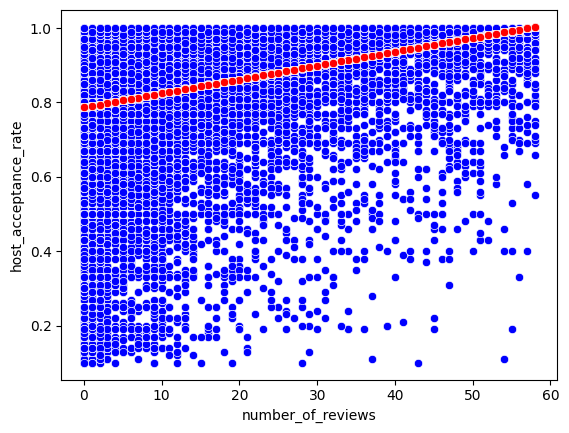

In [358]:
#Visualizamos la gráfica comparativa
sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color='blue', data=home)
sns.scatterplot(x='number_of_reviews', y='predicciones_5', color='red', data=home)

In [359]:
#Corrobaremos cual es el coeficiente de Determinacion de nuestro modelo (R_Cuadrada)
coef_deter_A5 = model_A5.score(X=vars_indep_A5, y=var_dep_A5)
coef_deter_A5

0.052031893817294006

In [360]:
#Corroboramos cual es el coeficiente de correlacion de nuestro modelo (R)
coef_correl_A5 = np.sqrt(coef_deter_A5)
coef_correl_A5

0.22810500612063297

## Variables 6

In [361]:
#Declaramos las variables dependientes e independientes para la regresion lineal
vars_indep_A6 = home[['review_scores_communication']]
var_dep_A6 = home['reviews_per_month']

In [362]:
model_A6 = LinearRegression()

In [363]:
#Ajustamos el modelo con las variables antes declaradas
model_A6.fit(X=vars_indep_A6, y=var_dep_A6)

LinearRegression()

In [364]:
#Predecimos los valores a partir de la variable
y_pred_A6 = model_A6.predict(X=home[['review_scores_communication']])

In [365]:
#Insertamos la columna de predicciones en el DataFrame
home.insert(5,'predicciones_6',y_pred_A6)
home.head(3)

predicciones_1  predicciones_2 host_acceptance_rate vs host_response_rate  \
0        0.834511                                           4.906763           
1        0.834511                                           4.925434           
3        0.834511                                           4.941615           

   predicciones_3  predicciones_4  predicciones_5  predicciones_6  \
0        0.834541      198.277204        0.824196        1.086618   
1        0.845338      198.277204        0.824196        1.067060   
3        0.845540      198.277204        0.824196        1.008387   

                  host_name host_since           host_location  \
0                  Matthias   08/01/10  Rio de Janeiro, Brazil   
1                   Viviane   03/04/10  Rio de Janeiro, Brazil   
3  Patricia Miranda & Paulo   27/06/10  Rio de Janeiro, Brazil   

   host_response_time host_is_superhost host_neighbourhood  \
0      within an hour                 t         Copacabana   
1      within an hour                 t         Copacabana   
3  within a few hours                 t         Copacabana   

   host_verifications host_has_profile_pic host_identity_verified  \
0  ['email', 'phone']                    t                      t   
1  ['email', 'phone']                    t                      t   
3  ['email', 'phone']                    t                      t   

            neighbourhood neighbourhood_cleansed       property_type  \
0  Rio de Janeiro, Brazil             Copacabana        Entire condo   
1  Rio de Janeiro, Brazil             Copacabana  Entire rental unit   
3  Rio de Janeiro, Brazil             Copacabana         Entire loft   

         room_type has_availability instant_bookable       id  host_id  \
0  Entire home/apt                t                f  17878.0    68997   
1  Entire home/apt                t                f  25026.0   102840   
3  Entire home/apt                t                f  35764.0   153691   

   host_response_rate  host_acceptance_rate  host_listings_count  \
0                 1.0                  1.00                  2.0   
1                 1.0                  0.82                  1.0   
3                 1.0                  0.98                  1.0   

   host_total_listings_count  latitude  longitude  accommodates  bathrooms  \
0                        5.0 -22.96599  -43.17940           5.0        1.0   
1                        5.0 -22.97735  -43.19105           3.0        1.0   
3                        2.0 -22.98107  -43.19136           2.0        1.5   

   bedrooms  beds  price  minimum_nights  maximum_nights  \
0       2.0   2.0  55.80             5.0            28.0   
1       1.0   2.0  36.54             2.0            60.0   
3       1.0   1.0  36.18             3.0            15.0   

   maximum_maximum_nights  minimum_nights_avg_ntm  maximum_nights_avg_ntm  \
0                      28                     5.0                    28.0   
1                      60                     2.0                    60.0   
3                      15                     3.0                    15.0   

   availability_30  availability_60  availability_90  availability_365  \
0                6               32               51               274   
1               24               54               71               241   
3                5               10               24                93   

   number_of_reviews  number_of_reviews_ltm  review_scores_rating  \
0               10.0                   23.0                  4.71   
1               10.0                   23.0                  4.73   
3               10.0                    4.7                  4.91   

   review_scores_accuracy  review_scores_cleanliness  review_scores_checkin  \
0                    4.77                       4.64                   4.84   
1                    4.71                       4.79                   4.82   
3                    4.94                       4.92                   4.97   

 

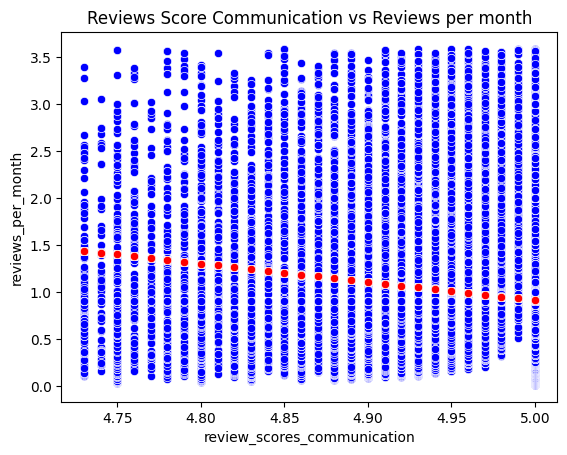

In [366]:
#Visualizamos la gráfica comparativa
sns.scatterplot(x='review_scores_communication', y='reviews_per_month', color='blue', data=home)
sns.scatterplot(x='review_scores_communication', y='predicciones_6', color='red', data=home)
plt.title('Reviews Score Communication vs Reviews per month')
plt.show()

In [367]:
#Corrobaremos cual es el coeficiente de Determinacion de nuestro modelo (R_Cuadrada)
coef_deter_A6 = model_A6.score(X=vars_indep_A6, y=var_dep_A6)
coef_deter_A6

0.022833675020370703

In [368]:
#Corroboramos cual es el coeficiente de correlacion de nuestro modelo (R)
coef_correl_A6 = np.sqrt(coef_deter_A6)
coef_correl_A6

0.15110815669701852

# Tabla de Coeficientes de Determinación y Correlación

In [369]:
#Preparar datos del Frame
coef_data = {'Coef_Deter':[coef_deter_A1,coef_deter_A2,coef_deter_A3,coef_deter_A4,coef_deter_A5,coef_deter_A6],
             'Coef_Correl':[coef_correl_A1,coef_correl_A2,coef_correl_A3,coef_correl_A4,coef_correl_A5,coef_correl_A6]}

#Generar con llaves
df_coef_A = pd.DataFrame(coef_data,index=['host_acceptance_rate vs host_response_rate','review_scores_location vs review_scores_cleanliness','host_acceptance_rate vs price','availability_365 vs number_of_reviews','host_acceptance_rate vs number_of_reviews','reviews_per_month vs review_scores_communication'])
print('Tabla de Coeficientes de Determinación y Correlación subdataframe HOME\n\n', df_coef_A)


Tabla de Coeficientes de Determinación y Correlación subdataframe HOME

                                                     Coef_Deter  Coef_Correl
host_acceptance_rate vs host_response_rate            0.011122     0.105461
review_scores_location vs review_scores_cleanli...    0.061596     0.248186
host_acceptance_rate vs price                         0.010516     0.102548
availability_365 vs number_of_reviews                 0.016220     0.127358
host_acceptance_rate vs number_of_reviews             0.052032     0.228105
reviews_per_month vs review_scores_communication      0.022834     0.151108


# Private room

In [370]:
#Se genera el SubFrame con los datos donde el tipo de habitacion sea el establecido
private_room = data[data['room_type'] == 'Private room']
len(private_room)

6643

## Variables 1

In [371]:
#Declaramos las variables dependientes e independientes para la regresion lineal
vars_indep_B1 = private_room[['host_response_rate']]
var_dep_B1 = private_room['host_acceptance_rate']

In [372]:
model_B1 = LinearRegression()

In [373]:
#Ajustamos el modelo con las variables antes declaradas
model_B1.fit(X=vars_indep_B1, y=var_dep_B1)

LinearRegression()

In [374]:
#Predecimos los valores a partir de la variable
y_pred_B1 = model_B1.predict(X=private_room[['host_response_rate']])

In [375]:
#Insertamos la columna de predicciones en el DataFrame
private_room.insert(0,'predicciones_1',y_pred_B1)
private_room.head(3)

predicciones_1 host_name host_since           host_location  \
2         0.798085   Taciana   11/09/11  Rio de Janeiro, Brazil   
21        0.798085     Sonia   18/10/11  Rio de Janeiro, Brazil   
33        0.798085     Neyde   20/11/11  Rio de Janeiro, Brazil   

   host_response_time host_is_superhost host_neighbourhood  \
2      within an hour                 f             Tijuca   
21     within an hour                 t         Copacabana   
33     within an hour                 f         Copacabana   

    host_verifications host_has_profile_pic host_identity_verified  \
2            ['phone']                    t                      t   
21  ['email', 'phone']                    t                      t   
33  ['email', 'phone']                    t                      t   

                  neighbourhood neighbourhood_cleansed  \
2        Rio de Janeiro, Brazil                 Tijuca   
21  Rio, Rio de Janeiro, Brazil             Copacabana   
33       Rio de Janeiro, Brazil             Copacabana   

                  property_type     room_type has_availability  \
2   Private room in rental unit  Private room                t   
21  Private room in rental unit  Private room                t   
33  Private room in rental unit  Private room                t   

   instant_bookable        id  host_id  host_response_rate  \
2                 f  220377.0  1142424                 1.0   
21                t  249842.0  1309444                 1.0   
33                t  272631.0  1426830                 1.0   

    host_acceptance_rate  host_listings_count  host_total_listings_count  \
2                   0.47                  3.0                        3.0   
21                  1.00                  3.0                        5.0   
33                  1.00                  4.0                        7.0   

    latitude  longitude  accommodates  bathrooms  bedrooms  beds  price  \
2  -22.92880  -43.24046           2.0        1.0       1.0   1.0  39.60   
21 -22.96794  -43.18969           2.0        1.0       1.0   1.0  21.78   
33 -22.96750  -43.18666           2.0        1.0       1.0   2.0  39.78   

    minimum_nights  maximum_nights  maximum_maximum_nights  \
2              1.0           365.0                    1125   
21             2.0             7.0                    1125   
33             2.0            30.0                    1125   

    minimum_nights_avg_ntm  maximum_nights_avg_ntm  availability_30  \
2                      1.0                  1125.0                9   
21                     2.1                  1125.0               20   
33                     2.0                  1125.0               30   

    availability_60  availability_90  availability_365  number_of_reviews  \
2                29               41               283                5.0   
21               45               63               151               10.0   
33               60               86               266               32.0   

    number_of_reviews_ltm  review_scores_rating  review_scores_accuracy  \
2                     1.0                  5.00                    5.00   
21                   17.0                  4.89                    4.84   
33                    5.0                  5.00                    5.00   

    review_scores_cleanliness  review_scores_checkin  \
2                        5.00                   5.00   
21                       4.89                   4.96   
33                       4.94                   4.94   

    review_scores_communication  review_scores_location  review_scores_value  \
2                          4.80                    4.80                 5.00   
21                         4.96                    4.86                 4.79   
33                         5.00                    4.97                 4.94   

    calculated_host_listings_count  reviews_per_month  
2                              3.0               0.03  
21                             3.0               1

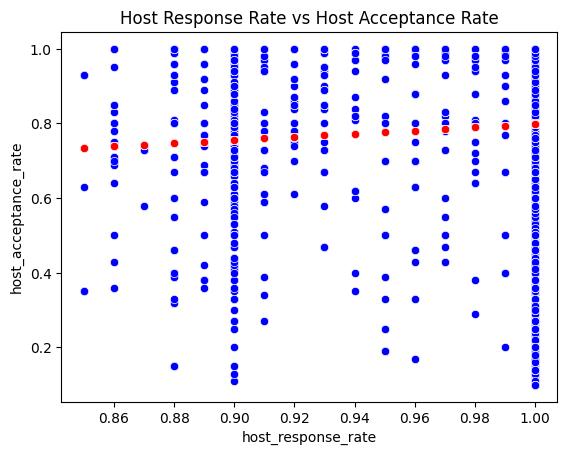

In [376]:
#Visualizamos la gráfica comparativa
sns.scatterplot(x='host_response_rate', y='host_acceptance_rate', color='blue', data=private_room)
sns.scatterplot(x='host_response_rate', y='predicciones_1', color='red', data=private_room)
plt.title('Host Response Rate vs Host Acceptance Rate')
plt.show()

In [377]:
#Corrobaremos cual es el coeficiente de Determinacion de nuestro modelo (R_Cuadrada)
coef_deter_B1 = model_B1.score(X=vars_indep_B1, y=var_dep_B1)
coef_deter_B1

0.002927522880718514

In [378]:
#Corroboramos cual es el coeficiente de correlacion de nuestro modelo (R)
coef_correl_B1 = np.sqrt(coef_deter_B1)
coef_correl_B1

0.054106588145238964

## Variables 2

In [379]:
#Declaramos las variables dependientes e independientes para la regresion lineal
vars_indep_B2 = private_room[['review_scores_cleanliness']]
var_dep_B2 = private_room['review_scores_location']

In [380]:
model_B2 = LinearRegression()

In [381]:
#Ajustamos el modelo con las variables antes declaradas
model_B2.fit(X=vars_indep_B2, y=var_dep_B2)

LinearRegression()

In [382]:
#Predecimos los valores a partir de la variable
y_pred_B2 = model_B2.predict(X=private_room[['review_scores_cleanliness']])

In [383]:
#Insertamos la columna de predicciones en el DataFrame
private_room.insert(1,'predicciones_2',y_pred_B2)
private_room.head(3)

predicciones_1  predicciones_2 host_name host_since  \
2         0.798085        4.957893   Taciana   11/09/11   
21        0.798085        4.942513     Sonia   18/10/11   
33        0.798085        4.949504     Neyde   20/11/11   

             host_location host_response_time host_is_superhost  \
2   Rio de Janeiro, Brazil     within an hour                 f   
21  Rio de Janeiro, Brazil     within an hour                 t   
33  Rio de Janeiro, Brazil     within an hour                 f   

   host_neighbourhood  host_verifications host_has_profile_pic  \
2              Tijuca           ['phone']                    t   
21         Copacabana  ['email', 'phone']                    t   
33         Copacabana  ['email', 'phone']                    t   

   host_identity_verified                neighbourhood neighbourhood_cleansed  \
2                       t       Rio de Janeiro, Brazil                 Tijuca   
21                      t  Rio, Rio de Janeiro, Brazil             Copacabana   
33                      t       Rio de Janeiro, Brazil             Copacabana   

                  property_type     room_type has_availability  \
2   Private room in rental unit  Private room                t   
21  Private room in rental unit  Private room                t   
33  Private room in rental unit  Private room                t   

   instant_bookable        id  host_id  host_response_rate  \
2                 f  220377.0  1142424                 1.0   
21                t  249842.0  1309444                 1.0   
33                t  272631.0  1426830                 1.0   

    host_acceptance_rate  host_listings_count  host_total_listings_count  \
2                   0.47                  3.0                        3.0   
21                  1.00                  3.0                        5.0   
33                  1.00                  4.0                        7.0   

    latitude  longitude  accommodates  bathrooms  bedrooms  beds  price  \
2  -22.92880  -43.24046           2.0        1.0       1.0   1.0  39.60   
21 -22.96794  -43.18969           2.0        1.0       1.0   1.0  21.78   
33 -22.96750  -43.18666           2.0        1.0       1.0   2.0  39.78   

    minimum_nights  maximum_nights  maximum_maximum_nights  \
2              1.0           365.0                    1125   
21             2.0             7.0                    1125   
33             2.0            30.0                    1125   

    minimum_nights_avg_ntm  maximum_nights_avg_ntm  availability_30  \
2                      1.0                  1125.0                9   
21                     2.1                  1125.0               20   
33                     2.0                  1125.0               30   

    availability_60  availability_90  availability_365  number_of_reviews  \
2                29               41               283                5.0   
21               45               63               151               10.0   
33               60               86               266               32.0   

    number_of_reviews_ltm  review_scores_rating  review_scores_accuracy  \
2                     1.0                  5.00                    5.00   
21                   17.0                  4.89                    4.84   
33                    5.0                  5.00                    5.00   

    review_scores_cleanliness  review_scores_checkin  \
2                        5.00                   5.00   
21                       4.89                   4.96   
33                       4.94                   4.94   

    review_scores_communication  review_scores_location  review_scores_value  \
2                          4.80                    4.80                 5.00   
21                         4.96                    4.86                 4.79   
33                         5.00                    4.97                 4.94   

    calculated_host_listings_count  reviews_per_month  
2                              3.0        

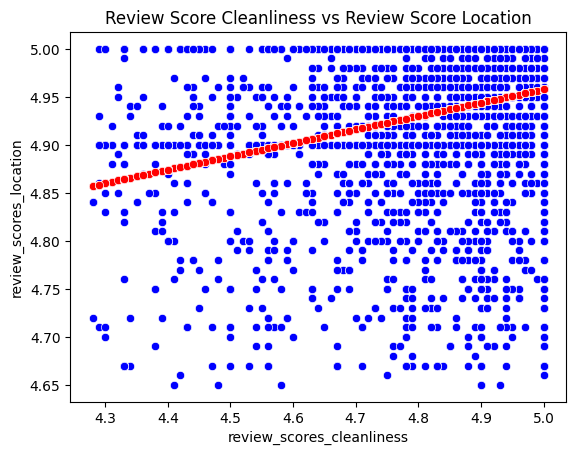

In [384]:
#Visualizamos la gráfica comparativa
sns.scatterplot(x='review_scores_cleanliness', y='review_scores_location', color='blue', data=private_room)
sns.scatterplot(x='review_scores_cleanliness', y='predicciones_2', color='red', data=private_room)
plt.title('Review Score Cleanliness vs Review Score Location')
plt.show()

In [385]:
#Corrobaremos cual es el coeficiente de Determinacion de nuestro modelo (R_Cuadrada)
coef_deter_B2 = model_B2.score(X=vars_indep_B2, y=var_dep_B2)
coef_deter_B2

0.07815559139126771

In [386]:
#Corroboramos cual es el coeficiente de correlacion de nuestro modelo (R)
coef_correl_B2 = np.sqrt(coef_deter_B2)
coef_correl_B2

0.2795632153758211

In [387]:
model_B2.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.13981634]),
 'rank_': 1,
 'singular_': array([13.61894529]),
 'intercept_': 4.258810867324436}

MODELO MATEMáTICO:

**X 0.13981634 + 4.258810867324436**

## Variables 3

In [388]:
#Declaramos las variables dependientes e independientes para la regresion lineal
vars_indep_B3 = private_room[['price']]
var_dep_B3 = private_room['host_acceptance_rate']

In [389]:
model_B3 = LinearRegression()

In [390]:
#Ajustamos el modelo con las variables antes declaradas
model_B3.fit(X=vars_indep_B3, y=var_dep_B3)

LinearRegression()

In [391]:
#Predecimos los valores a partir de la variable
y_pred_B3 = model_B3.predict(X=private_room[['price']])

In [392]:
#Insertamos la columna de predicciones en el DataFrame
private_room.insert(2,'predicciones_3',y_pred_B3)
private_room.head(3)

predicciones_1  predicciones_2  predicciones_3 host_name host_since  \
2         0.798085        4.957893        0.795051   Taciana   11/09/11   
21        0.798085        4.942513        0.797760     Sonia   18/10/11   
33        0.798085        4.949504        0.795024     Neyde   20/11/11   

             host_location host_response_time host_is_superhost  \
2   Rio de Janeiro, Brazil     within an hour                 f   
21  Rio de Janeiro, Brazil     within an hour                 t   
33  Rio de Janeiro, Brazil     within an hour                 f   

   host_neighbourhood  host_verifications host_has_profile_pic  \
2              Tijuca           ['phone']                    t   
21         Copacabana  ['email', 'phone']                    t   
33         Copacabana  ['email', 'phone']                    t   

   host_identity_verified                neighbourhood neighbourhood_cleansed  \
2                       t       Rio de Janeiro, Brazil                 Tijuca   
21                      t  Rio, Rio de Janeiro, Brazil             Copacabana   
33                      t       Rio de Janeiro, Brazil             Copacabana   

                  property_type     room_type has_availability  \
2   Private room in rental unit  Private room                t   
21  Private room in rental unit  Private room                t   
33  Private room in rental unit  Private room                t   

   instant_bookable        id  host_id  host_response_rate  \
2                 f  220377.0  1142424                 1.0   
21                t  249842.0  1309444                 1.0   
33                t  272631.0  1426830                 1.0   

    host_acceptance_rate  host_listings_count  host_total_listings_count  \
2                   0.47                  3.0                        3.0   
21                  1.00                  3.0                        5.0   
33                  1.00                  4.0                        7.0   

    latitude  longitude  accommodates  bathrooms  bedrooms  beds  price  \
2  -22.92880  -43.24046           2.0        1.0       1.0   1.0  39.60   
21 -22.96794  -43.18969           2.0        1.0       1.0   1.0  21.78   
33 -22.96750  -43.18666           2.0        1.0       1.0   2.0  39.78   

    minimum_nights  maximum_nights  maximum_maximum_nights  \
2              1.0           365.0                    1125   
21             2.0             7.0                    1125   
33             2.0            30.0                    1125   

    minimum_nights_avg_ntm  maximum_nights_avg_ntm  availability_30  \
2                      1.0                  1125.0                9   
21                     2.1                  1125.0               20   
33                     2.0                  1125.0               30   

    availability_60  availability_90  availability_365  number_of_reviews  \
2                29               41               283                5.0   
21               45               63               151               10.0   
33               60               86               266               32.0   

    number_of_reviews_ltm  review_scores_rating  review_scores_accuracy  \
2                     1.0                  5.00                    5.00   
21                   17.0                  4.89                    4.84   
33                    5.0                  5.00                    5.00   

    review_scores_cleanliness  review_scores_checkin  \
2                        5.00                   5.00   
21                       4.89                   4.96   
33                       4.94                   4.94   

    review_scores_communication  review_scores_location  review_scores_value  \
2                          4.80                    4.80                 5.00   
21                         4.96                    4.86                 4.79   
33                         5.00                    4.97                 4.94   

    calculated_host_listings_count

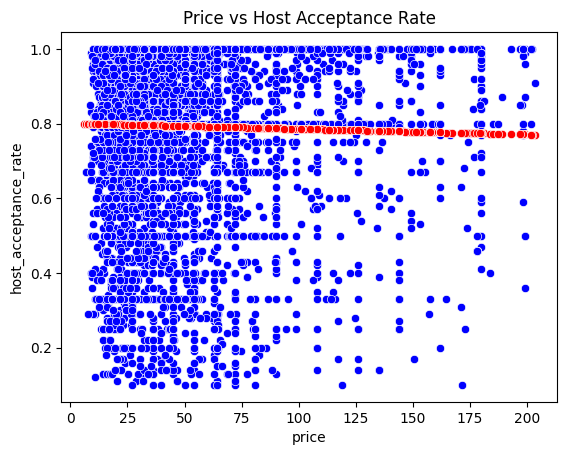

In [393]:
#Visualizamos la gráfica comparativa
sns.scatterplot(x='price', y='host_acceptance_rate', color='blue', data=private_room)
sns.scatterplot(x='price', y='predicciones_3', color='red', data=private_room)
plt.title('Price vs Host Acceptance Rate')
plt.show()

In [394]:
#Corrobaremos cual es el coeficiente de Determinacion de nuestro modelo (R_Cuadrada)
coef_deter_B3 = model_B3.score(X=vars_indep_B3, y=var_dep_B3)
coef_deter_B3

0.0005420357421774824

In [395]:
#Corroboramos cual es el coeficiente de correlacion de nuestro modelo (R)
coef_correl_B3 = np.sqrt(coef_deter_B3)
coef_correl_B3

0.02328166106998129

## Variables 4

In [396]:
#Declaramos las variables dependientes e independientes para la regresion lineal
vars_indep_B4 = private_room[['number_of_reviews']]
var_dep_B4 = private_room['availability_365']

In [397]:
model_B4 = LinearRegression()

In [398]:
#Ajustamos el modelo con las variables antes declaradas
model_B4.fit(X=vars_indep_B4, y=var_dep_B4)

LinearRegression()

In [399]:
#Predecimos los valores a partir de la variable
y_pred_B4 = model_B4.predict(X=private_room[['number_of_reviews']])
y_pred_B4

array([225.58860139, 219.43101284, 192.33762319, ..., 231.74618995,
       231.74618995, 231.74618995])

In [400]:
#Insertamos la columna de predicciones en el DataFrame
private_room.insert(3,'predicciones_4',y_pred_B4)
private_room.head(3)

predicciones_1  predicciones_2  predicciones_3  predicciones_4 host_name  \
2         0.798085        4.957893        0.795051      225.588601   Taciana   
21        0.798085        4.942513        0.797760      219.431013     Sonia   
33        0.798085        4.949504        0.795024      192.337623     Neyde   

   host_since           host_location host_response_time host_is_superhost  \
2    11/09/11  Rio de Janeiro, Brazil     within an hour                 f   
21   18/10/11  Rio de Janeiro, Brazil     within an hour                 t   
33   20/11/11  Rio de Janeiro, Brazil     within an hour                 f   

   host_neighbourhood  host_verifications host_has_profile_pic  \
2              Tijuca           ['phone']                    t   
21         Copacabana  ['email', 'phone']                    t   
33         Copacabana  ['email', 'phone']                    t   

   host_identity_verified                neighbourhood neighbourhood_cleansed  \
2                       t       Rio de Janeiro, Brazil                 Tijuca   
21                      t  Rio, Rio de Janeiro, Brazil             Copacabana   
33                      t       Rio de Janeiro, Brazil             Copacabana   

                  property_type     room_type has_availability  \
2   Private room in rental unit  Private room                t   
21  Private room in rental unit  Private room                t   
33  Private room in rental unit  Private room                t   

   instant_bookable        id  host_id  host_response_rate  \
2                 f  220377.0  1142424                 1.0   
21                t  249842.0  1309444                 1.0   
33                t  272631.0  1426830                 1.0   

    host_acceptance_rate  host_listings_count  host_total_listings_count  \
2                   0.47                  3.0                        3.0   
21                  1.00                  3.0                        5.0   
33                  1.00                  4.0                        7.0   

    latitude  longitude  accommodates  bathrooms  bedrooms  beds  price  \
2  -22.92880  -43.24046           2.0        1.0       1.0   1.0  39.60   
21 -22.96794  -43.18969           2.0        1.0       1.0   1.0  21.78   
33 -22.96750  -43.18666           2.0        1.0       1.0   2.0  39.78   

    minimum_nights  maximum_nights  maximum_maximum_nights  \
2              1.0           365.0                    1125   
21             2.0             7.0                    1125   
33             2.0            30.0                    1125   

    minimum_nights_avg_ntm  maximum_nights_avg_ntm  availability_30  \
2                      1.0                  1125.0                9   
21                     2.1                  1125.0               20   
33                     2.0                  1125.0               30   

    availability_60  availability_90  availability_365  number_of_reviews  \
2                29               41               283                5.0   
21               45               63               151               10.0   
33               60               86               266               32.0   

    number_of_reviews_ltm  review_scores_rating  review_scores_accuracy  \
2                     1.0                  5.00                    5.00   
21                   17.0                  4.89                    4.84   
33                    5.0                  5.00                    5.00   

    review_scores_cleanliness  review_scores_checkin  \
2                        5.00                   5.00   
21                       4.89                   4.96   
33                       4.94                   4.94   

    review_scores_communication  review_scores_location  review_scores_value  \
2                          4.80                    4.80                 5.00   
21                         4.96                    4.86                 4.79   
33                         5.00                    

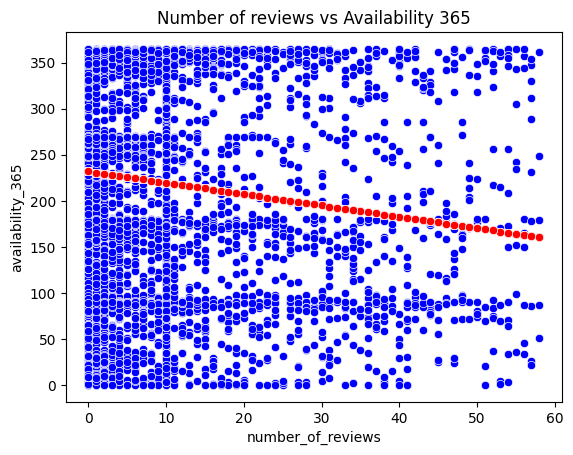

In [401]:
#Visualizamos la gráfica comparativa
sns.scatterplot(x='number_of_reviews', y='availability_365', color='blue', data=private_room)
sns.scatterplot(x='number_of_reviews', y='predicciones_4', color='red', data=private_room)
plt.title('Number of reviews vs Availability 365')
plt.show()

In [402]:
#Corrobaremos cual es el coeficiente de Determinacion de nuestro modelo (R_Cuadrada)
coef_deter_B4 = model_B4.score(X=vars_indep_B4, y=var_dep_B4)
coef_deter_B4

0.013529145961226674

In [403]:
#Corroboramos cual es el coeficiente de correlacion de nuestro modelo (R)
coef_correl_B4 = np.sqrt(coef_deter_B4)
coef_correl_B4

0.11631485700987072

## Variables 5

In [404]:
#Declaramos las variables dependientes e independientes para la regresion lineal
vars_indep_B5 = private_room[['number_of_reviews']]
var_dep_B5 = private_room['host_acceptance_rate']

In [405]:
model_B5 = LinearRegression()

In [406]:
#Ajustamos el modelo con las variables antes declaradas
model_B5.fit(X=vars_indep_B5, y=var_dep_B5)

LinearRegression()

In [407]:
#Predecimos los valores a partir de la variable
y_pred_B5 = model_B5.predict(X=private_room[['number_of_reviews']])

In [408]:
#Insertamos la columna de predicciones en el DataFrame
private_room.insert(4,'predicciones_5',y_pred_B5)
private_room.head(3)

predicciones_1  predicciones_2  predicciones_3  predicciones_4  \
2         0.798085        4.957893        0.795051      225.588601   
21        0.798085        4.942513        0.797760      219.431013   
33        0.798085        4.949504        0.795024      192.337623   

    predicciones_5 host_name host_since           host_location  \
2         0.786020   Taciana   11/09/11  Rio de Janeiro, Brazil   
21        0.802765     Sonia   18/10/11  Rio de Janeiro, Brazil   
33        0.876439     Neyde   20/11/11  Rio de Janeiro, Brazil   

   host_response_time host_is_superhost host_neighbourhood  \
2      within an hour                 f             Tijuca   
21     within an hour                 t         Copacabana   
33     within an hour                 f         Copacabana   

    host_verifications host_has_profile_pic host_identity_verified  \
2            ['phone']                    t                      t   
21  ['email', 'phone']                    t                      t   
33  ['email', 'phone']                    t                      t   

                  neighbourhood neighbourhood_cleansed  \
2        Rio de Janeiro, Brazil                 Tijuca   
21  Rio, Rio de Janeiro, Brazil             Copacabana   
33       Rio de Janeiro, Brazil             Copacabana   

                  property_type     room_type has_availability  \
2   Private room in rental unit  Private room                t   
21  Private room in rental unit  Private room                t   
33  Private room in rental unit  Private room                t   

   instant_bookable        id  host_id  host_response_rate  \
2                 f  220377.0  1142424                 1.0   
21                t  249842.0  1309444                 1.0   
33                t  272631.0  1426830                 1.0   

    host_acceptance_rate  host_listings_count  host_total_listings_count  \
2                   0.47                  3.0                        3.0   
21                  1.00                  3.0                        5.0   
33                  1.00                  4.0                        7.0   

    latitude  longitude  accommodates  bathrooms  bedrooms  beds  price  \
2  -22.92880  -43.24046           2.0        1.0       1.0   1.0  39.60   
21 -22.96794  -43.18969           2.0        1.0       1.0   1.0  21.78   
33 -22.96750  -43.18666           2.0        1.0       1.0   2.0  39.78   

    minimum_nights  maximum_nights  maximum_maximum_nights  \
2              1.0           365.0                    1125   
21             2.0             7.0                    1125   
33             2.0            30.0                    1125   

    minimum_nights_avg_ntm  maximum_nights_avg_ntm  availability_30  \
2                      1.0                  1125.0                9   
21                     2.1                  1125.0               20   
33                     2.0                  1125.0               30   

    availability_60  availability_90  availability_365  number_of_reviews  \
2                29               41               283                5.0   
21               45               63               151               10.0   
33               60               86               266               32.0   

    number_of_reviews_ltm  review_scores_rating  review_scores_accuracy  \
2                     1.0                  5.00                    5.00   
21                   17.0                  4.89                    4.84   
33                    5.0                  5.00                    5.00   

    review_scores_cleanliness  review_scores_checkin  \
2                        5.00                   5.00   
21                       4.89                   4.96   
33                       4.94                   4.94   

    review_scores_communication  review_scores_location  review_scores_value  \
2                          4.80                    4.80                 5.00   
21                         4.96           

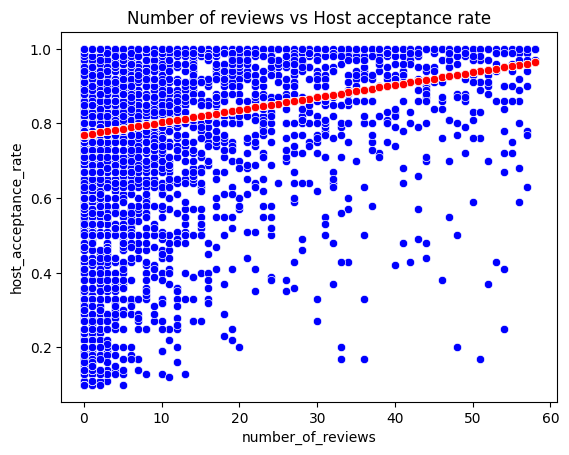

In [409]:
#Visualizamos la gráfica comparativa
sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color='blue', data=private_room)
sns.scatterplot(x='number_of_reviews', y='predicciones_5', color='red', data=private_room)
plt.title('Number of reviews vs Host acceptance rate')
plt.show()

In [410]:
#Corrobaremos cual es el coeficiente de Determinacion de nuestro modelo (R_Cuadrada)
coef_deter_B5 = model_B5.score(X=vars_indep_B5, y=var_dep_B5)
coef_deter_B5

0.028619158358429986

In [411]:
#Corroboramos cual es el coeficiente de correlacion de nuestro modelo (R)
coef_correl_B5 = np.sqrt(coef_deter_B5)
coef_correl_B5

0.16917197864430736

## Variables 6

In [412]:
#Declaramos las variables dependientes e independientes para la regresion lineal
vars_indep_B6 = private_room[['review_scores_communication']]
var_dep_B6 = private_room['reviews_per_month']

In [413]:
model_B6 = LinearRegression()

In [414]:
#Ajustamos el modelo con las variables antes declaradas
model_B6.fit(X=vars_indep_B6, y=var_dep_B6)

LinearRegression()

In [415]:
#Predecimos los valores a partir de la variable
y_pred_B6 = model_B6.predict(X=private_room[['review_scores_communication']])

In [416]:
#Insertamos la columna de predicciones en el DataFrame
private_room.insert(5,'predicciones_6',y_pred_B6)
private_room.head(3)

predicciones_1  predicciones_2  predicciones_3  predicciones_4  \
2         0.798085        4.957893        0.795051      225.588601   
21        0.798085        4.942513        0.797760      219.431013   
33        0.798085        4.949504        0.795024      192.337623   

    predicciones_5  predicciones_6 host_name host_since  \
2         0.786020        1.161883   Taciana   11/09/11   
21        0.802765        0.779353     Sonia   18/10/11   
33        0.876439        0.683720     Neyde   20/11/11   

             host_location host_response_time host_is_superhost  \
2   Rio de Janeiro, Brazil     within an hour                 f   
21  Rio de Janeiro, Brazil     within an hour                 t   
33  Rio de Janeiro, Brazil     within an hour                 f   

   host_neighbourhood  host_verifications host_has_profile_pic  \
2              Tijuca           ['phone']                    t   
21         Copacabana  ['email', 'phone']                    t   
33         Copacabana  ['email', 'phone']                    t   

   host_identity_verified                neighbourhood neighbourhood_cleansed  \
2                       t       Rio de Janeiro, Brazil                 Tijuca   
21                      t  Rio, Rio de Janeiro, Brazil             Copacabana   
33                      t       Rio de Janeiro, Brazil             Copacabana   

                  property_type     room_type has_availability  \
2   Private room in rental unit  Private room                t   
21  Private room in rental unit  Private room                t   
33  Private room in rental unit  Private room                t   

   instant_bookable        id  host_id  host_response_rate  \
2                 f  220377.0  1142424                 1.0   
21                t  249842.0  1309444                 1.0   
33                t  272631.0  1426830                 1.0   

    host_acceptance_rate  host_listings_count  host_total_listings_count  \
2                   0.47                  3.0                        3.0   
21                  1.00                  3.0                        5.0   
33                  1.00                  4.0                        7.0   

    latitude  longitude  accommodates  bathrooms  bedrooms  beds  price  \
2  -22.92880  -43.24046           2.0        1.0       1.0   1.0  39.60   
21 -22.96794  -43.18969           2.0        1.0       1.0   1.0  21.78   
33 -22.96750  -43.18666           2.0        1.0       1.0   2.0  39.78   

    minimum_nights  maximum_nights  maximum_maximum_nights  \
2              1.0           365.0                    1125   
21             2.0             7.0                    1125   
33             2.0            30.0                    1125   

    minimum_nights_avg_ntm  maximum_nights_avg_ntm  availability_30  \
2                      1.0                  1125.0                9   
21                     2.1                  1125.0               20   
33                     2.0                  1125.0               30   

    availability_60  availability_90  availability_365  number_of_reviews  \
2                29               41               283                5.0   
21               45               63               151               10.0   
33               60               86               266               32.0   

    number_of_reviews_ltm  review_scores_rating  review_scores_accuracy  \
2                     1.0                  5.00                    5.00   
21                   17.0                  4.89                    4.84   
33                    5.0                  5.00                    5.00   

    review_scores_cleanliness  review_scores_checkin  \
2                        5.00                   5.00   
21                       4.89                   4.96   
33                       4.94                   4.94   

    review_scores_communication  review_scores_location  review_scores_value  \
2                          4.80                    4.80   

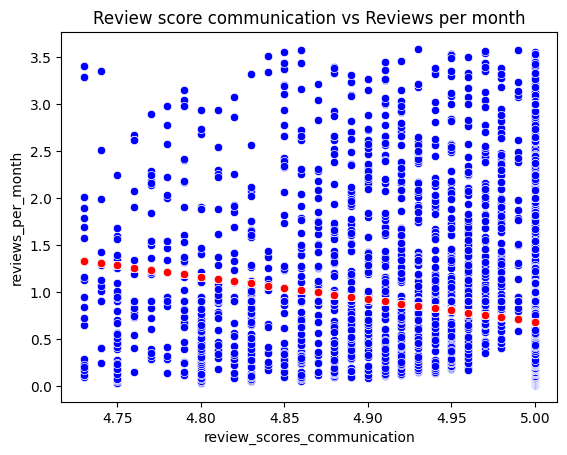

In [417]:
#Visualizamos la gráfica comparativa
sns.scatterplot(x='review_scores_communication', y='reviews_per_month', color='blue', data=private_room)
sns.scatterplot(x='review_scores_communication', y='predicciones_6', color='red', data=private_room)
plt.title('Review score communication vs Reviews per month')
plt.show()

In [418]:
#Corrobaremos cual es el coeficiente de Determinacion de nuestro modelo (R_Cuadrada)
coef_deter_B6 = model_B6.score(X=vars_indep_B6, y=var_dep_B6)
coef_deter_B6

0.03428914273319883

In [419]:
#Corroboramos cual es el coeficiente de correlacion de nuestro modelo (R)
coef_correl_B6 = np.sqrt(coef_deter_B6)
coef_correl_B6

0.18517327758939417

# Tabla de Coeficientes de Determinación y Correlación

In [420]:
#Preparar datos del Frame
coef_data = {'Coef_Deter':[coef_deter_B1,coef_deter_B2,coef_deter_B3,coef_deter_B4,coef_deter_B5,coef_deter_B6],
             'Coef_Correl':[coef_correl_B1,coef_correl_B2,coef_correl_B3,coef_correl_B4,coef_correl_B5,coef_correl_B6]}

#Generar con llaves
df_coef_B = pd.DataFrame(coef_data,index=['host_acceptance_rate vs host_response_rate','review_scores_location vs review_scores_cleanliness','host_acceptance_rate vs price','availability_365 vs number_of_reviews','host_acceptance_rate vs number_of_reviews','reviews_per_month vs review_scores_communication'])
print('Tabla de Coeficientes de Determinación y Correlación subdataframe PRIVATE ROOM\n\n', df_coef_B)

Tabla de Coeficientes de Determinación y Correlación subdataframe PRIVATE ROOM

                                                     Coef_Deter  Coef_Correl
host_acceptance_rate vs host_response_rate            0.002928     0.054107
review_scores_location vs review_scores_cleanli...    0.078156     0.279563
host_acceptance_rate vs price                         0.000542     0.023282
availability_365 vs number_of_reviews                 0.013529     0.116315
host_acceptance_rate vs number_of_reviews             0.028619     0.169172
reviews_per_month vs review_scores_communication      0.034289     0.185173


# Shared room

In [421]:
#Se genera el SubFrame con los datos donde el tipo de habitacion sea el establecido
shared = data[data['room_type'] == 'Shared room']
len(shared)

613

## Variables 1

In [422]:
#Declaramos las variables dependientes e independientes para la regresion lineal
vars_indep_C1 = shared[['host_response_rate']]
var_dep_C1 = shared['host_acceptance_rate']

In [423]:
model_C1 = LinearRegression()

In [424]:
#Ajustamos el modelo con las variables antes declaradas
model_C1.fit(X=vars_indep_C1, y=var_dep_C1)

LinearRegression()

In [425]:
#Predecimos los valores a partir de la variable
y_pred_C1 = model_C1.predict(X=shared[['host_response_rate']])
y_pred_C1[:10]

array([0.82028593, 0.82028593, 0.82028593, 0.82028593, 0.82028593,
       0.82028593, 0.82028593, 0.82028593, 0.82028593, 0.82028593])

In [426]:
#Insertamos la columna de predicciones en el DataFrame
shared.insert(0,'predicciones_1',y_pred_C1)
shared.head(3)

predicciones_1  host_name host_since           host_location  \
282        0.820286  Elisabete   18/12/12  Rio de Janeiro, Brazil   
582        0.820286      Cacáh   17/12/12  Rio de Janeiro, Brazil   
680        0.820286    Leandra   12/10/13  Rio de Janeiro, Brazil   

     host_response_time host_is_superhost host_neighbourhood  \
282      within an hour                 f         Copacabana   
582  within a few hours                 f           Maracanã   
680      within an hour                 f         Copacabana   

     host_verifications host_has_profile_pic host_identity_verified  \
282           ['phone']                    t                      f   
582  ['email', 'phone']                    t                      t   
680  ['email', 'phone']                    t                      t   

                   neighbourhood neighbourhood_cleansed  \
282       Rio de Janeiro, Brazil             Copacabana   
582       Rio de Janeiro, Brazil               Maracanã   
680  Rio, Rio de Janeiro, Brazil                 Tijuca   

                  property_type    room_type has_availability  \
282  Shared room in rental unit  Shared room                t   
582         Shared room in home  Shared room                t   
680         Shared room in home  Shared room                t   

    instant_bookable         id  host_id  host_response_rate  \
282                f   849887.0  4438776                 1.0   
582                f  1213632.0  4426879                 1.0   
680                f  1789053.0  9387742                 1.0   

     host_acceptance_rate  host_listings_count  host_total_listings_count  \
282                  0.28                  2.8                        3.7   
582                  0.87                  3.0                        6.0   
680                  0.46                 10.0                       10.0   

     latitude  longitude  accommodates  bathrooms  bedrooms  beds  price  \
282 -22.97822  -43.19082           2.0        1.0       0.0   1.0  37.08   
582 -23.00000  -43.21797           2.0        1.0       3.0   1.0  17.28   
680 -22.94472  -43.25990           1.0        1.0       0.0   1.0  39.60   

     minimum_nights  maximum_nights  maximum_maximum_nights  \
282             3.0           207.7                    1125   
582             1.0           365.0                     365   
680             1.0           365.0                     365   

     minimum_nights_avg_ntm  maximum_nights_avg_ntm  availability_30  \
282                     3.0                  1125.0                0   
582                     1.0                   365.0               30   
680                     1.0                   365.0                0   

     availability_60  availability_90  availability_365  number_of_reviews  \
282                0                0                 0                1.0   
582               60               90               365                0.0   
680                0                0                 0               12.0   

     number_of_reviews_ltm  review_scores_rating  review_scores_accuracy  \
282                    0.0                  5.00                    4.90   
582                    0.0                  4.83                    5.00   
680                    1.0                  4.75                    4.82   

     review_scores_cleanliness  review_scores_checkin  \
282                       5.00                   5.00   
582                       4.75                   5.00   
680                       4.60                   4.91   

     review_scores_communication  review_scores_location  review_scores_value  \
282                         5.00                    5.00                 5.00   
582                         5.00                    4.83                 4.92   
680                         4.82                    4.90                 4.64   

     calculated_host_listings_count  reviews_per_month  
282                             2.4           

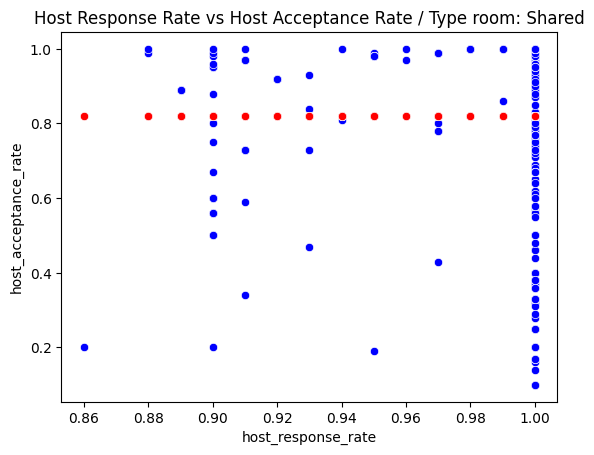

In [427]:
#Visualizamos la gráfica comparativa
sns.scatterplot(x='host_response_rate', y='host_acceptance_rate', color='blue', data=shared)
sns.scatterplot(x='host_response_rate', y='predicciones_1', color='red', data=shared)
plt.title('Host Response Rate vs Host Acceptance Rate / Type room: Shared')
plt.show()

In [428]:
#Corrobaremos cual es el coeficiente de Determinacion de nuestro modelo (R_Cuadrada)
coef_deter_C1 = model_C1.score(X=vars_indep_C1, y=var_dep_C1)
coef_deter_C1

5.008314144516746e-07

In [429]:
#Corroboramos cual es el coeficiente de correlacion de nuestro modelo (R)
coef_correl_C1 = np.sqrt(coef_deter_C1)
coef_correl_C1

0.0007076944357925068

## Variables 2

In [430]:
#Declaramos las variables dependientes e independientes para la regresion lineal
vars_indep_C2 = shared[['review_scores_cleanliness']]
var_dep_C2 = shared['review_scores_location']

In [431]:
model_C2 = LinearRegression()

In [432]:
#Ajustamos el modelo con las variables antes declaradas
model_C2.fit(X=vars_indep_C2, y=var_dep_C2)

LinearRegression()

In [433]:
#Predecimos los valores a partir de la variable
y_pred_C2 = model_C2.predict(X=shared[['review_scores_cleanliness']])

In [434]:
#Insertamos la columna de predicciones en el DataFrame
shared.insert(1,'predicciones_2',y_pred_C2)
shared.head(3)

predicciones_1  predicciones_2  host_name host_since  \
282        0.820286        4.955736  Elisabete   18/12/12   
582        0.820286        4.918302      Cacáh   17/12/12   
680        0.820286        4.895842    Leandra   12/10/13   

              host_location  host_response_time host_is_superhost  \
282  Rio de Janeiro, Brazil      within an hour                 f   
582  Rio de Janeiro, Brazil  within a few hours                 f   
680  Rio de Janeiro, Brazil      within an hour                 f   

    host_neighbourhood  host_verifications host_has_profile_pic  \
282         Copacabana           ['phone']                    t   
582           Maracanã  ['email', 'phone']                    t   
680         Copacabana  ['email', 'phone']                    t   

    host_identity_verified                neighbourhood  \
282                      f       Rio de Janeiro, Brazil   
582                      t       Rio de Janeiro, Brazil   
680                      t  Rio, Rio de Janeiro, Brazil   

    neighbourhood_cleansed               property_type    room_type  \
282             Copacabana  Shared room in rental unit  Shared room   
582               Maracanã         Shared room in home  Shared room   
680                 Tijuca         Shared room in home  Shared room   

    has_availability instant_bookable         id  host_id  host_response_rate  \
282                t                f   849887.0  4438776                 1.0   
582                t                f  1213632.0  4426879                 1.0   
680                t                f  1789053.0  9387742                 1.0   

     host_acceptance_rate  host_listings_count  host_total_listings_count  \
282                  0.28                  2.8                        3.7   
582                  0.87                  3.0                        6.0   
680                  0.46                 10.0                       10.0   

     latitude  longitude  accommodates  bathrooms  bedrooms  beds  price  \
282 -22.97822  -43.19082           2.0        1.0       0.0   1.0  37.08   
582 -23.00000  -43.21797           2.0        1.0       3.0   1.0  17.28   
680 -22.94472  -43.25990           1.0        1.0       0.0   1.0  39.60   

     minimum_nights  maximum_nights  maximum_maximum_nights  \
282             3.0           207.7                    1125   
582             1.0           365.0                     365   
680             1.0           365.0                     365   

     minimum_nights_avg_ntm  maximum_nights_avg_ntm  availability_30  \
282                     3.0                  1125.0                0   
582                     1.0                   365.0               30   
680                     1.0                   365.0                0   

     availability_60  availability_90  availability_365  number_of_reviews  \
282                0                0                 0                1.0   
582               60               90               365                0.0   
680                0                0                 0               12.0   

     number_of_reviews_ltm  review_scores_rating  review_scores_accuracy  \
282                    0.0                  5.00                    4.90   
582                    0.0                  4.83                    5.00   
680                    1.0                  4.75                    4.82   

     review_scores_cleanliness  review_scores_checkin  \
282                       5.00                   5.00   
582                       4.75                   5.00   
680                       4.60                   4.91   

     review_scores_communication  review_scores_location  review_scores_value  \
282                         5.00                    5.00                 5.00   
582                         5.00                    4.83                 4.92   
680                         4.82                    4.90                 4.64   

     calculated_host_listings_count  re

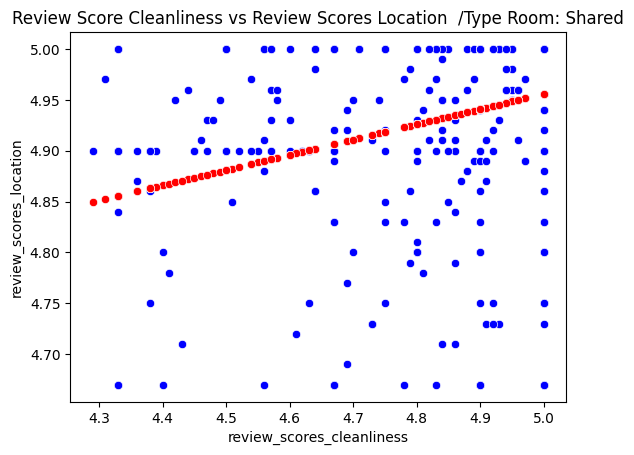

In [435]:
#Visualizamos la gráfica comparativa
sns.scatterplot(x='review_scores_cleanliness', y='review_scores_location', color='blue', data=shared)
sns.scatterplot(x='review_scores_cleanliness', y='predicciones_2', color='red', data=shared)
plt.title('Review Score Cleanliness vs Review Scores Location  /Type Room: Shared')
plt.show()

In [436]:
#Corrobaremos cual es el coeficiente de Determinacion de nuestro modelo (R_Cuadrada)
coef_deter_C2 = model_C2.score(X=vars_indep_C2, y=var_dep_C2)
coef_deter_C2

0.09735775958741155

In [437]:
#Corroboramos cual es el coeficiente de correlacion de nuestro modelo (R)
coef_correl_C2 = np.sqrt(coef_deter_C2)
coef_correl_C2

0.31202204984169235

In [438]:
model_C2.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.14973405]),
 'rank_': 1,
 'singular_': array([4.4473697]),
 'intercept_': 4.207065702182376}

MODELO MATEMATICO:

**X 0.14973405+4.207065702182376**

## Variables 3

In [439]:
#Declaramos las variables dependientes e independientes para la regresion lineal
vars_indep_C3 = shared[['price']]
var_dep_C3 = shared['host_acceptance_rate']

In [440]:
model_C3 = LinearRegression()

In [441]:
#Ajustamos el modelo con las variables antes declaradas
model_C3.fit(X=vars_indep_C3, y=var_dep_C3)

LinearRegression()

In [442]:
#Predecimos los valores a partir de la variable
y_pred_C3 = model_C3.predict(X=shared[['price']])

In [443]:
#Insertamos la columna de predicciones en el DataFrame
shared.insert(2,'predicciones_3',y_pred_C3)
shared.head(3)

predicciones_1  predicciones_2  predicciones_3  host_name host_since  \
282        0.820286        4.955736        0.818304  Elisabete   18/12/12   
582        0.820286        4.918302        0.823799      Cacáh   17/12/12   
680        0.820286        4.895842        0.817605    Leandra   12/10/13   

              host_location  host_response_time host_is_superhost  \
282  Rio de Janeiro, Brazil      within an hour                 f   
582  Rio de Janeiro, Brazil  within a few hours                 f   
680  Rio de Janeiro, Brazil      within an hour                 f   

    host_neighbourhood  host_verifications host_has_profile_pic  \
282         Copacabana           ['phone']                    t   
582           Maracanã  ['email', 'phone']                    t   
680         Copacabana  ['email', 'phone']                    t   

    host_identity_verified                neighbourhood  \
282                      f       Rio de Janeiro, Brazil   
582                      t       Rio de Janeiro, Brazil   
680                      t  Rio, Rio de Janeiro, Brazil   

    neighbourhood_cleansed               property_type    room_type  \
282             Copacabana  Shared room in rental unit  Shared room   
582               Maracanã         Shared room in home  Shared room   
680                 Tijuca         Shared room in home  Shared room   

    has_availability instant_bookable         id  host_id  host_response_rate  \
282                t                f   849887.0  4438776                 1.0   
582                t                f  1213632.0  4426879                 1.0   
680                t                f  1789053.0  9387742                 1.0   

     host_acceptance_rate  host_listings_count  host_total_listings_count  \
282                  0.28                  2.8                        3.7   
582                  0.87                  3.0                        6.0   
680                  0.46                 10.0                       10.0   

     latitude  longitude  accommodates  bathrooms  bedrooms  beds  price  \
282 -22.97822  -43.19082           2.0        1.0       0.0   1.0  37.08   
582 -23.00000  -43.21797           2.0        1.0       3.0   1.0  17.28   
680 -22.94472  -43.25990           1.0        1.0       0.0   1.0  39.60   

     minimum_nights  maximum_nights  maximum_maximum_nights  \
282             3.0           207.7                    1125   
582             1.0           365.0                     365   
680             1.0           365.0                     365   

     minimum_nights_avg_ntm  maximum_nights_avg_ntm  availability_30  \
282                     3.0                  1125.0                0   
582                     1.0                   365.0               30   
680                     1.0                   365.0                0   

     availability_60  availability_90  availability_365  number_of_reviews  \
282                0                0                 0                1.0   
582               60               90               365                0.0   
680                0                0                 0               12.0   

     number_of_reviews_ltm  review_scores_rating  review_scores_accuracy  \
282                    0.0                  5.00                    4.90   
582                    0.0                  4.83                    5.00   
680                    1.0                  4.75                    4.82   

     review_scores_cleanliness  review_scores_checkin  \
282                       5.00                   5.00   
582                       4.75                   5.00   
680                       4.60                   4.91   

     review_scores_communication  review_scores_location  review_scores_value  \
282                         5.00                    5.00                 5.00   
582                         5.00                    4.83                 4.92   
680                         4.82                    4.90 

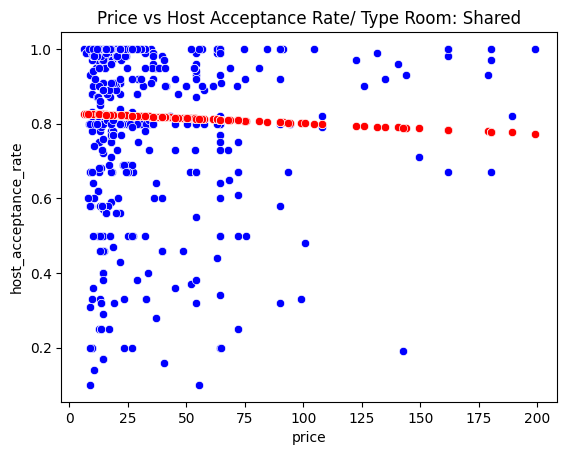

In [444]:
#Visualizamos la gráfica comparativa
sns.scatterplot(x='price', y='host_acceptance_rate', color='blue', data=shared)
sns.scatterplot(x='price', y='predicciones_3', color='red', data=shared)
plt.title('Price vs Host Acceptance Rate/ Type Room: Shared')
plt.show()

In [445]:
#Corrobaremos cual es el coeficiente de Determinacion de nuestro modelo (R_Cuadrada)
coef_deter_C3 = model_C3.score(X=vars_indep_C3, y=var_dep_C3)
coef_deter_C3

0.0014579149177256223

In [446]:
#Corroboramos cual es el coeficiente de correlacion de nuestro modelo (R)
coef_correl_C3 = np.sqrt(coef_deter_C3)
coef_correl_C3

0.038182652052019934

In [447]:
model_C3.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['price'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-0.00027755]),
 'rank_': 1,
 'singular_': array([739.95667202]),
 'intercept_': 0.8285954492371139}

MODELO MATEMáTICO:

**-0.00027755 X + 0.8285954492371139**

## Variables 4

In [448]:
#Declaramos las variables dependientes e independientes para la regresion lineal
vars_indep_C4 = shared[['number_of_reviews']]
var_dep_C4 = shared['availability_365']

In [449]:
model_C4 = LinearRegression()

In [450]:
#Ajustamos el modelo con las variables antes declaradas
model_C4.fit(X=vars_indep_C4, y=var_dep_C4)

LinearRegression()

In [451]:
#Predecimos los valores a partir de la variable
y_pred_C4 = model_C4.predict(X=shared[['number_of_reviews']])

In [452]:
#Insertamos la columna de predicciones en el DataFrame
shared.insert(3,'predicciones_4',y_pred_C4)
shared.head(3)

predicciones_1  predicciones_2  predicciones_3  predicciones_4  \
282        0.820286        4.955736        0.818304      250.163740   
582        0.820286        4.918302        0.823799      251.549469   
680        0.820286        4.895842        0.817605      234.920724   

     host_name host_since           host_location  host_response_time  \
282  Elisabete   18/12/12  Rio de Janeiro, Brazil      within an hour   
582      Cacáh   17/12/12  Rio de Janeiro, Brazil  within a few hours   
680    Leandra   12/10/13  Rio de Janeiro, Brazil      within an hour   

    host_is_superhost host_neighbourhood  host_verifications  \
282                 f         Copacabana           ['phone']   
582                 f           Maracanã  ['email', 'phone']   
680                 f         Copacabana  ['email', 'phone']   

    host_has_profile_pic host_identity_verified                neighbourhood  \
282                    t                      f       Rio de Janeiro, Brazil   
582                    t                      t       Rio de Janeiro, Brazil   
680                    t                      t  Rio, Rio de Janeiro, Brazil   

    neighbourhood_cleansed               property_type    room_type  \
282             Copacabana  Shared room in rental unit  Shared room   
582               Maracanã         Shared room in home  Shared room   
680                 Tijuca         Shared room in home  Shared room   

    has_availability instant_bookable         id  host_id  host_response_rate  \
282                t                f   849887.0  4438776                 1.0   
582                t                f  1213632.0  4426879                 1.0   
680                t                f  1789053.0  9387742                 1.0   

     host_acceptance_rate  host_listings_count  host_total_listings_count  \
282                  0.28                  2.8                        3.7   
582                  0.87                  3.0                        6.0   
680                  0.46                 10.0                       10.0   

     latitude  longitude  accommodates  bathrooms  bedrooms  beds  price  \
282 -22.97822  -43.19082           2.0        1.0       0.0   1.0  37.08   
582 -23.00000  -43.21797           2.0        1.0       3.0   1.0  17.28   
680 -22.94472  -43.25990           1.0        1.0       0.0   1.0  39.60   

     minimum_nights  maximum_nights  maximum_maximum_nights  \
282             3.0           207.7                    1125   
582             1.0           365.0                     365   
680             1.0           365.0                     365   

     minimum_nights_avg_ntm  maximum_nights_avg_ntm  availability_30  \
282                     3.0                  1125.0                0   
582                     1.0                   365.0               30   
680                     1.0                   365.0                0   

     availability_60  availability_90  availability_365  number_of_reviews  \
282                0                0                 0                1.0   
582               60               90               365                0.0   
680                0                0                 0               12.0   

     number_of_reviews_ltm  review_scores_rating  review_scores_accuracy  \
282                    0.0                  5.00                    4.90   
582                    0.0                  4.83                    5.00   
680                    1.0                  4.75                    4.82   

     review_scores_cleanliness  review_scores_checkin  \
282                       5.00                   5.00   
582                       4.75                   5.00   
680                       4.60                   4.91   

     review_scores_communication  review_scores_location  review_scores_value  \
282                         5.00                    5.00                 5.00   
582                         5.00                    4.83                 4

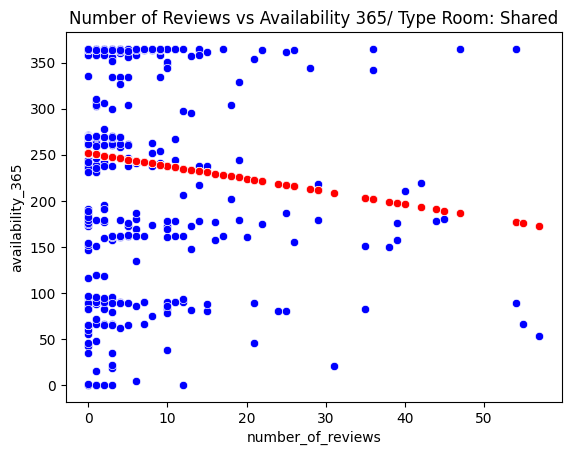

In [453]:
#Visualizamos la gráfica comparativa
sns.scatterplot(x='number_of_reviews', y='availability_365', color='blue', data=shared)
sns.scatterplot(x='number_of_reviews', y='predicciones_4', color='red', data=shared)
plt.title('Number of Reviews vs Availability 365/ Type Room: Shared')
plt.show()

In [454]:
#Corrobaremos cual es el coeficiente de Determinacion de nuestro modelo (R_Cuadrada)
coef_deter_C4 = model_C4.score(X=vars_indep_C4, y=var_dep_C4)
coef_deter_C4

0.011638469040723298

In [455]:
#Corroboramos cual es el coeficiente de correlacion de nuestro modelo (R)
coef_correl_C4 = np.sqrt(coef_deter_C4)
coef_correl_C4

0.10788173636312728

In [456]:
model_C4.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-1.3857287]),
 'rank_': 1,
 'singular_': array([206.94413744]),
 'intercept_': 251.54946865150134}

MODELO MATEMáTICO:

**-1.3857287 X + 0.251.54946865150134**

## Variables 5

In [457]:
#Declaramos las variables dependientes e independientes para la regresion lineal
vars_indep_C5 = shared[['number_of_reviews']]
var_dep_C5 = shared['host_acceptance_rate']

In [458]:
model_C5 = LinearRegression()

In [459]:
#Ajustamos el modelo con las variables antes declaradas
model_C5.fit(X=vars_indep_C5, y=var_dep_C5)

LinearRegression()

In [460]:
#Predecimos los valores a partir de la variable
y_pred_C5 = model_C5.predict(X=shared[['number_of_reviews']])

In [461]:
#Insertamos la columna de predicciones en el DataFrame
shared.insert(4,'predicciones_5',y_pred_C5)
shared.head(3)

predicciones_1  predicciones_2  predicciones_3  predicciones_4  \
282        0.820286        4.955736        0.818304      250.163740   
582        0.820286        4.918302        0.823799      251.549469   
680        0.820286        4.895842        0.817605      234.920724   

     predicciones_5  host_name host_since           host_location  \
282        0.807525  Elisabete   18/12/12  Rio de Janeiro, Brazil   
582        0.803749      Cacáh   17/12/12  Rio de Janeiro, Brazil   
680        0.849066    Leandra   12/10/13  Rio de Janeiro, Brazil   

     host_response_time host_is_superhost host_neighbourhood  \
282      within an hour                 f         Copacabana   
582  within a few hours                 f           Maracanã   
680      within an hour                 f         Copacabana   

     host_verifications host_has_profile_pic host_identity_verified  \
282           ['phone']                    t                      f   
582  ['email', 'phone']                    t                      t   
680  ['email', 'phone']                    t                      t   

                   neighbourhood neighbourhood_cleansed  \
282       Rio de Janeiro, Brazil             Copacabana   
582       Rio de Janeiro, Brazil               Maracanã   
680  Rio, Rio de Janeiro, Brazil                 Tijuca   

                  property_type    room_type has_availability  \
282  Shared room in rental unit  Shared room                t   
582         Shared room in home  Shared room                t   
680         Shared room in home  Shared room                t   

    instant_bookable         id  host_id  host_response_rate  \
282                f   849887.0  4438776                 1.0   
582                f  1213632.0  4426879                 1.0   
680                f  1789053.0  9387742                 1.0   

     host_acceptance_rate  host_listings_count  host_total_listings_count  \
282                  0.28                  2.8                        3.7   
582                  0.87                  3.0                        6.0   
680                  0.46                 10.0                       10.0   

     latitude  longitude  accommodates  bathrooms  bedrooms  beds  price  \
282 -22.97822  -43.19082           2.0        1.0       0.0   1.0  37.08   
582 -23.00000  -43.21797           2.0        1.0       3.0   1.0  17.28   
680 -22.94472  -43.25990           1.0        1.0       0.0   1.0  39.60   

     minimum_nights  maximum_nights  maximum_maximum_nights  \
282             3.0           207.7                    1125   
582             1.0           365.0                     365   
680             1.0           365.0                     365   

     minimum_nights_avg_ntm  maximum_nights_avg_ntm  availability_30  \
282                     3.0                  1125.0                0   
582                     1.0                   365.0               30   
680                     1.0                   365.0                0   

     availability_60  availability_90  availability_365  number_of_reviews  \
282                0                0                 0                1.0   
582               60               90               365                0.0   
680                0                0                 0               12.0   

     number_of_reviews_ltm  review_scores_rating  review_scores_accuracy  \
282                    0.0                  5.00                    4.90   
582                    0.0                  4.83                    5.00   
680                    1.0                  4.75                    4.82   

     review_scores_cleanliness  review_scores_checkin  \
282                       5.00                   5.00   
582                       4.75                   5.00   
680                       4.60                   4.91   

     review_scores_communication  review_scores_location  review_scores_value  \
282                         5.00                    5.00      

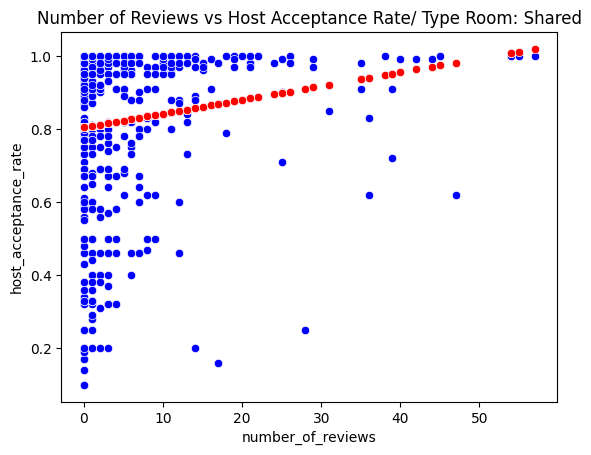

In [462]:
#Visualizamos la gráfica comparativa
sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color='blue', data=shared)
sns.scatterplot(x='number_of_reviews', y='predicciones_5', color='red', data=shared)
plt.title('Number of Reviews vs Host Acceptance Rate/ Type Room: Shared')
plt.show()

In [463]:
#Corrobaremos cual es el coeficiente de Determinacion de nuestro modelo (R_Cuadrada)
coef_deter_C5 = model_C5.score(X=vars_indep_C5, y=var_dep_C5)
coef_deter_C5

0.02111149398102463

In [464]:
#Corroboramos cual es el coeficiente de correlacion de nuestro modelo (R)
coef_correl_C5 = np.sqrt(coef_deter_C5)
coef_correl_C5

0.14529794899111492

## Variables 6

In [465]:
#Declaramos las variables dependientes e independientes para la regresion lineal
vars_indep_C6 = shared[['review_scores_communication']]
var_dep_C6 = shared['reviews_per_month']

In [466]:
model_C6 = LinearRegression()

In [467]:
#Ajustamos el modelo con las variables antes declaradas
model_C6.fit(X=vars_indep_C6, y=var_dep_C6)

LinearRegression()

In [468]:
#Predecimos los valores a partir de la variable
y_pred_C6 = model_C6.predict(X=shared[['review_scores_communication']])

In [469]:
#Insertamos la columna de predicciones en el DataFrame
shared.insert(5,'predicciones_6',y_pred_C6)
shared.head(3)

predicciones_1  predicciones_2  predicciones_3  predicciones_4  \
282        0.820286        4.955736        0.818304      250.163740   
582        0.820286        4.918302        0.823799      251.549469   
680        0.820286        4.895842        0.817605      234.920724   

     predicciones_5  predicciones_6  host_name host_since  \
282        0.807525        0.608907  Elisabete   18/12/12   
582        0.803749        0.608907      Cacáh   17/12/12   
680        0.849066        0.976509    Leandra   12/10/13   

              host_location  host_response_time host_is_superhost  \
282  Rio de Janeiro, Brazil      within an hour                 f   
582  Rio de Janeiro, Brazil  within a few hours                 f   
680  Rio de Janeiro, Brazil      within an hour                 f   

    host_neighbourhood  host_verifications host_has_profile_pic  \
282         Copacabana           ['phone']                    t   
582           Maracanã  ['email', 'phone']                    t   
680         Copacabana  ['email', 'phone']                    t   

    host_identity_verified                neighbourhood  \
282                      f       Rio de Janeiro, Brazil   
582                      t       Rio de Janeiro, Brazil   
680                      t  Rio, Rio de Janeiro, Brazil   

    neighbourhood_cleansed               property_type    room_type  \
282             Copacabana  Shared room in rental unit  Shared room   
582               Maracanã         Shared room in home  Shared room   
680                 Tijuca         Shared room in home  Shared room   

    has_availability instant_bookable         id  host_id  host_response_rate  \
282                t                f   849887.0  4438776                 1.0   
582                t                f  1213632.0  4426879                 1.0   
680                t                f  1789053.0  9387742                 1.0   

     host_acceptance_rate  host_listings_count  host_total_listings_count  \
282                  0.28                  2.8                        3.7   
582                  0.87                  3.0                        6.0   
680                  0.46                 10.0                       10.0   

     latitude  longitude  accommodates  bathrooms  bedrooms  beds  price  \
282 -22.97822  -43.19082           2.0        1.0       0.0   1.0  37.08   
582 -23.00000  -43.21797           2.0        1.0       3.0   1.0  17.28   
680 -22.94472  -43.25990           1.0        1.0       0.0   1.0  39.60   

     minimum_nights  maximum_nights  maximum_maximum_nights  \
282             3.0           207.7                    1125   
582             1.0           365.0                     365   
680             1.0           365.0                     365   

     minimum_nights_avg_ntm  maximum_nights_avg_ntm  availability_30  \
282                     3.0                  1125.0                0   
582                     1.0                   365.0               30   
680                     1.0                   365.0                0   

     availability_60  availability_90  availability_365  number_of_reviews  \
282                0                0                 0                1.0   
582               60               90               365                0.0   
680                0                0                 0               12.0   

     number_of_reviews_ltm  review_scores_rating  review_scores_accuracy  \
282                    0.0                  5.00                    4.90   
582                    0.0                  4.83                    5.00   
680                    1.0                  4.75                    4.82   

     review_scores_cleanliness  review_scores_checkin  \
282                       5.00                   5.00   
582                       4.75                   5.00   
680                       4.60                   4.91   

     review_scores_communication  review_scores_location  review_scores_value  

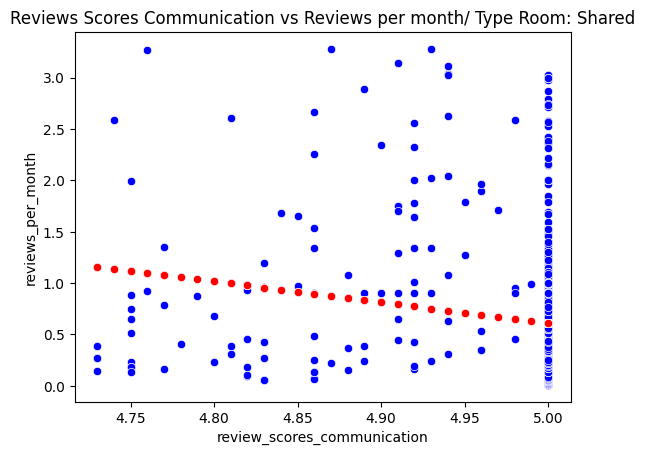

In [470]:
#Visualizamos la gráfica comparativa
sns.scatterplot(x='review_scores_communication', y='reviews_per_month', color='blue', data=shared)
sns.scatterplot(x='review_scores_communication', y='predicciones_6', color='red', data=shared)
plt.title('Reviews Scores Communication vs Reviews per month/ Type Room: Shared')
plt.show()

In [471]:
#Corrobaremos cual es el coeficiente de Determinacion de nuestro modelo (R_Cuadrada)
coef_deter_C6 = model_C6.score(X=vars_indep_C6, y=var_dep_C6)
coef_deter_C6

0.025788125276079543

In [472]:
#Corroboramos cual es el coeficiente de correlacion de nuestro modelo (R)
coef_correl_C6 = np.sqrt(coef_deter_C6)
coef_correl_C6

0.16058681538681668

In [473]:
model_C6.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_communication'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-2.04223142]),
 'rank_': 1,
 'singular_': array([1.43796031]),
 'intercept_': 10.820064151336966}

MODELO MATEMáTICO:

**-2.04223142 X + 10.820064151336966**

# Tabla de Coeficientes de Determinación y Correlación

In [474]:
#Preparar datos del Frame
coef_data = {'Coef_Deter':[coef_deter_C1,coef_deter_C2,coef_deter_C3,coef_deter_C4,coef_deter_C5,coef_deter_C6],
             'Coef_Correl':[coef_correl_C1,coef_correl_C2,coef_correl_C3,coef_correl_C4,coef_correl_C5,coef_correl_C6]}

#Generar con llaves
df_coef_C = pd.DataFrame(coef_data,index=['host_acceptance_rate vs host_response_rate','review_scores_location vs review_scores_cleanliness','host_acceptance_rate vs price','availability_365 vs number_of_reviews','host_acceptance_rate vs number_of_reviews','reviews_per_month vs review_scores_communication'])
print('Tabla de Coeficientes de Determinación y Correlación subdataframe SHARED ROOM\n\n', df_coef_C)

Tabla de Coeficientes de Determinación y Correlación subdataframe SHARED ROOM

                                                       Coef_Deter  Coef_Correl
host_acceptance_rate vs host_response_rate          5.008314e-07     0.000708
review_scores_location vs review_scores_cleanli...  9.735776e-02     0.312022
host_acceptance_rate vs price                       1.457915e-03     0.038183
availability_365 vs number_of_reviews               1.163847e-02     0.107882
host_acceptance_rate vs number_of_reviews           2.111149e-02     0.145298
reviews_per_month vs review_scores_communication    2.578813e-02     0.160587


# Hotel room

In [475]:
#Se genera el SubFrame con los datos donde el tipo de habitacion sea el establecido
hotel = data[data['room_type'] == 'Hotel room']
len(hotel)

25

## Variables 1

In [476]:
#Declaramos las variables dependientes e independientes para la regresion lineal
vars_indep_D1 = hotel[['host_response_rate']]
var_dep_D1 = hotel['host_acceptance_rate']

In [477]:
model_D1 = LinearRegression()

In [478]:
#Ajustamos el modelo con las variables antes declaradas
model_D1.fit(X=vars_indep_D1, y=var_dep_D1)

LinearRegression()

In [479]:
#Predecimos los valores a partir de la variable
y_pred_D1 = model_D1.predict(X=hotel[['host_response_rate']])

In [480]:
#Insertamos la columna de predicciones en el DataFrame
hotel.insert(0,'predicciones_1',y_pred_D1)
hotel.head(3)

predicciones_1              host_name host_since  \
945         0.965539                   Luiz   04/02/14   
1969        0.975708  Sugar Loft Apartments   24/12/13   
3185        1.016383                 Thiago   23/05/14   

               host_location  host_response_time host_is_superhost  \
945              Rio, Brazil      within an hour                 f   
1969  Rio de Janeiro, Brazil  within a few hours                 f   
3185                  Brazil      within an hour                 f   

     host_neighbourhood                host_verifications  \
945              Leblon                ['email', 'phone']   
1969       Santa Teresa                ['email', 'phone']   
3185             Leblon  ['email', 'phone', 'work_email']   

     host_has_profile_pic host_identity_verified                neighbourhood  \
945                     t                      t  Rio, Rio de Janeiro, Brazil   
1969                    t                      t       Rio de Janeiro, Brazil   
3185                    t                      t       Rio de Janeiro, Brazil   

     neighbourhood_cleansed               property_type   room_type  \
945                  Leblon  Room in serviced apartment  Hotel room   
1969           Santa Teresa  Room in serviced apartment  Hotel room   
3185                 Leblon  Room in serviced apartment  Hotel room   

     has_availability instant_bookable          id   host_id  \
945                 t                f   2336651.0  11933736   
1969                t                t   4557003.0  10796926   
3185                t                t  10626211.0  15909977   

      host_response_rate  host_acceptance_rate  host_listings_count  \
945                 1.00                   1.0                  4.0   
1969                0.98                   1.0                  9.0   
3185                0.90                   1.0                  1.0   

      host_total_listings_count  latitude  longitude  accommodates  bathrooms  \
945                         4.0 -22.98291 -43.226520           2.0        1.0   
1969                       16.0 -22.91797 -43.182060           2.0        1.0   
3185                        1.0 -22.98418 -43.222343           6.0        2.0   

      bedrooms  beds   price  minimum_nights  maximum_nights  \
945        1.0   2.0   39.78             2.0            90.0   
1969       0.0   1.0   57.24             1.0           207.7   
3185       2.0   2.0  106.38             3.0           207.7   

      maximum_maximum_nights  minimum_nights_avg_ntm  maximum_nights_avg_ntm  \
945                       90                     2.0                    90.0   
1969                    1125                     1.0                   775.2   
3185                    1125                     3.0                  1125.0   

      availability_30  availability_60  availability_90  availability_365  \
945                20               40               70               345   
1969                4               24               45               304   
3185                7               22               44               243   

      number_of_reviews  number_of_reviews_ltm  review_scores_rating  \
945                12.0                    1.0                  5.00   
1969               10.0                   18.0                  4.83   
3185               10.0                    4.7                  4.65   

      review_scores_accuracy  review_scores_cleanliness  \
945                     5.00                       5.00   
1969                    4.89                       4.91   
3185                    4.68                       4.54   

      review_scores_checkin  review_scores_communication  \
945                    4.92                         5.00   
1969                   4.82                         4.84   
3185                   4.87                         5.00   

      review_scores_location  review_scores_value  \
945                     5.00                 4.67   
1969      

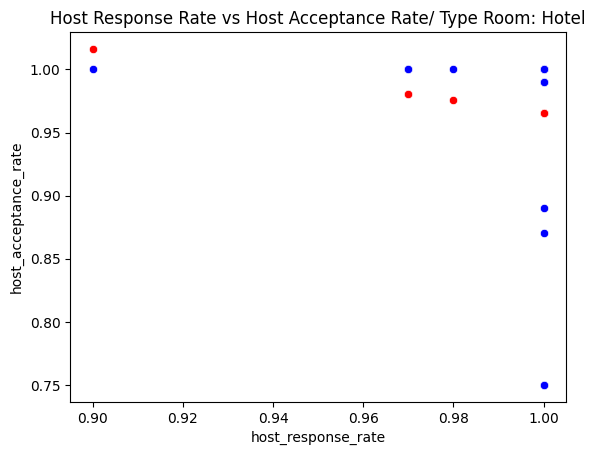

In [481]:
#Visualizamos la gráfica comparativa
sns.scatterplot(x='host_response_rate', y='host_acceptance_rate', color='blue', data=hotel)
sns.scatterplot(x='host_response_rate', y='predicciones_1', color='red', data=hotel)
plt.title('Host Response Rate vs Host Acceptance Rate/ Type Room: Hotel')
plt.show()

In [482]:
#Corrobaremos cual es el coeficiente de Determinacion de nuestro modelo (R_Cuadrada)
coef_deter_D1 = model_D1.score(X=vars_indep_D1, y=var_dep_D1)
coef_deter_D1

0.02158592345851562

In [483]:
#Corroboramos cual es el coeficiente de correlacion de nuestro modelo (R)
coef_correl_D1 = np.sqrt(coef_deter_D1)
coef_correl_D1

0.1469214873955325

## Variables 2

In [484]:
#Declaramos las variables dependientes e independientes para la regresion lineal
vars_indep_D2 = hotel[['review_scores_cleanliness']]
var_dep_D2 = hotel['review_scores_location']

In [485]:
model_D2 = LinearRegression()

In [486]:
#Ajustamos el modelo con las variables antes declaradas
model_D2.fit(X=vars_indep_D2, y=var_dep_D2)

LinearRegression()

In [487]:
#Predecimos los valores a partir de la variable
y_pred_D2 = model_D2.predict(X=hotel[['review_scores_cleanliness']])

In [488]:
#Insertamos la columna de predicciones en el DataFrame
hotel.insert(1,'predicciones_2',y_pred_D2)
hotel.head(3)

predicciones_1  predicciones_2              host_name host_since  \
945         0.965539        4.930710                   Luiz   04/02/14   
1969        0.975708        4.923121  Sugar Loft Apartments   24/12/13   
3185        1.016383        4.891921                 Thiago   23/05/14   

               host_location  host_response_time host_is_superhost  \
945              Rio, Brazil      within an hour                 f   
1969  Rio de Janeiro, Brazil  within a few hours                 f   
3185                  Brazil      within an hour                 f   

     host_neighbourhood                host_verifications  \
945              Leblon                ['email', 'phone']   
1969       Santa Teresa                ['email', 'phone']   
3185             Leblon  ['email', 'phone', 'work_email']   

     host_has_profile_pic host_identity_verified                neighbourhood  \
945                     t                      t  Rio, Rio de Janeiro, Brazil   
1969                    t                      t       Rio de Janeiro, Brazil   
3185                    t                      t       Rio de Janeiro, Brazil   

     neighbourhood_cleansed               property_type   room_type  \
945                  Leblon  Room in serviced apartment  Hotel room   
1969           Santa Teresa  Room in serviced apartment  Hotel room   
3185                 Leblon  Room in serviced apartment  Hotel room   

     has_availability instant_bookable          id   host_id  \
945                 t                f   2336651.0  11933736   
1969                t                t   4557003.0  10796926   
3185                t                t  10626211.0  15909977   

      host_response_rate  host_acceptance_rate  host_listings_count  \
945                 1.00                   1.0                  4.0   
1969                0.98                   1.0                  9.0   
3185                0.90                   1.0                  1.0   

      host_total_listings_count  latitude  longitude  accommodates  bathrooms  \
945                         4.0 -22.98291 -43.226520           2.0        1.0   
1969                       16.0 -22.91797 -43.182060           2.0        1.0   
3185                        1.0 -22.98418 -43.222343           6.0        2.0   

      bedrooms  beds   price  minimum_nights  maximum_nights  \
945        1.0   2.0   39.78             2.0            90.0   
1969       0.0   1.0   57.24             1.0           207.7   
3185       2.0   2.0  106.38             3.0           207.7   

      maximum_maximum_nights  minimum_nights_avg_ntm  maximum_nights_avg_ntm  \
945                       90                     2.0                    90.0   
1969                    1125                     1.0                   775.2   
3185                    1125                     3.0                  1125.0   

      availability_30  availability_60  availability_90  availability_365  \
945                20               40               70               345   
1969                4               24               45               304   
3185                7               22               44               243   

      number_of_reviews  number_of_reviews_ltm  review_scores_rating  \
945                12.0                    1.0                  5.00   
1969               10.0                   18.0                  4.83   
3185               10.0                    4.7                  4.65   

      review_scores_accuracy  review_scores_cleanliness  \
945                     5.00                       5.00   
1969                    4.89                       4.91   
3185                    4.68                       4.54   

      review_scores_checkin  review_scores_communication  \
945                    4.92                         5.00   
1969                   4.82                         4.84   
3185                   4.87                         5.00   

      review_scores_location  review_scores_value  \

Text(0.5, 1.0, 'Review Score Cleanliness vs Reviews Score Location/ Type Room: Hotel')

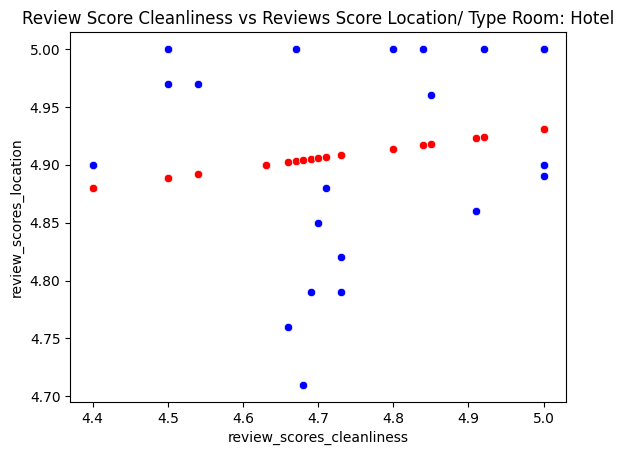

In [489]:
#Visualizamos la gráfica comparativa
sns.scatterplot(x='review_scores_cleanliness', y='review_scores_location', color='blue', data=hotel)
sns.scatterplot(x='review_scores_cleanliness', y='predicciones_2', color='red', data=hotel)
plt.title('Review Score Cleanliness vs Reviews Score Location/ Type Room: Hotel')

In [490]:
#Corrobaremos cual es el coeficiente de Determinacion de nuestro modelo (R_Cuadrada)
coef_deter_D2 = model_D2.score(X=vars_indep_D2, y=var_dep_D2)
coef_deter_D2

0.035437001828957704

In [491]:
#Corroboramos cual es el coeficiente de correlacion de nuestro modelo (R)
coef_correl_D2 = np.sqrt(coef_deter_D2)
coef_correl_D2

0.18824718279155656

## Variables 3

In [492]:
#Declaramos las variables dependientes e independientes para la regresion lineal
vars_indep_D3 = hotel[['price']]
var_dep_D3 = hotel['host_acceptance_rate']

In [493]:
model_D3 = LinearRegression()

In [494]:
#Ajustamos el modelo con las variables antes declaradas
model_D3.fit(X=vars_indep_D3, y=var_dep_D3)

LinearRegression()

In [495]:
#Predecimos los valores a partir de la variable
y_pred_D3 = model_D3.predict(X=hotel[['price']])

In [496]:
#Insertamos la columna de predicciones en el DataFrame
hotel.insert(2,'predicciones_3',y_pred_D3)
hotel.head(3)

predicciones_1  predicciones_2  predicciones_3              host_name  \
945         0.965539        4.930710        0.936277                   Luiz   
1969        0.975708        4.923121        0.953257  Sugar Loft Apartments   
3185        1.016383        4.891921        1.001044                 Thiago   

     host_since           host_location  host_response_time host_is_superhost  \
945    04/02/14             Rio, Brazil      within an hour                 f   
1969   24/12/13  Rio de Janeiro, Brazil  within a few hours                 f   
3185   23/05/14                  Brazil      within an hour                 f   

     host_neighbourhood                host_verifications  \
945              Leblon                ['email', 'phone']   
1969       Santa Teresa                ['email', 'phone']   
3185             Leblon  ['email', 'phone', 'work_email']   

     host_has_profile_pic host_identity_verified                neighbourhood  \
945                     t                      t  Rio, Rio de Janeiro, Brazil   
1969                    t                      t       Rio de Janeiro, Brazil   
3185                    t                      t       Rio de Janeiro, Brazil   

     neighbourhood_cleansed               property_type   room_type  \
945                  Leblon  Room in serviced apartment  Hotel room   
1969           Santa Teresa  Room in serviced apartment  Hotel room   
3185                 Leblon  Room in serviced apartment  Hotel room   

     has_availability instant_bookable          id   host_id  \
945                 t                f   2336651.0  11933736   
1969                t                t   4557003.0  10796926   
3185                t                t  10626211.0  15909977   

      host_response_rate  host_acceptance_rate  host_listings_count  \
945                 1.00                   1.0                  4.0   
1969                0.98                   1.0                  9.0   
3185                0.90                   1.0                  1.0   

      host_total_listings_count  latitude  longitude  accommodates  bathrooms  \
945                         4.0 -22.98291 -43.226520           2.0        1.0   
1969                       16.0 -22.91797 -43.182060           2.0        1.0   
3185                        1.0 -22.98418 -43.222343           6.0        2.0   

      bedrooms  beds   price  minimum_nights  maximum_nights  \
945        1.0   2.0   39.78             2.0            90.0   
1969       0.0   1.0   57.24             1.0           207.7   
3185       2.0   2.0  106.38             3.0           207.7   

      maximum_maximum_nights  minimum_nights_avg_ntm  maximum_nights_avg_ntm  \
945                       90                     2.0                    90.0   
1969                    1125                     1.0                   775.2   
3185                    1125                     3.0                  1125.0   

      availability_30  availability_60  availability_90  availability_365  \
945                20               40               70               345   
1969                4               24               45               304   
3185                7               22               44               243   

      number_of_reviews  number_of_reviews_ltm  review_scores_rating  \
945                12.0                    1.0                  5.00   
1969               10.0                   18.0                  4.83   
3185               10.0                    4.7                  4.65   

      review_scores_accuracy  review_scores_cleanliness  \
945                     5.00                       5.00   
1969                    4.89                       4.91   
3185                    4.68                       4.54   

      review_scores_checkin  review_scores_communication  \
945                    4.92                         5.00   
1969                   4.82                         4.84   
3185                   4.87                      

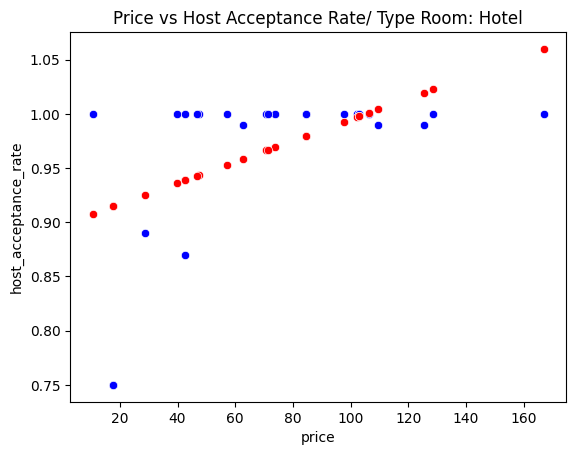

In [497]:
#Visualizamos la gráfica comparativa
sns.scatterplot(x='price', y='host_acceptance_rate', color='blue', data=hotel)
sns.scatterplot(x='price', y='predicciones_3', color='red', data=hotel)
plt.title('Price vs Host Acceptance Rate/ Type Room: Hotel')
plt.show()

In [498]:
#Corrobaremos cual es el coeficiente de Determinacion de nuestro modelo (R_Cuadrada)
coef_deter_D3 = model_D3.score(X=vars_indep_D3, y=var_dep_D3)
coef_deter_D3

0.26950741378262977

In [499]:
#Corroboramos cual es el coeficiente de correlacion de nuestro modelo (R)
coef_correl_D3 = np.sqrt(coef_deter_D3)
coef_correl_D3

0.5191410345779167

In [500]:
model_D3.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['price'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.00097248]),
 'rank_': 1,
 'singular_': array([192.90775935]),
 'intercept_': 0.8975920241264502}

MODELO MATEMáTICO:

**0.00097248 X + 0.8975920241264502**

## Variables 4

In [501]:
#Declaramos las variables dependientes e independientes para la regresion lineal
vars_indep_D4 = hotel[['number_of_reviews']]
var_dep_D4 = hotel['availability_365']

In [502]:
model_D4 = LinearRegression()

In [503]:
#Ajustamos el modelo con las variables antes declaradas
model_D4.fit(X=vars_indep_D4, y=var_dep_D4)

LinearRegression()

In [504]:
#Predecimos los valores a partir de la variable
y_pred_D4 = model_D4.predict(X=hotel[['number_of_reviews']])

In [505]:
#Insertamos la columna de predicciones en el DataFrame
hotel.insert(3,'predicciones_4',y_pred_D4)
hotel.head(3)

predicciones_1  predicciones_2  predicciones_3  predicciones_4  \
945         0.965539        4.930710        0.936277      252.610422   
1969        0.975708        4.923121        0.953257      259.216055   
3185        1.016383        4.891921        1.001044      259.216055   

                  host_name host_since           host_location  \
945                    Luiz   04/02/14             Rio, Brazil   
1969  Sugar Loft Apartments   24/12/13  Rio de Janeiro, Brazil   
3185                 Thiago   23/05/14                  Brazil   

      host_response_time host_is_superhost host_neighbourhood  \
945       within an hour                 f             Leblon   
1969  within a few hours                 f       Santa Teresa   
3185      within an hour                 f             Leblon   

                    host_verifications host_has_profile_pic  \
945                 ['email', 'phone']                    t   
1969                ['email', 'phone']                    t   
3185  ['email', 'phone', 'work_email']                    t   

     host_identity_verified                neighbourhood  \
945                       t  Rio, Rio de Janeiro, Brazil   
1969                      t       Rio de Janeiro, Brazil   
3185                      t       Rio de Janeiro, Brazil   

     neighbourhood_cleansed               property_type   room_type  \
945                  Leblon  Room in serviced apartment  Hotel room   
1969           Santa Teresa  Room in serviced apartment  Hotel room   
3185                 Leblon  Room in serviced apartment  Hotel room   

     has_availability instant_bookable          id   host_id  \
945                 t                f   2336651.0  11933736   
1969                t                t   4557003.0  10796926   
3185                t                t  10626211.0  15909977   

      host_response_rate  host_acceptance_rate  host_listings_count  \
945                 1.00                   1.0                  4.0   
1969                0.98                   1.0                  9.0   
3185                0.90                   1.0                  1.0   

      host_total_listings_count  latitude  longitude  accommodates  bathrooms  \
945                         4.0 -22.98291 -43.226520           2.0        1.0   
1969                       16.0 -22.91797 -43.182060           2.0        1.0   
3185                        1.0 -22.98418 -43.222343           6.0        2.0   

      bedrooms  beds   price  minimum_nights  maximum_nights  \
945        1.0   2.0   39.78             2.0            90.0   
1969       0.0   1.0   57.24             1.0           207.7   
3185       2.0   2.0  106.38             3.0           207.7   

      maximum_maximum_nights  minimum_nights_avg_ntm  maximum_nights_avg_ntm  \
945                       90                     2.0                    90.0   
1969                    1125                     1.0                   775.2   
3185                    1125                     3.0                  1125.0   

      availability_30  availability_60  availability_90  availability_365  \
945                20               40               70               345   
1969                4               24               45               304   
3185                7               22               44               243   

      number_of_reviews  number_of_reviews_ltm  review_scores_rating  \
945                12.0                    1.0                  5.00   
1969               10.0                   18.0                  4.83   
3185               10.0                    4.7                  4.65   

      review_scores_accuracy  review_scores_cleanliness  \
945                     5.00                       5.00   
1969                    4.89                       4.91   
3185                    4.68                       4.54   

      review_scores_checkin  review_scores_communication  \
945                    4.92                         5.00   
1969        

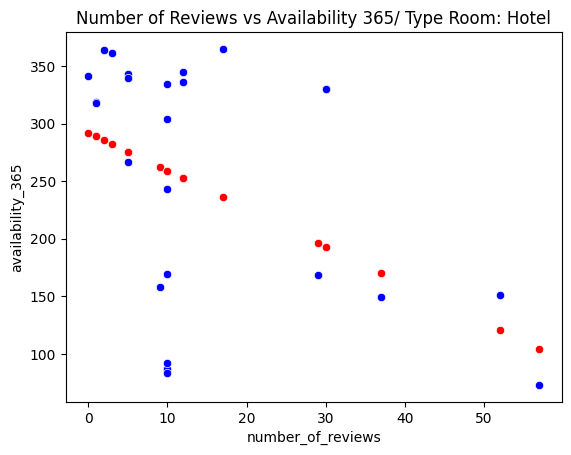

In [506]:
#Visualizamos la gráfica comparativa
sns.scatterplot(x='number_of_reviews', y='availability_365', color='blue', data=hotel)
sns.scatterplot(x='number_of_reviews', y='predicciones_4', color='red', data=hotel)
plt.title('Number of Reviews vs Availability 365/ Type Room: Hotel')
plt.show()

In [507]:
#Corrobaremos cual es el coeficiente de Determinacion de nuestro modelo (R_Cuadrada)
coef_deter_D4 = model_D4.score(X=vars_indep_D4, y=var_dep_D4)
coef_deter_D4

0.21134676705148192

In [508]:
#Corroboramos cual es el coeficiente de correlacion de nuestro modelo (R)
coef_correl_D4 = np.sqrt(coef_deter_D4)
coef_correl_D4

0.45972466439324516

In [509]:
model_D4.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-3.30281659]),
 'rank_': 1,
 'singular_': array([74.24984848]),
 'intercept_': 292.2442209742719}

MODELO MATEMáTICO:

**-3.30281659 X + 292.2442209742719**

## Variables 5

In [510]:
#Declaramos las variables dependientes e independientes para la regresion lineal
vars_indep_D5 = hotel[['number_of_reviews']]
var_dep_D5 = hotel['host_acceptance_rate']

In [511]:
model_D5 = LinearRegression()

In [512]:
#Ajustamos el modelo con las variables antes declaradas
model_D5.fit(X=vars_indep_D5, y=var_dep_D5)

LinearRegression()

In [513]:
#Predecimos los valores a partir de la variable
y_pred_D5 = model_D5.predict(X=hotel[['number_of_reviews']])

In [514]:
#Insertamos la columna de predicciones en el DataFrame
hotel.insert(4,'predicciones_5',y_pred_D5)
hotel.head(3)

predicciones_1  predicciones_2  predicciones_3  predicciones_4  \
945         0.965539        4.930710        0.936277      252.610422   
1969        0.975708        4.923121        0.953257      259.216055   
3185        1.016383        4.891921        1.001044      259.216055   

      predicciones_5              host_name host_since  \
945         0.967473                   Luiz   04/02/14   
1969        0.965958  Sugar Loft Apartments   24/12/13   
3185        0.965958                 Thiago   23/05/14   

               host_location  host_response_time host_is_superhost  \
945              Rio, Brazil      within an hour                 f   
1969  Rio de Janeiro, Brazil  within a few hours                 f   
3185                  Brazil      within an hour                 f   

     host_neighbourhood                host_verifications  \
945              Leblon                ['email', 'phone']   
1969       Santa Teresa                ['email', 'phone']   
3185             Leblon  ['email', 'phone', 'work_email']   

     host_has_profile_pic host_identity_verified                neighbourhood  \
945                     t                      t  Rio, Rio de Janeiro, Brazil   
1969                    t                      t       Rio de Janeiro, Brazil   
3185                    t                      t       Rio de Janeiro, Brazil   

     neighbourhood_cleansed               property_type   room_type  \
945                  Leblon  Room in serviced apartment  Hotel room   
1969           Santa Teresa  Room in serviced apartment  Hotel room   
3185                 Leblon  Room in serviced apartment  Hotel room   

     has_availability instant_bookable          id   host_id  \
945                 t                f   2336651.0  11933736   
1969                t                t   4557003.0  10796926   
3185                t                t  10626211.0  15909977   

      host_response_rate  host_acceptance_rate  host_listings_count  \
945                 1.00                   1.0                  4.0   
1969                0.98                   1.0                  9.0   
3185                0.90                   1.0                  1.0   

      host_total_listings_count  latitude  longitude  accommodates  bathrooms  \
945                         4.0 -22.98291 -43.226520           2.0        1.0   
1969                       16.0 -22.91797 -43.182060           2.0        1.0   
3185                        1.0 -22.98418 -43.222343           6.0        2.0   

      bedrooms  beds   price  minimum_nights  maximum_nights  \
945        1.0   2.0   39.78             2.0            90.0   
1969       0.0   1.0   57.24             1.0           207.7   
3185       2.0   2.0  106.38             3.0           207.7   

      maximum_maximum_nights  minimum_nights_avg_ntm  maximum_nights_avg_ntm  \
945                       90                     2.0                    90.0   
1969                    1125                     1.0                   775.2   
3185                    1125                     3.0                  1125.0   

      availability_30  availability_60  availability_90  availability_365  \
945                20               40               70               345   
1969                4               24               45               304   
3185                7               22               44               243   

      number_of_reviews  number_of_reviews_ltm  review_scores_rating  \
945                12.0                    1.0                  5.00   
1969               10.0                   18.0                  4.83   
3185               10.0                    4.7                  4.65   

      review_scores_accuracy  review_scores_cleanliness  \
945                     5.00                       5.00   
1969                    4.89                       4.91   
3185                    4.68                       4.54   

      review_scores_checkin  review_scores_communication  \
945     

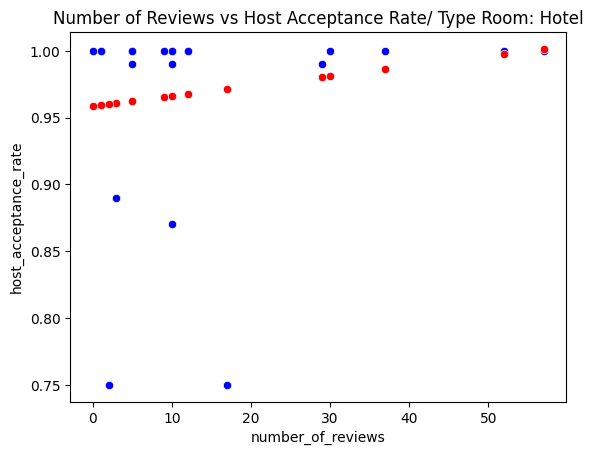

In [515]:
#Visualizamos la gráfica comparativa
sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color='blue', data=hotel)
sns.scatterplot(x='number_of_reviews', y='predicciones_5', color='red', data=hotel)
plt.title('Number of Reviews vs Host Acceptance Rate/ Type Room: Hotel')
plt.show()

In [516]:
#Corrobaremos cual es el coeficiente de Determinacion de nuestro modelo (R_Cuadrada)
coef_deter_D5 = model_D5.score(X=vars_indep_D5, y=var_dep_D5)
coef_deter_D5

0.02421902562358169

In [517]:
#Corroboramos cual es el coeficiente de correlacion de nuestro modelo (R)
coef_correl_D5 = np.sqrt(coef_deter_D5)
coef_correl_D5

0.15562463051709294

## Variables 6

In [518]:
#Declaramos las variables dependientes e independientes para la regresion lineal
vars_indep_D6 = hotel[['review_scores_communication']]
var_dep_D6 = hotel['reviews_per_month']

In [519]:
model_D6 = LinearRegression()

In [520]:
#Ajustamos el modelo con las variables antes declaradas
model_D6.fit(X=vars_indep_D6, y=var_dep_D6)

LinearRegression()

In [521]:
#Predecimos los valores a partir de la variable
y_pred_D6 = model_D6.predict(X=hotel[['review_scores_communication']])

In [522]:
#Insertamos la columna de predicciones en el DataFrame
hotel.insert(5,'predicciones_6',y_pred_D6)
hotel.head(3)

predicciones_1  predicciones_2  predicciones_3  predicciones_4  \
945         0.965539        4.930710        0.936277      252.610422   
1969        0.975708        4.923121        0.953257      259.216055   
3185        1.016383        4.891921        1.001044      259.216055   

      predicciones_5  predicciones_6              host_name host_since  \
945         0.967473         0.41708                   Luiz   04/02/14   
1969        0.965958         0.76137  Sugar Loft Apartments   24/12/13   
3185        0.965958         0.41708                 Thiago   23/05/14   

               host_location  host_response_time host_is_superhost  \
945              Rio, Brazil      within an hour                 f   
1969  Rio de Janeiro, Brazil  within a few hours                 f   
3185                  Brazil      within an hour                 f   

     host_neighbourhood                host_verifications  \
945              Leblon                ['email', 'phone']   
1969       Santa Teresa                ['email', 'phone']   
3185             Leblon  ['email', 'phone', 'work_email']   

     host_has_profile_pic host_identity_verified                neighbourhood  \
945                     t                      t  Rio, Rio de Janeiro, Brazil   
1969                    t                      t       Rio de Janeiro, Brazil   
3185                    t                      t       Rio de Janeiro, Brazil   

     neighbourhood_cleansed               property_type   room_type  \
945                  Leblon  Room in serviced apartment  Hotel room   
1969           Santa Teresa  Room in serviced apartment  Hotel room   
3185                 Leblon  Room in serviced apartment  Hotel room   

     has_availability instant_bookable          id   host_id  \
945                 t                f   2336651.0  11933736   
1969                t                t   4557003.0  10796926   
3185                t                t  10626211.0  15909977   

      host_response_rate  host_acceptance_rate  host_listings_count  \
945                 1.00                   1.0                  4.0   
1969                0.98                   1.0                  9.0   
3185                0.90                   1.0                  1.0   

      host_total_listings_count  latitude  longitude  accommodates  bathrooms  \
945                         4.0 -22.98291 -43.226520           2.0        1.0   
1969                       16.0 -22.91797 -43.182060           2.0        1.0   
3185                        1.0 -22.98418 -43.222343           6.0        2.0   

      bedrooms  beds   price  minimum_nights  maximum_nights  \
945        1.0   2.0   39.78             2.0            90.0   
1969       0.0   1.0   57.24             1.0           207.7   
3185       2.0   2.0  106.38             3.0           207.7   

      maximum_maximum_nights  minimum_nights_avg_ntm  maximum_nights_avg_ntm  \
945                       90                     2.0                    90.0   
1969                    1125                     1.0                   775.2   
3185                    1125                     3.0                  1125.0   

      availability_30  availability_60  availability_90  availability_365  \
945                20               40               70               345   
1969                4               24               45               304   
3185                7               22               44               243   

      number_of_reviews  number_of_reviews_ltm  review_scores_rating  \
945                12.0                    1.0                  5.00   
1969               10.0                   18.0                  4.83   
3185               10.0                    4.7                  4.65   

      review_scores_accuracy  review_scores_cleanliness  \
945                     5.00                       5.00   
1969                    4.89                       4.91   
3185                    4.68                       4.54   

    

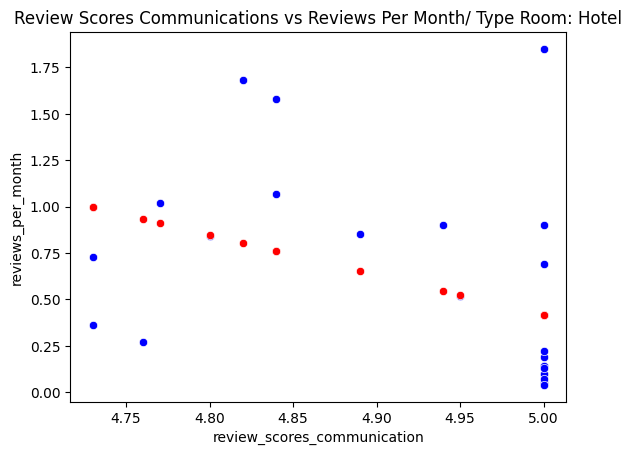

In [523]:
#Visualizamos la gráfica comparativa
sns.scatterplot(x='review_scores_communication', y='reviews_per_month', color='blue', data=hotel)
sns.scatterplot(x='review_scores_communication', y='predicciones_6', color='red', data=hotel)
plt.title('Review Scores Communications vs Reviews Per Month/ Type Room: Hotel')
plt.show()

In [524]:
#Corrobaremos cual es el coeficiente de Determinacion de nuestro modelo (R_Cuadrada)
coef_deter_D6 = model_D6.score(X=vars_indep_D6, y=var_dep_D6)
coef_deter_D6

0.16148146627672877

In [525]:
#Corroboramos cual es el coeficiente de correlacion de nuestro modelo (R)
coef_correl_D6 = np.sqrt(coef_deter_D6)
coef_correl_D6

0.40184756597089

In [526]:
model_D6.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_communication'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-2.15180808]),
 'rank_': 1,
 'singular_': array([0.4991032]),
 'intercept_': 11.176120817008158}

MODELO MATEMáTICO:

**-2.15180808 X + 11.176120817008158**

# Tabla de Coeficientes de Determinación y Correlación

In [527]:
#Preparar datos del Frame
coef_data = {'Coef_Deter':[coef_deter_D1,coef_deter_D2,coef_deter_D3,coef_deter_D4,coef_deter_D5,coef_deter_D6],
             'Coef_Correl':[coef_correl_D1,coef_correl_D2,coef_correl_D3,coef_correl_D4,coef_correl_D5,coef_correl_D6]}

#Generar con llaves
df_coef_D = pd.DataFrame(coef_data,index=['host_acceptance_rate vs host_response_rate','review_scores_location vs review_scores_cleanliness','host_acceptance_rate vs price','availability_365 vs number_of_reviews','host_acceptance_rate vs number_of_reviews','reviews_per_month vs review_scores_communication'])
print('Tabla de Coeficientes de Determinación y Correlación subdataframe HOTEL ROOM\n\n', df_coef_D)

Tabla de Coeficientes de Determinación y Correlación subdataframe HOTEL ROOM

                                                     Coef_Deter  Coef_Correl
host_acceptance_rate vs host_response_rate            0.021586     0.146921
review_scores_location vs review_scores_cleanli...    0.035437     0.188247
host_acceptance_rate vs price                         0.269507     0.519141
availability_365 vs number_of_reviews                 0.211347     0.459725
host_acceptance_rate vs number_of_reviews             0.024219     0.155625
reviews_per_month vs review_scores_communication      0.161481     0.401848


# Regresión Lineal Múltiple

Para poder analizar la Regresión Lineal Múltiple, debemos crear el mejor modelo para cada una de las siguientes 10 variables: **host_id, host_acceptance_rate, host_is_superhost, host_total_listings_count, room_type, accommodates, bedrooms, Price, review_scores_value y reviews_per_month.**

Para hacerlo, debemos encontrar aquellas variables cuantitativas que tienen la mejor correlación. Por lo que primero se deberá convertir el Frame a solo cuantitativas, para posteriormente realizar los procesos pertinentes.

### Convertir Frame a solo Cuantitativo

In [528]:
#Se crea una copia del frame original
data_copia = data.copy()

In [529]:
variables_evaluar= ['host_id', 'host_acceptance_rate', 'host_is_superhost', 'host_total_listings_count', 'room_type', 'accommodates', 'bedrooms', 'price', 'review_scores_value','reviews_per_month']

#### Datos Categoricos convertir a Cuantitativos

Entre las 10 variables a modelar se encuentran 2 que son categoricas, host_is_superhost y room_type. Por lo que primero se deben convertir sus datos a numericos

In [530]:
#Se detectan los valores unicos de la columna
np.unique(data_copia['host_is_superhost'])

array(['f', 't'], dtype=object)

In [531]:
#Se reemplazan los datos categoricos a numerico
data_copia['host_is_superhost'] = data_copia['host_is_superhost'].replace('f',0)
data_copia['host_is_superhost'] = data_copia['host_is_superhost'].replace('t',1)
data_copia['host_is_superhost'] = data_copia['host_is_superhost'].astype(int)

<ipython-input-531-296a0b2b9cf9>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_copia['host_is_superhost'] = data_copia['host_is_superhost'].replace('t',1)


In [532]:
#Se detectan los valores unicos de la columna
np.unique(data_copia['room_type'])

array(['Entire home/apt', 'Hotel room', 'Private room', 'Shared room'],
      dtype=object)

In [533]:
#Se reemplazan los datos categoricos a numerico
data_copia['room_type'] = data_copia['room_type'].replace('Entire home/apt',1)
data_copia['room_type'] = data_copia['room_type'].replace('Hotel room',2)
data_copia['room_type'] = data_copia['room_type'].replace('Private room',3)
data_copia['room_type'] = data_copia['room_type'].replace('Shared room',4)
data_copia['room_type'] = data_copia['room_type'].astype(int)

<ipython-input-533-09f6cc314ba6>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_copia['room_type'] = data_copia['room_type'].replace('Shared room',4)


#### Conservar Únicamente columnas cuantitativas

In [534]:
#Se eliminan columnas innecesarias
data_evaluar = data_copia.select_dtypes(include=[int, float])
data_evaluar.head(3)

host_is_superhost  room_type        id  host_id  host_response_rate  \
0                  1          1   17878.0    68997                 1.0   
1                  1          1   25026.0   102840                 1.0   
2                  0          3  220377.0  1142424                 1.0   

   host_acceptance_rate  host_listings_count  host_total_listings_count  \
0                  1.00                  2.0                        5.0   
1                  0.82                  1.0                        5.0   
2                  0.47                  3.0                        3.0   

   latitude  longitude  accommodates  bathrooms  bedrooms  beds  price  \
0 -22.96599  -43.17940           5.0        1.0       2.0   2.0  55.80   
1 -22.97735  -43.19105           3.0        1.0       1.0   2.0  36.54   
2 -22.92880  -43.24046           2.0        1.0       1.0   1.0  39.60   

   minimum_nights  maximum_nights  maximum_maximum_nights  \
0             5.0            28.0                      28   
1             2.0            60.0                      60   
2             1.0           365.0                    1125   

   minimum_nights_avg_ntm  maximum_nights_avg_ntm  availability_30  \
0                     5.0                    28.0                6   
1                     2.0                    60.0               24   
2                     1.0                  1125.0                9   

   availability_60  availability_90  availability_365  number_of_reviews  \
0               32               51               274               10.0   
1               54               71               241               10.0   
2               29               41               283                5.0   

   number_of_reviews_ltm  review_scores_rating  review_scores_accuracy  \
0                   23.0                  4.71                    4.77   
1                   23.0                  4.73                    4.71   
2                    1.0                  5.00                    5.00   

   review_scores_cleanliness  review_scores_checkin  \
0                       4.64                   4.84   
1                       4.79                   4.82   
2                       5.00                   5.00   

   review_scores_communication  review_scores_location  review_scores_value  \
0                         4.91                    4.77                 4.67   
1                         4.92                    4.84                 4.62   
2                         4.80                    4.80                 5.00   

   calculated_host_listings_count  reviews_per_month  
0                             1.0               1.88  
1                             1.0               1.70  
2                             3.0               0.03

### Crear Modelos

En primer lugar, para facilitar la busqueda de variables que sirvan correctamente como variables independientes para cada modelo se utiliza un 'heat map' el cuál nos muestre las variables con la mejor correlación.

In [535]:
#Encontramos todos los coeficientes de correlacion entre las variables
corr_factors = data_evaluar.corr()
corr_factors

host_is_superhost  room_type        id  \
host_is_superhost                        1.000000  -0.074308 -0.069776   
room_type                               -0.074308   1.000000  0.012383   
id                                      -0.069776   0.012383  1.000000   
host_id                                 -0.102150   0.061589  0.433434   
host_response_rate                       0.037007  -0.021328 -0.025025   
host_acceptance_rate                     0.275697  -0.053824 -0.017318   
host_listings_count                      0.180728   0.079456  0.014963   
host_total_listings_count                0.141758   0.075158 -0.004457   
latitude                                -0.018032   0.117716 -0.007077   
longitude                                0.068334  -0.006770 -0.005366   
accommodates                             0.005881  -0.421850 -0.037620   
bathrooms                               -0.031841  -0.139721 -0.083122   
bedrooms                                -0.040426  -0.251013 -0.045141   
beds                                     0.033462  -0.208207 -0.219951   
price                                   -0.093790  -0.246511 -0.060776   
minimum_nights                           0.042090  -0.205371 -0.204390   
maximum_nights                          -0.041497   0.031571  0.243256   
maximum_maximum_nights                   0.123942  -0.032867 -0.269512   
minimum_nights_avg_ntm                   0.057017  -0.234102 -0.179040   
maximum_nights_avg_ntm                   0.118639  -0.024501 -0.276685   
availability_30                         -0.168378   0.160832  0.034958   
availability_60                         -0.135459   0.133416  0.045465   
availability_90                         -0.131874   0.128474  0.042145   
availability_365                        -0.159410   0.097607 -0.067867   
number_of_reviews                        0.337803  -0.116879 -0.255930   
number_of_reviews_ltm                    0.383337  -0.155837 -0.090543   
review_scores_rating                     0.067023   0.069610  0.229504   
review_scores_accuracy                   0.042433   0.042456  0.200596   
review_scores_cleanliness                0.042031   0.056144  0.241198   
review_scores_checkin                   -0.086128   0.061800  0.237492   
review_scores_communication             -0.052194   0.060001  0.229359   
review_scores_location                  -0.053389   0.033200  0.160690   
review_scores_value                      0.058019   0.084735  0.276022   
calculated_host_listings_count           0.164203   0.091979  0.038403   
reviews_per_month                        0.255718  -0.118153  0.218460   

                                 host_id  host_response_rate  \
host_is_superhost              -0.102150            0.037007   
room_type                       0.061589           -0.021328   
id                              0.433434           -0.025025   
host_id                         1.000000           -0.007796   
host_response_rate             -0.007796            1.000000   
host_acceptance_rate            0.024942            0.093410   
host_listings_count            -0.083874           -0.060843   
host_total_listings_count      -0.118505           -0.056345   
latitude                       -0.037838            0.002350   
longitude                      -0.089633           -0.013953   
accommodates                   -0.039742           -0.006575   
bathrooms                      -0.088504           -0.005447   
bedrooms                       -0.051313            0.000490   
beds                           -0.126870            0.014385   
price                          -0.080573            0.000373   
minimum_nights                 -0.178154            0.009866   
maximum_nights                  0.132185           -0.054833   
maximum_maximum_nights         -0.088349            0.026893   
minimum_nights_avg_ntm         -0.179613            0.015783   
maximum_nights_avg_ntm         -0.079150            0.027799   
availability_30        

In [536]:
#Encontramos el valor absoluto de todas las correlaciones entre las variables
corr_factors1 = abs(corr_factors)
corr_factors1

host_is_superhost  room_type        id  \
host_is_superhost                        1.000000   0.074308  0.069776   
room_type                                0.074308   1.000000  0.012383   
id                                       0.069776   0.012383  1.000000   
host_id                                  0.102150   0.061589  0.433434   
host_response_rate                       0.037007   0.021328  0.025025   
host_acceptance_rate                     0.275697   0.053824  0.017318   
host_listings_count                      0.180728   0.079456  0.014963   
host_total_listings_count                0.141758   0.075158  0.004457   
latitude                                 0.018032   0.117716  0.007077   
longitude                                0.068334   0.006770  0.005366   
accommodates                             0.005881   0.421850  0.037620   
bathrooms                                0.031841   0.139721  0.083122   
bedrooms                                 0.040426   0.251013  0.045141   
beds                                     0.033462   0.208207  0.219951   
price                                    0.093790   0.246511  0.060776   
minimum_nights                           0.042090   0.205371  0.204390   
maximum_nights                           0.041497   0.031571  0.243256   
maximum_maximum_nights                   0.123942   0.032867  0.269512   
minimum_nights_avg_ntm                   0.057017   0.234102  0.179040   
maximum_nights_avg_ntm                   0.118639   0.024501  0.276685   
availability_30                          0.168378   0.160832  0.034958   
availability_60                          0.135459   0.133416  0.045465   
availability_90                          0.131874   0.128474  0.042145   
availability_365                         0.159410   0.097607  0.067867   
number_of_reviews                        0.337803   0.116879  0.255930   
number_of_reviews_ltm                    0.383337   0.155837  0.090543   
review_scores_rating                     0.067023   0.069610  0.229504   
review_scores_accuracy                   0.042433   0.042456  0.200596   
review_scores_cleanliness                0.042031   0.056144  0.241198   
review_scores_checkin                    0.086128   0.061800  0.237492   
review_scores_communication              0.052194   0.060001  0.229359   
review_scores_location                   0.053389   0.033200  0.160690   
review_scores_value                      0.058019   0.084735  0.276022   
calculated_host_listings_count           0.164203   0.091979  0.038403   
reviews_per_month                        0.255718   0.118153  0.218460   

                                 host_id  host_response_rate  \
host_is_superhost               0.102150            0.037007   
room_type                       0.061589            0.021328   
id                              0.433434            0.025025   
host_id                         1.000000            0.007796   
host_response_rate              0.007796            1.000000   
host_acceptance_rate            0.024942            0.093410   
host_listings_count             0.083874            0.060843   
host_total_listings_count       0.118505            0.056345   
latitude                        0.037838            0.002350   
longitude                       0.089633            0.013953   
accommodates                    0.039742            0.006575   
bathrooms                       0.088504            0.005447   
bedrooms                        0.051313            0.000490   
beds                            0.126870            0.014385   
price                           0.080573            0.000373   
minimum_nights                  0.178154            0.009866   
maximum_nights                  0.132185            0.054833   
maximum_maximum_nights          0.088349            0.026893   
minimum_nights_avg_ntm          0.179613            0.015783   
maximum_nights_avg_ntm          0.079150            0.027799   
availability_30        

<Axes: >

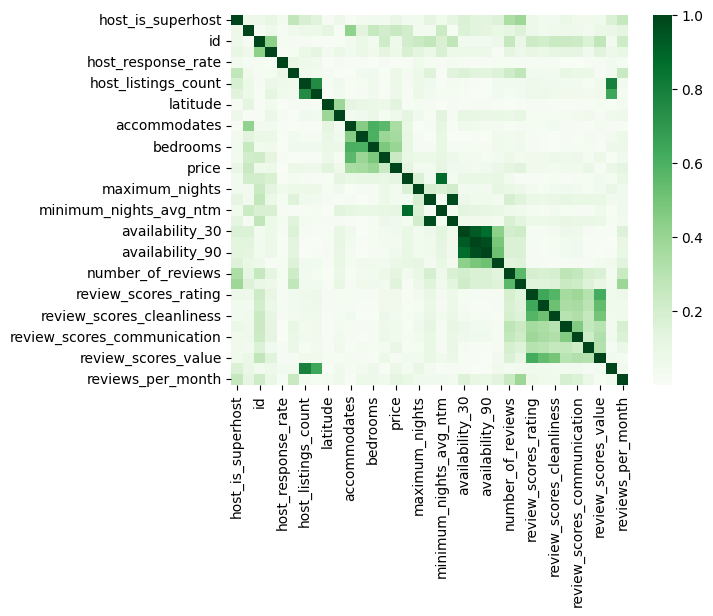

In [537]:
#Ajustemos el mapa del calor de los coeficientes de correlación
Heat_Map = sns.heatmap(corr_factors1, cmap='Greens')
Heat_Map

#### Regresión y Graficación
Crear el mejor modelo de regression lineal multiple para cada variable cuantitativa:

(host_acceptance_rate, host_is_superhost, host_total_listings_count, room_type, accommodates, bedrooms, Price, review_scores_value y reviews_per_month)


##### Host Acceptance Rate

In [538]:
corr_factors1.sort_values(by='host_acceptance_rate', ascending=False).head(7)

host_is_superhost  room_type        id   host_id  \
host_acceptance_rate            0.275697   0.053824  0.017318  0.024942   
host_is_superhost               1.000000   0.074308  0.069776  0.102150   
number_of_reviews_ltm           0.383337   0.155837  0.090543  0.063677   
reviews_per_month               0.255718   0.118153  0.218460  0.100186   
number_of_reviews               0.337803   0.116879  0.255930  0.119480   
availability_30                 0.168378   0.160832  0.034958  0.075397   
availability_365                0.159410   0.097607  0.067867  0.007608   

                       host_response_rate  host_acceptance_rate  \
host_acceptance_rate             0.093410              1.000000   
host_is_superhost                0.037007              0.275697   
number_of_reviews_ltm            0.022801              0.272686   
reviews_per_month                0.019958              0.249251   
number_of_reviews                0.026578              0.220332   
availability_30                  0.015232              0.163765   
availability_365                 0.024360              0.153163   

                       host_listings_count  host_total_listings_count  \
host_acceptance_rate              0.051524                   0.042268   
host_is_superhost                 0.180728                   0.141758   
number_of_reviews_ltm             0.043414                   0.039579   
reviews_per_month                 0.041989                   0.026340   
number_of_reviews                 0.041390                   0.027147   
availability_30                   0.015467                   0.005236   
availability_365                  0.043158                   0.039693   

                       latitude  longitude  accommodates  bathrooms  bedrooms  \
host_acceptance_rate   0.019247   0.004012      0.003986   0.042542  0.047273   
host_is_superhost      0.018032   0.068334      0.005881   0.031841  0.040426   
number_of_reviews_ltm  0.006899   0.105498      0.018173   0.051251  0.048681   
reviews_per_month      0.030529   0.061815      0.010418   0.077730  0.068055   
number_of_reviews      0.000560   0.087639      0.009366   0.035166  0.041820   
availability_30        0.008864   0.102914      0.055515   0.003994  0.024999   
availability_365       0.004390   0.097451      0.028101   0.055673  0.053449   

                           beds     price  minimum_nights  maximum_nights  \
host_acceptance_rate   0.002495  0.071405        0.028710        0.077244   
host_is_superhost      0.033462  0.093790        0.042090        0.041497   
number_of_reviews_ltm  0.037222  0.144408        0.011562        0.066067   
reviews_per_month      0.047295  0.124610        0.097039        0.047908   
number_of_reviews      0.074168  0.118072        0.033367        0.094790   
availability_30        0.038778  0.047700        0.097639        0.045440   
availability_365       0.042722  0.082366        0.105044        0.112294   

                       maximum_maximum_nights  minimum_nights_avg_ntm  \
host_acceptance_rate                 0.151438                0.009171   
host_is_superhost                    0.123942                0.057017   
number_of_reviews_ltm                0.145558                0.056751   
reviews_per_month                    0.047413                0.047781   
number_of_reviews                    0.188953                0.062005   
availability_30                      0.066208                0.132118   
availability_365                     0.032616                0.100737   

                       maximum_nights_avg_ntm  availability_30  \
host_acceptance_rate                 0.143234         0.163765   
host_is_superhost                    0.118639         0.168378   
number_of_reviews_ltm                0.132851         0.215681   
reviews_per_month                    0.038408         0.154324   
number_of_reviews                    0.179404         0.200797   
availability_30                      0.057384        

In [539]:
#Declaramos las variables dependientes e independientes para la regresión lineal
vars_indep_1 = data_evaluar[['host_is_superhost', 'number_of_reviews_ltm', 'reviews_per_month','number_of_reviews','availability_30','availability_365']]
var_dep_1 = data_evaluar['host_acceptance_rate']

In [540]:
model_1 = LinearRegression()

In [541]:
#Ajustamos el modelo con las variables antes declaradas
model_1.fit(X=vars_indep_1, y=var_dep_1)

LinearRegression()

In [542]:
#Predecimos los valores de total de accidentes a partir de las variables: 'alcohol', 'speeding' y 'no_previous'
y_pred_1 = model_1.predict(X=data_evaluar[['host_is_superhost', 'number_of_reviews_ltm', 'reviews_per_month','number_of_reviews','availability_30','availability_365']])

In [543]:
#Insertamos la columna de predicciones en el DataFrame
data_evaluar.insert(0,'predicciones_1',y_pred_1)
data_evaluar.head(3)

predicciones_1  host_is_superhost  room_type        id  host_id  \
0        0.985837                  1          1   17878.0    68997   
1        0.963457                  1          1   25026.0   102840   
2        0.748759                  0          3  220377.0  1142424   

   host_response_rate  host_acceptance_rate  host_listings_count  \
0                 1.0                  1.00                  2.0   
1                 1.0                  0.82                  1.0   
2                 1.0                  0.47                  3.0   

   host_total_listings_count  latitude  longitude  accommodates  bathrooms  \
0                        5.0 -22.96599  -43.17940           5.0        1.0   
1                        5.0 -22.97735  -43.19105           3.0        1.0   
2                        3.0 -22.92880  -43.24046           2.0        1.0   

   bedrooms  beds  price  minimum_nights  maximum_nights  \
0       2.0   2.0  55.80             5.0            28.0   
1       1.0   2.0  36.54             2.0            60.0   
2       1.0   1.0  39.60             1.0           365.0   

   maximum_maximum_nights  minimum_nights_avg_ntm  maximum_nights_avg_ntm  \
0                      28                     5.0                    28.0   
1                      60                     2.0                    60.0   
2                    1125                     1.0                  1125.0   

   availability_30  availability_60  availability_90  availability_365  \
0                6               32               51               274   
1               24               54               71               241   
2                9               29               41               283   

   number_of_reviews  number_of_reviews_ltm  review_scores_rating  \
0               10.0                   23.0                  4.71   
1               10.0                   23.0                  4.73   
2                5.0                    1.0                  5.00   

   review_scores_accuracy  review_scores_cleanliness  review_scores_checkin  \
0                    4.77                       4.64                   4.84   
1                    4.71                       4.79                   4.82   
2                    5.00                       5.00                   5.00   

   review_scores_communication  review_scores_location  review_scores_value  \
0                         4.91                    4.77                 4.67   
1                         4.92                    4.84                 4.62   
2                         4.80                    4.80                 5.00   

   calculated_host_listings_count  reviews_per_month  
0                             1.0               1.88  
1                             1.0               1.70  
2                             3.0               0.03

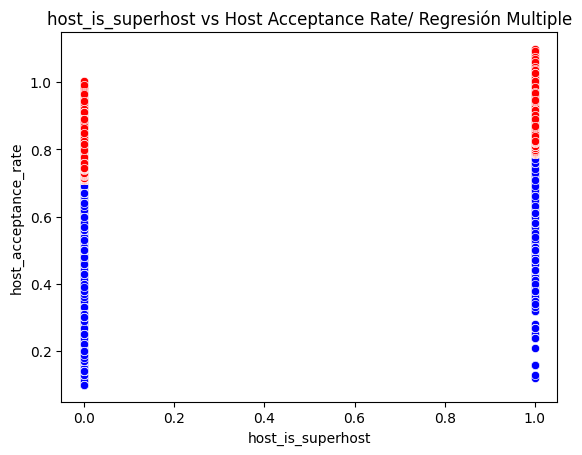

In [544]:
#Visualizamos la grafica comparativa entre el total real y el total parecido
sns.scatterplot(x='host_is_superhost', y='host_acceptance_rate', color='blue', data=data_evaluar)
sns.scatterplot(x='host_is_superhost', y='predicciones_1', color='red', data=data_evaluar)
plt.title('host_is_superhost vs Host Acceptance Rate/ Regresión Multiple')
plt.show()

In [545]:
#Corrobaremos cual es el coeficiente de Determinación de nuestro modelo
coef_deter_1 = model_1.score(X=vars_indep_1, y=var_dep_1)
coef_deter_1

0.1380581746929268

In [546]:
#Corrobaremos cual es el coeficiente de correlación de nuestro modelo
coef_correl_1 = np.sqrt(coef_deter_1)
coef_correl_1

0.3715618046744401

##### Host is Superhost

In [547]:
corr_factors1.sort_values(by='host_is_superhost', ascending=False).head(7)

host_is_superhost  room_type        id   host_id  \
host_is_superhost               1.000000   0.074308  0.069776  0.102150   
number_of_reviews_ltm           0.383337   0.155837  0.090543  0.063677   
number_of_reviews               0.337803   0.116879  0.255930  0.119480   
host_acceptance_rate            0.275697   0.053824  0.017318  0.024942   
reviews_per_month               0.255718   0.118153  0.218460  0.100186   
host_listings_count             0.180728   0.079456  0.014963  0.083874   
availability_30                 0.168378   0.160832  0.034958  0.075397   

                       host_response_rate  host_acceptance_rate  \
host_is_superhost                0.037007              0.275697   
number_of_reviews_ltm            0.022801              0.272686   
number_of_reviews                0.026578              0.220332   
host_acceptance_rate             0.093410              1.000000   
reviews_per_month                0.019958              0.249251   
host_listings_count              0.060843              0.051524   
availability_30                  0.015232              0.163765   

                       host_listings_count  host_total_listings_count  \
host_is_superhost                 0.180728                   0.141758   
number_of_reviews_ltm             0.043414                   0.039579   
number_of_reviews                 0.041390                   0.027147   
host_acceptance_rate              0.051524                   0.042268   
reviews_per_month                 0.041989                   0.026340   
host_listings_count               1.000000                   0.753827   
availability_30                   0.015467                   0.005236   

                       latitude  longitude  accommodates  bathrooms  bedrooms  \
host_is_superhost      0.018032   0.068334      0.005881   0.031841  0.040426   
number_of_reviews_ltm  0.006899   0.105498      0.018173   0.051251  0.048681   
number_of_reviews      0.000560   0.087639      0.009366   0.035166  0.041820   
host_acceptance_rate   0.019247   0.004012      0.003986   0.042542  0.047273   
reviews_per_month      0.030529   0.061815      0.010418   0.077730  0.068055   
host_listings_count    0.014227   0.048061      0.008065   0.026408  0.057360   
availability_30        0.008864   0.102914      0.055515   0.003994  0.024999   

                           beds     price  minimum_nights  maximum_nights  \
host_is_superhost      0.033462  0.093790        0.042090        0.041497   
number_of_reviews_ltm  0.037222  0.144408        0.011562        0.066067   
number_of_reviews      0.074168  0.118072        0.033367        0.094790   
host_acceptance_rate   0.002495  0.071405        0.028710        0.077244   
reviews_per_month      0.047295  0.124610        0.097039        0.047908   
host_listings_count    0.004095  0.076517        0.019066        0.081313   
availability_30        0.038778  0.047700        0.097639        0.045440   

                       maximum_maximum_nights  minimum_nights_avg_ntm  \
host_is_superhost                    0.123942                0.057017   
number_of_reviews_ltm                0.145558                0.056751   
number_of_reviews                    0.188953                0.062005   
host_acceptance_rate                 0.151438                0.009171   
reviews_per_month                    0.047413                0.047781   
host_listings_count                  0.047469                0.008391   
availability_30                      0.066208                0.132118   

                       maximum_nights_avg_ntm  availability_30  \
host_is_superhost                    0.118639         0.168378   
number_of_reviews_ltm                0.132851         0.215681   
number_of_reviews                    0.179404         0.200797   
host_acceptance_rate                 0.143234         0.163765   
reviews_per_month                    0.038408         0.154324   
host_listings_count                  0.028170        

In [548]:
#Declaramos las variables dependientes e independientes para la regresión lineal
vars_indep_2 = data_evaluar[['number_of_reviews_ltm','number_of_reviews','host_acceptance_rate', 'reviews_per_month','host_listings_count','availability_30']]
var_dep_2 = data_evaluar['host_is_superhost']

In [549]:
model_2 = LinearRegression()

In [550]:
#Ajustamos el modelo con las variables antes declaradas
model_2.fit(X=vars_indep_2, y=var_dep_2)

LinearRegression()

In [551]:
#Predecimos los valores de total de accidentes a partir de las variables: 'alcohol', 'speeding' y 'no_previous'
y_pred_2 = model_2.predict(X=data_evaluar[['number_of_reviews_ltm','number_of_reviews','host_acceptance_rate', 'reviews_per_month','host_listings_count','availability_30']])

In [552]:
#Insertamos la columna de predicciones en el DataFrame
data_evaluar.insert(1,'predicciones_2',y_pred_2)
data_evaluar.head(3)

predicciones_1  predicciones_2  host_is_superhost  room_type        id  \
0        0.985837        0.696892                  1          1   17878.0   
1        0.963457        0.563975                  1          1   25026.0   
2        0.748759        0.099917                  0          3  220377.0   

   host_id  host_response_rate  host_acceptance_rate  host_listings_count  \
0    68997                 1.0                  1.00                  2.0   
1   102840                 1.0                  0.82                  1.0   
2  1142424                 1.0                  0.47                  3.0   

   host_total_listings_count  latitude  longitude  accommodates  bathrooms  \
0                        5.0 -22.96599  -43.17940           5.0        1.0   
1                        5.0 -22.97735  -43.19105           3.0        1.0   
2                        3.0 -22.92880  -43.24046           2.0        1.0   

   bedrooms  beds  price  minimum_nights  maximum_nights  \
0       2.0   2.0  55.80             5.0            28.0   
1       1.0   2.0  36.54             2.0            60.0   
2       1.0   1.0  39.60             1.0           365.0   

   maximum_maximum_nights  minimum_nights_avg_ntm  maximum_nights_avg_ntm  \
0                      28                     5.0                    28.0   
1                      60                     2.0                    60.0   
2                    1125                     1.0                  1125.0   

   availability_30  availability_60  availability_90  availability_365  \
0                6               32               51               274   
1               24               54               71               241   
2                9               29               41               283   

   number_of_reviews  number_of_reviews_ltm  review_scores_rating  \
0               10.0                   23.0                  4.71   
1               10.0                   23.0                  4.73   
2                5.0                    1.0                  5.00   

   review_scores_accuracy  review_scores_cleanliness  review_scores_checkin  \
0                    4.77                       4.64                   4.84   
1                    4.71                       4.79                   4.82   
2                    5.00                       5.00                   5.00   

   review_scores_communication  review_scores_location  review_scores_value  \
0                         4.91                    4.77                 4.67   
1                         4.92                    4.84                 4.62   
2                         4.80                    4.80                 5.00   

   calculated_host_listings_count  reviews_per_month  
0                             1.0               1.88  
1                             1.0               1.70  
2                             3.0               0.03

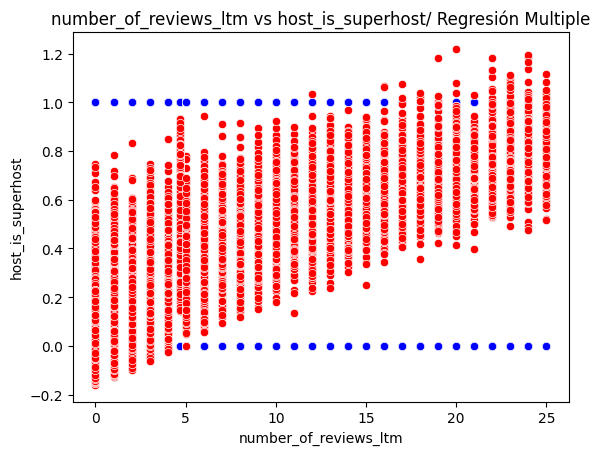

In [553]:
#Visualizamos la grafica comparativa entre el total real y el total parecido
sns.scatterplot(x='number_of_reviews_ltm', y='host_is_superhost', color='blue', data=data_evaluar)
sns.scatterplot(x='number_of_reviews_ltm', y='predicciones_2', color='red', data=data_evaluar)
plt.title('number_of_reviews_ltm vs host_is_superhost/ Regresión Multiple')
plt.show()

In [554]:
#Corrobaremos cual es el coeficiente de Determinación de nuestro modelo
coef_deter_2 = model_2.score(X=vars_indep_2, y=var_dep_2)
coef_deter_2

0.2300698451637465

In [555]:
#Corrobaremos cual es el coeficiente de correlación de nuestro modelo
coef_correl_2 = np.sqrt(coef_deter_2)
coef_correl_2

0.47965596542078626

In [635]:
model_2.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews_ltm', 'number_of_reviews',
        'host_acceptance_rate', 'reviews_per_month', 'host_listings_count',
        'availability_30'], dtype=object),
 'n_features_in_': 6,
 'coef_': array([ 0.0154353 ,  0.00537297,  0.30855286,  0.04826096,  0.02891184,
        -0.00220992]),
 'rank_': 6,
 'singular_': array([2613.11627993, 1950.98139837,  906.7974815 ,  453.83084275,
         142.34555977,   38.53749372]),
 'intercept_': -0.15569713908028876}

MODELO MATEMáTICO:

 **0.0154353 X1 + 0.00537297 X2 +  0.30855286 X3 +  0.04826096 X4 + 0.02891184 X5
        -0.00220992 X6 - 0.15569713908028876**

##### Host Total Listings Count

In [636]:
corr_factors1.sort_values(by='host_total_listings_count', ascending=False).head(7)

host_is_superhost  room_type        id  \
host_total_listings_count                0.141758   0.075158  0.004457   
host_listings_count                      0.180728   0.079456  0.014963   
calculated_host_listings_count           0.164203   0.091979  0.038403   
host_is_superhost                        1.000000   0.074308  0.069776   
host_id                                  0.102150   0.061589  0.433434   
room_type                                0.074308   1.000000  0.012383   
maximum_nights                           0.041497   0.031571  0.243256   

                                 host_id  host_response_rate  \
host_total_listings_count       0.118505            0.056345   
host_listings_count             0.083874            0.060843   
calculated_host_listings_count  0.063763            0.039233   
host_is_superhost               0.102150            0.037007   
host_id                         1.000000            0.007796   
room_type                       0.061589            0.021328   
maximum_nights                  0.132185            0.054833   

                                host_acceptance_rate  host_listings_count  \
host_total_listings_count                   0.042268             0.753827   
host_listings_count                         0.051524             1.000000   
calculated_host_listings_count              0.037068             0.795673   
host_is_superhost                           0.275697             0.180728   
host_id                                     0.024942             0.083874   
room_type                                   0.053824             0.079456   
maximum_nights                              0.077244             0.081313   

                                host_total_listings_count  latitude  \
host_total_listings_count                        1.000000  0.004892   
host_listings_count                              0.753827  0.014227   
calculated_host_listings_count                   0.643661  0.008383   
host_is_superhost                                0.141758  0.018032   
host_id                                          0.118505  0.037838   
room_type                                        0.075158  0.117716   
maximum_nights                                   0.073868  0.025189   

                                longitude  accommodates  bathrooms  bedrooms  \
host_total_listings_count        0.045002      0.004613   0.018977  0.048675   
host_listings_count              0.048061      0.008065   0.026408  0.057360   
calculated_host_listings_count   0.049267      0.018165   0.037266  0.067167   
host_is_superhost                0.068334      0.005881   0.031841  0.040426   
host_id                          0.089633      0.039742   0.088504  0.051313   
room_type                        0.006770      0.421850   0.139721  0.251013   
maximum_nights                   0.048572      0.003412   0.020729  0.014341   

                                    beds     price  minimum_nights  \
host_total_listings_count       0.006944  0.069165        0.004046   
host_listings_count             0.004095  0.076517        0.019066   
calculated_host_listings_count  0.008868  0.086507        0.028288   
host_is_superhost               0.033462  0.093790        0.042090   
host_id                         0.126870  0.080573        0.178154   
room_type                       0.208207  0.246511        0.205371   
maximum_nights                  0.079476  0.032648        0.167401   

                                maximum_nights  maximum_maximum_nights  \
host_total_listings_count             0.073868                0.039781   
host_listings_count                   0.081313                0.047469   
calculated_host_listings_count        0.090298                0.035552   
host_is_superhost                     0.041497                0.123942   
host_id                               0.132185                0.088349   
room_type                             0.031571                0.032867   
maximum_nights      

In [637]:
#Declaramos las variables dependientes e independientes para la regresión lineal
vars_indep_3 = data_evaluar[['host_listings_count','calculated_host_listings_count','host_is_superhost','host_id','room_type','maximum_nights']]
var_dep_3 = data_evaluar['host_total_listings_count']

In [638]:
model_3 = LinearRegression()

In [639]:
#Ajustamos el modelo con las variables antes declaradas
model_3.fit(X=vars_indep_3, y=var_dep_3)

LinearRegression()

In [640]:
#Predecimos los valores de total de accidentes a partir de las variables: 'alcohol', 'speeding' y 'no_previous'
y_pred_3 = model_3.predict(X=data_evaluar[['host_listings_count','calculated_host_listings_count','host_is_superhost','host_id','room_type','maximum_nights']])

In [641]:
#Insertamos la columna de predicciones en el DataFrame
data_evaluar.insert(2,'predicciones_3',y_pred_3)
data_evaluar.head(3)

ValueError: cannot insert predicciones_3, already exists

In [ ]:
#Visualizamos la grafica comparativa entre el total real y el total parecido
sns.scatterplot(x='host_listings_count', y='host_total_listings_count', color='blue', data=data_evaluar)
sns.scatterplot(x='host_listings_count', y='predicciones_3', color='red', data=data_evaluar)
plt.title('host_listings_count vs host_total_listings_count/ Regresión Multiple')
plt.show()

In [ ]:
#Corrobaremos cual es el coeficiente de Determinación de nuestro modelo
coef_deter_3 = model_3.score(X=vars_indep_3, y=var_dep_3)
coef_deter_3

In [ ]:
#Corrobaremos cual es el coeficiente de correlación de nuestro modelo
coef_correl_3 = np.sqrt(coef_deter_3)
coef_correl_3

##### Room Type

In [642]:
corr_factors1.sort_values(by='room_type', ascending=False).head(7)

host_is_superhost  room_type        id   host_id  \
room_type                        0.074308   1.000000  0.012383  0.061589   
accommodates                     0.005881   0.421850  0.037620  0.039742   
bedrooms                         0.040426   0.251013  0.045141  0.051313   
price                            0.093790   0.246511  0.060776  0.080573   
minimum_nights_avg_ntm           0.057017   0.234102  0.179040  0.179613   
beds                             0.033462   0.208207  0.219951  0.126870   
minimum_nights                   0.042090   0.205371  0.204390  0.178154   

                        host_response_rate  host_acceptance_rate  \
room_type                         0.021328              0.053824   
accommodates                      0.006575              0.003986   
bedrooms                          0.000490              0.047273   
price                             0.000373              0.071405   
minimum_nights_avg_ntm            0.015783              0.009171   
beds                              0.014385              0.002495   
minimum_nights                    0.009866              0.028710   

                        host_listings_count  host_total_listings_count  \
room_type                          0.079456                   0.075158   
accommodates                       0.008065                   0.004613   
bedrooms                           0.057360                   0.048675   
price                              0.076517                   0.069165   
minimum_nights_avg_ntm             0.008391                   0.024455   
beds                               0.004095                   0.006944   
minimum_nights                     0.019066                   0.004046   

                        latitude  longitude  accommodates  bathrooms  \
room_type               0.117716   0.006770      0.421850   0.139721   
accommodates            0.118622   0.040424      1.000000   0.452378   
bedrooms                0.089660   0.086028      0.602983   0.599009   
price                   0.140497   0.059874      0.345658   0.360864   
minimum_nights_avg_ntm  0.002202   0.138210      0.110692   0.101063   
beds                    0.068937   0.026292      0.559719   0.392558   
minimum_nights          0.009024   0.118161      0.096958   0.102723   

                        bedrooms      beds     price  minimum_nights  \
room_type               0.251013  0.208207  0.246511        0.205371   
accommodates            0.602983  0.559719  0.345658        0.096958   
bedrooms                1.000000  0.478755  0.394925        0.101862   
price                   0.394925  0.241413  1.000000        0.121920   
minimum_nights_avg_ntm  0.101523  0.104093  0.114845        0.877475   
beds                    0.478755  1.000000  0.241413        0.094317   
minimum_nights          0.101862  0.094317  0.121920        1.000000   

                        maximum_nights  maximum_maximum_nights  \
room_type                     0.031571                0.032867   
accommodates                  0.003412                0.021928   
bedrooms                      0.014341                0.017944   
price                         0.032648                0.042709   
minimum_nights_avg_ntm        0.167366                0.026252   
beds                          0.079476                0.075115   
minimum_nights                0.167401                0.045588   

                        minimum_nights_avg_ntm  maximum_nights_avg_ntm  \
room_type                             0.234102                0.024501   
accommodates                          0.110692                0.010302   
bedrooms                              0.101523                0.021265   
price                                 0.114845                0.047069   
minimum_nights_avg_ntm                1.000000                0.025137   
beds                                  0.104093                0.063859   
minimum_nights                        0.877475                0.030640   

 

In [643]:
#Declaramos las variables dependientes e independientes para la regresión lineal
vars_indep_4 = data_evaluar[['accommodates', 'bedrooms', 'price','minimum_nights_avg_ntm','beds','minimum_nights']]
var_dep_4 = data_evaluar['room_type']

In [644]:
model_4 = LinearRegression()

In [645]:
#Ajustamos el modelo con las variables antes declaradas
model_4.fit(X=vars_indep_4, y=var_dep_4)

LinearRegression()

In [646]:
#Predecimos los valores de total de accidentes a partir de las variables: 'alcohol', 'speeding' y 'no_previous'
y_pred_4 = model_4.predict(X=data_evaluar[['accommodates', 'bedrooms', 'price','minimum_nights_avg_ntm','beds','minimum_nights']])

In [647]:
#Insertamos la columna de predicciones en el DataFrame
data_evaluar.insert(3,'predicciones_4',y_pred_4)
data_evaluar.head(3)

ValueError: cannot insert predicciones_4, already exists

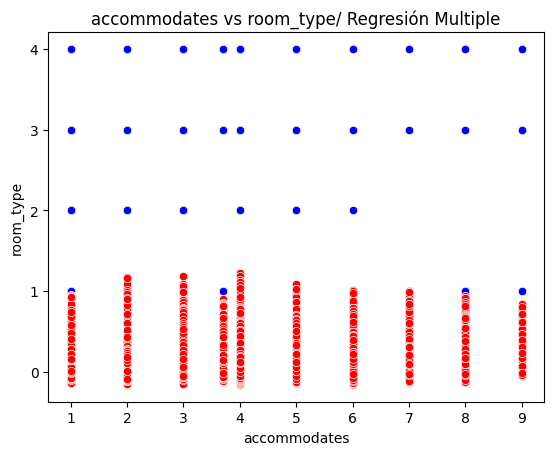

In [648]:
#Visualizamos la grafica comparativa entre el total real y el total parecido
sns.scatterplot(x='accommodates', y='room_type', color='blue', data=data_evaluar)
sns.scatterplot(x='accommodates', y='predicciones_2', color='red', data=data_evaluar)
plt.title('accommodates vs room_type/ Regresión Multiple')
plt.show()

In [649]:
#Corrobaremos cual es el coeficiente de Determinación de nuestro modelo
coef_deter_4 = model_4.score(X=vars_indep_4, y=var_dep_4)
coef_deter_4

0.2251204436816192

In [650]:
#Corrobaremos cual es el coeficiente de correlación de nuestro modelo
coef_correl_4 = np.sqrt(coef_deter_4)
coef_correl_4

0.47446859082727405

In [651]:
model_4.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['accommodates', 'bedrooms', 'price', 'minimum_nights_avg_ntm',
        'beds', 'minimum_nights'], dtype=object),
 'n_features_in_': 6,
 'coef_': array([-0.21154343,  0.04245461, -0.0023308 , -0.14979379,  0.03287116,
         0.00549816]),
 'rank_': 6,
 'singular_': array([7456.34810105,  346.58425195,  278.99328099,  183.03899038,
          98.69930025,   72.39271367]),
 'intercept_': 2.579334233615655}

MODELO MATEMático

**-0.21154343 X1 +  0.04245461 X2 -0.0023308 X3 -0.14979379 X4 +  0.03287116 X5 + 0.00549816 X6 +  2.579334233615655**

##### Bedrooms

In [587]:
corr_factors1.sort_values(by='bedrooms', ascending=False).head(7)

host_is_superhost  room_type        id   host_id  \
bedrooms                 0.040426   0.251013  0.045141  0.051313   
accommodates             0.005881   0.421850  0.037620  0.039742   
bathrooms                0.031841   0.139721  0.083122  0.088504   
beds                     0.033462   0.208207  0.219951  0.126870   
price                    0.093790   0.246511  0.060776  0.080573   
room_type                0.074308   1.000000  0.012383  0.061589   
minimum_nights           0.042090   0.205371  0.204390  0.178154   

                host_response_rate  host_acceptance_rate  host_listings_count  \
bedrooms                  0.000490              0.047273             0.057360   
accommodates              0.006575              0.003986             0.008065   
bathrooms                 0.005447              0.042542             0.026408   
beds                      0.014385              0.002495             0.004095   
price                     0.000373              0.071405             0.076517   
room_type                 0.021328              0.053824             0.079456   
minimum_nights            0.009866              0.028710             0.019066   

                host_total_listings_count  latitude  longitude  accommodates  \
bedrooms                         0.048675  0.089660   0.086028      0.602983   
accommodates                     0.004613  0.118622   0.040424      1.000000   
bathrooms                        0.018977  0.090119   0.050625      0.452378   
beds                             0.006944  0.068937   0.026292      0.559719   
price                            0.069165  0.140497   0.059874      0.345658   
room_type                        0.075158  0.117716   0.006770      0.421850   
minimum_nights                   0.004046  0.009024   0.118161      0.096958   

                bathrooms  bedrooms      beds     price  minimum_nights  \
bedrooms         0.599009  1.000000  0.478755  0.394925        0.101862   
accommodates     0.452378  0.602983  0.559719  0.345658        0.096958   
bathrooms        1.000000  0.599009  0.392558  0.360864        0.102723   
beds             0.392558  0.478755  1.000000  0.241413        0.094317   
price            0.360864  0.394925  0.241413  1.000000        0.121920   
room_type        0.139721  0.251013  0.208207  0.246511        0.205371   
minimum_nights   0.102723  0.101862  0.094317  0.121920        1.000000   

                maximum_nights  maximum_maximum_nights  \
bedrooms              0.014341                0.017944   
accommodates          0.003412                0.021928   
bathrooms             0.020729                0.000200   
beds                  0.079476                0.075115   
price                 0.032648                0.042709   
room_type             0.031571                0.032867   
minimum_nights        0.167401                0.045588   

                minimum_nights_avg_ntm  maximum_nights_avg_ntm  \
bedrooms                      0.101523                0.021265   
accommodates                  0.110692                0.010302   
bathrooms                     0.101063                0.003183   
beds                          0.104093                0.063859   
price                         0.114845                0.047069   
room_type                     0.234102                0.024501   
minimum_nights                0.877475                0.030640   

                availability_30  availability_60  availability_90  \
bedrooms               0.024999         0.025775         0.017134   
accommodates           0.055515         0.042756         0.030735   
bathrooms              0.003994         0.007236         0.003996   
beds                   0.038778         0.032663         0.024721   
price                  0.047700         0.034778         0.050824   
room_type              0.160832         0.133416         0.128474   
minimum_nights         0.097639         0.095810         0.094453   

                availability_365 

In [588]:
#Declaramos las variables dependientes e independientes para la regresión lineal
vars_indep_6 = data_evaluar[['accommodates','bathrooms','beds','price','room_type','minimum_nights']]
var_dep_6 = data_evaluar['bedrooms']

In [589]:
model_6 = LinearRegression()

In [590]:
#Ajustamos el modelo con las variables antes declaradas
model_6.fit(X=vars_indep_6, y=var_dep_6)

LinearRegression()

In [591]:
#Predecimos los valores de total de accidentes a partir de las variables: 'alcohol', 'speeding' y 'no_previous'
y_pred_6 = model_6.predict(X=data_evaluar[['accommodates','bathrooms','beds','price','room_type','minimum_nights']])

In [592]:
#Insertamos la columna de predicciones en el DataFrame
data_evaluar.insert(5,'predicciones_6',y_pred_6)
data_evaluar.head(3)

predicciones_1  predicciones_2  predicciones_3  predicciones_4  \
0        0.985837        0.696892        2.845129        0.820732   
1        0.963457        0.563975        1.965101        1.679142   
2        0.748759        0.099917        4.370139        1.994978   

   host_is_superhost  predicciones_6  room_type        id  host_id  \
0                  1        1.424824          1   17878.0    68997   
1                  1        1.093401          1   25026.0   102840   
2                  0        0.880529          3  220377.0  1142424   

   host_response_rate  host_acceptance_rate  host_listings_count  \
0                 1.0                  1.00                  2.0   
1                 1.0                  0.82                  1.0   
2                 1.0                  0.47                  3.0   

   host_total_listings_count  latitude  longitude  accommodates  bathrooms  \
0                        5.0 -22.96599  -43.17940           5.0        1.0   
1                        5.0 -22.97735  -43.19105           3.0        1.0   
2                        3.0 -22.92880  -43.24046           2.0        1.0   

   bedrooms  beds  price  minimum_nights  maximum_nights  \
0       2.0   2.0  55.80             5.0            28.0   
1       1.0   2.0  36.54             2.0            60.0   
2       1.0   1.0  39.60             1.0           365.0   

   maximum_maximum_nights  minimum_nights_avg_ntm  maximum_nights_avg_ntm  \
0                      28                     5.0                    28.0   
1                      60                     2.0                    60.0   
2                    1125                     1.0                  1125.0   

   availability_30  availability_60  availability_90  availability_365  \
0                6               32               51               274   
1               24               54               71               241   
2                9               29               41               283   

   number_of_reviews  number_of_reviews_ltm  review_scores_rating  \
0               10.0                   23.0                  4.71   
1               10.0                   23.0                  4.73   
2                5.0                    1.0                  5.00   

   review_scores_accuracy  review_scores_cleanliness  review_scores_checkin  \
0                    4.77                       4.64                   4.84   
1                    4.71                       4.79                   4.82   
2                    5.00                       5.00                   5.00   

   review_scores_communication  review_scores_location  review_scores_value  \
0                         4.91                    4.77                 4.67   
1                         4.92                    4.84                 4.62   
2                         4.80                    4.80                 5.00   

   calculated_host_listings_count  reviews_per_month  
0                             1.0               1.88  
1                             1.0               1.70  
2                             3.0               0.03

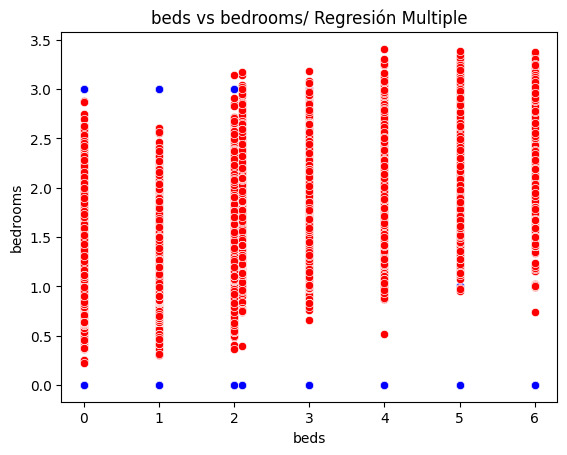

In [593]:
#Visualizamos la grafica comparativa entre el total real y el total parecido
sns.scatterplot(x='beds', y='bedrooms', color='blue', data=data_evaluar)
sns.scatterplot(x='beds', y='predicciones_6', color='red', data=data_evaluar)
plt.title('beds vs bedrooms/ Regresión Multiple')
plt.show()

In [594]:
#Corrobaremos cual es el coeficiente de Determinación de nuestro modelo
coef_deter_6 = model_6.score(X=vars_indep_6, y=var_dep_6)
coef_deter_6

0.5204984658015865

In [595]:
#Corrobaremos cual es el coeficiente de correlación de nuestro modelo
coef_correl_6 = np.sqrt(coef_deter_6)
coef_correl_6

0.7214557961521874

##### Price

In [596]:
corr_factors1.sort_values(by='price', ascending=False).head(7)

host_is_superhost  room_type        id   host_id  \
price                           0.093790   0.246511  0.060776  0.080573   
bedrooms                        0.040426   0.251013  0.045141  0.051313   
bathrooms                       0.031841   0.139721  0.083122  0.088504   
accommodates                    0.005881   0.421850  0.037620  0.039742   
room_type                       0.074308   1.000000  0.012383  0.061589   
beds                            0.033462   0.208207  0.219951  0.126870   
number_of_reviews_ltm           0.383337   0.155837  0.090543  0.063677   

                       host_response_rate  host_acceptance_rate  \
price                            0.000373              0.071405   
bedrooms                         0.000490              0.047273   
bathrooms                        0.005447              0.042542   
accommodates                     0.006575              0.003986   
room_type                        0.021328              0.053824   
beds                             0.014385              0.002495   
number_of_reviews_ltm            0.022801              0.272686   

                       host_listings_count  host_total_listings_count  \
price                             0.076517                   0.069165   
bedrooms                          0.057360                   0.048675   
bathrooms                         0.026408                   0.018977   
accommodates                      0.008065                   0.004613   
room_type                         0.079456                   0.075158   
beds                              0.004095                   0.006944   
number_of_reviews_ltm             0.043414                   0.039579   

                       latitude  longitude  accommodates  bathrooms  bedrooms  \
price                  0.140497   0.059874      0.345658   0.360864  0.394925   
bedrooms               0.089660   0.086028      0.602983   0.599009  1.000000   
bathrooms              0.090119   0.050625      0.452378   1.000000  0.599009   
accommodates           0.118622   0.040424      1.000000   0.452378  0.602983   
room_type              0.117716   0.006770      0.421850   0.139721  0.251013   
beds                   0.068937   0.026292      0.559719   0.392558  0.478755   
number_of_reviews_ltm  0.006899   0.105498      0.018173   0.051251  0.048681   

                           beds     price  minimum_nights  maximum_nights  \
price                  0.241413  1.000000        0.121920        0.032648   
bedrooms               0.478755  0.394925        0.101862        0.014341   
bathrooms              0.392558  0.360864        0.102723        0.020729   
accommodates           0.559719  0.345658        0.096958        0.003412   
room_type              0.208207  0.246511        0.205371        0.031571   
beds                   1.000000  0.241413        0.094317        0.079476   
number_of_reviews_ltm  0.037222  0.144408        0.011562        0.066067   

                       maximum_maximum_nights  minimum_nights_avg_ntm  \
price                                0.042709                0.114845   
bedrooms                             0.017944                0.101523   
bathrooms                            0.000200                0.101063   
accommodates                         0.021928                0.110692   
room_type                            0.032867                0.234102   
beds                                 0.075115                0.104093   
number_of_reviews_ltm                0.145558                0.056751   

                       maximum_nights_avg_ntm  availability_30  \
price                                0.047069         0.047700   
bedrooms                             0.021265         0.024999   
bathrooms                            0.003183         0.003994   
accommodates                         0.010302         0.055515   
room_type                            0.024501         0.160832   
beds                                 0.063859        

In [597]:
#Declaramos las variables dependientes e independientes para la regresión lineal
vars_indep_7 = data_evaluar[['bedrooms', 'bathrooms', 'accommodates','room_type','beds','number_of_reviews_ltm']]
var_dep_7 = data_evaluar['price']

In [598]:
model_7 = LinearRegression()

In [599]:
#Ajustamos el modelo con las variables antes declaradas
model_7.fit(X=vars_indep_7, y=var_dep_7)

LinearRegression()

In [600]:
#Predecimos los valores de total de accidentes a partir de las variables: 'alcohol', 'speeding' y 'no_previous'
y_pred_7 = model_7.predict(X=data_evaluar[['bedrooms', 'bathrooms', 'accommodates','room_type','beds','number_of_reviews_ltm']])

In [601]:
#Insertamos la columna de predicciones en el DataFrame
data_evaluar.insert(6,'predicciones_7',y_pred_7)
data_evaluar.head(3)

predicciones_1  predicciones_2  predicciones_3  predicciones_4  \
0        0.985837        0.696892        2.845129        0.820732   
1        0.963457        0.563975        1.965101        1.679142   
2        0.748759        0.099917        4.370139        1.994978   

   host_is_superhost  predicciones_6  predicciones_7  room_type        id  \
0                  1        1.424824       53.007059          1   17878.0   
1                  1        1.093401       38.669061          1   25026.0   
2                  0        0.880529       43.304613          3  220377.0   

   host_id  host_response_rate  host_acceptance_rate  host_listings_count  \
0    68997                 1.0                  1.00                  2.0   
1   102840                 1.0                  0.82                  1.0   
2  1142424                 1.0                  0.47                  3.0   

   host_total_listings_count  latitude  longitude  accommodates  bathrooms  \
0                        5.0 -22.96599  -43.17940           5.0        1.0   
1                        5.0 -22.97735  -43.19105           3.0        1.0   
2                        3.0 -22.92880  -43.24046           2.0        1.0   

   bedrooms  beds  price  minimum_nights  maximum_nights  \
0       2.0   2.0  55.80             5.0            28.0   
1       1.0   2.0  36.54             2.0            60.0   
2       1.0   1.0  39.60             1.0           365.0   

   maximum_maximum_nights  minimum_nights_avg_ntm  maximum_nights_avg_ntm  \
0                      28                     5.0                    28.0   
1                      60                     2.0                    60.0   
2                    1125                     1.0                  1125.0   

   availability_30  availability_60  availability_90  availability_365  \
0                6               32               51               274   
1               24               54               71               241   
2                9               29               41               283   

   number_of_reviews  number_of_reviews_ltm  review_scores_rating  \
0               10.0                   23.0                  4.71   
1               10.0                   23.0                  4.73   
2                5.0                    1.0                  5.00   

   review_scores_accuracy  review_scores_cleanliness  review_scores_checkin  \
0                    4.77                       4.64                   4.84   
1                    4.71                       4.79                   4.82   
2                    5.00                       5.00                   5.00   

   review_scores_communication  review_scores_location  review_scores_value  \
0                         4.91                    4.77                 4.67   
1                         4.92                    4.84                 4.62   
2                         4.80                    4.80                 5.00   

   calculated_host_listings_count  reviews_per_month  
0                             1.0               1.88  
1                             1.0               1.70  
2                             3.0               0.03

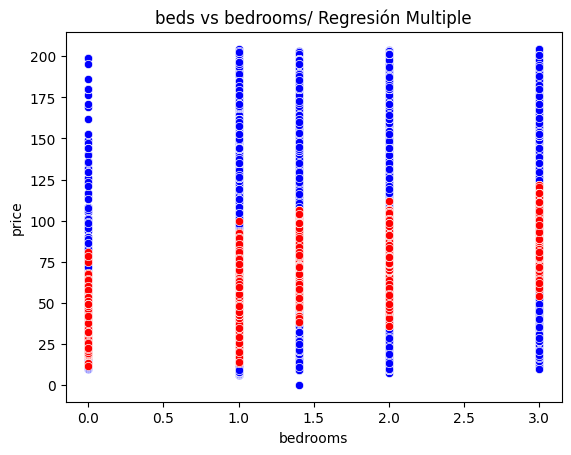

In [602]:
#Visualizamos la grafica comparativa entre el total real y el total parecido
sns.scatterplot(x='bedrooms', y='price', color='blue', data=data_evaluar)
sns.scatterplot(x='bedrooms', y='predicciones_7', color='red', data=data_evaluar)
plt.title('beds vs bedrooms/ Regresión Multiple')
plt.show()

In [603]:
#Corrobaremos cual es el coeficiente de Determinación de nuestro modelo
coef_deter_7 = model_7.score(X=vars_indep_7, y=var_dep_7)
coef_deter_7

0.23050605778012612

In [604]:
#Corrobaremos cual es el coeficiente de correlación de nuestro modelo
coef_correl_7 = np.sqrt(coef_deter_7)
coef_correl_7

0.48011046414354075

In [652]:
model_7.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['bedrooms', 'bathrooms', 'accommodates', 'room_type', 'beds',
        'number_of_reviews_ltm'], dtype=object),
 'n_features_in_': 6,
 'coef_': array([10.40383058, 11.24284102,  1.9670839 , -7.57498349,  0.23303367,
        -0.99934714]),
 'rank_': 6,
 'singular_': array([1143.79501666,  379.89920816,  188.03605156,  138.07201461,
         117.93609626,   77.66526686]),
 'intercept_': 41.21503759741864}

MODELO MATEMáTICO:

**10.40383058 X1 + 11.24284102 X2 + 1.9670839 X3 -7.57498349 X4 +  0.23303367 X5 -0.99934714 X6 + 41.21503759741864**

##### Review Scores Value

In [605]:
corr_factors1.sort_values(by='review_scores_value', ascending=False).head(7)

host_is_superhost  room_type        id   host_id  \
review_scores_value                   0.058019   0.084735  0.276022  0.141593   
review_scores_rating                  0.067023   0.069610  0.229504  0.105638   
review_scores_accuracy                0.042433   0.042456  0.200596  0.083601   
review_scores_cleanliness             0.042031   0.056144  0.241198  0.111657   
review_scores_communication           0.052194   0.060001  0.229359  0.118898   
review_scores_location                0.053389   0.033200  0.160690  0.048730   
review_scores_checkin                 0.086128   0.061800  0.237492  0.118049   

                             host_response_rate  host_acceptance_rate  \
review_scores_value                    0.016971              0.015801   
review_scores_rating                   0.019078              0.046039   
review_scores_accuracy                 0.021090              0.042073   
review_scores_cleanliness              0.019244              0.037536   
review_scores_communication            0.002054              0.089363   
review_scores_location                 0.013183              0.088067   
review_scores_checkin                  0.003761              0.103972   

                             host_listings_count  host_total_listings_count  \
review_scores_value                     0.051222                   0.053984   
review_scores_rating                    0.059405                   0.065243   
review_scores_accuracy                  0.056391                   0.066137   
review_scores_cleanliness               0.048849                   0.056785   
review_scores_communication             0.046550                   0.052687   
review_scores_location                  0.026367                   0.033088   
review_scores_checkin                   0.046944                   0.051566   

                             latitude  longitude  accommodates  bathrooms  \
review_scores_value          0.024614   0.019142      0.030507   0.012289   
review_scores_rating         0.016308   0.026598      0.023682   0.019876   
review_scores_accuracy       0.014241   0.017704      0.023070   0.009760   
review_scores_cleanliness    0.006694   0.025367      0.042546   0.002327   
review_scores_communication  0.004399   0.040904      0.018450   0.006697   
review_scores_location       0.010579   0.054125      0.005130   0.030972   
review_scores_checkin        0.007473   0.027646      0.016980   0.012181   

                             bedrooms      beds     price  minimum_nights  \
review_scores_value          0.005292  0.070641  0.014069        0.041475   
review_scores_rating         0.018866  0.052240  0.051156        0.009779   
review_scores_accuracy       0.011433  0.052512  0.052123        0.004686   
review_scores_cleanliness    0.000659  0.062957  0.041824        0.024983   
review_scores_communication  0.011955  0.064240  0.053453        0.012063   
review_scores_location       0.024846  0.030391  0.090712        0.027272   
review_scores_checkin        0.020975  0.062587  0.058409        0.008721   

                             maximum_nights  maximum_maximum_nights  \
review_scores_value                0.043010                0.097991   
review_scores_rating               0.035138                0.091145   
review_scores_accuracy             0.026012                0.087409   
review_scores_cleanliness          0.044584                0.092732   
review_scores_communication        0.043443                0.101499   
review_scores_location             0.024786                0.097672   
review_scores_checkin              0.049514                0.113938   

                             minimum_nights_avg_ntm  maximum_nights_avg_ntm  \
review_scores_value                        0.056585                0.088181   
review_scores_rating                       0.029514                0.080880   
review_scores_accuracy                     0.016897                0.080085   
review_scores_cleanliness                  

In [606]:
#Declaramos las variables dependientes e independientes para la regresión lineal
vars_indep_8 = data_evaluar[['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_checkin']]
var_dep_8 = data_evaluar['review_scores_value']

In [607]:
model_8 = LinearRegression()

In [608]:
#Ajustamos el modelo con las variables antes declaradas
model_8.fit(X=vars_indep_8, y=var_dep_8)

LinearRegression()

In [609]:
#Predecimos los valores de total de accidentes a partir de las variables: 'alcohol', 'speeding' y 'no_previous'
y_pred_8 = model_8.predict(X=data_evaluar[['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_checkin']])

In [610]:
#Insertamos la columna de predicciones en el DataFrame
data_evaluar.insert(7,'predicciones_8',y_pred_8)
data_evaluar.head(3)

predicciones_1  predicciones_2  predicciones_3  predicciones_4  \
0        0.985837        0.696892        2.845129        0.820732   
1        0.963457        0.563975        1.965101        1.679142   
2        0.748759        0.099917        4.370139        1.994978   

   host_is_superhost  predicciones_6  predicciones_7  predicciones_8  \
0                  1        1.424824       53.007059        4.608086   
1                  1        1.093401       38.669061        4.641777   
2                  0        0.880529       43.304613        4.875908   

   room_type        id  host_id  host_response_rate  host_acceptance_rate  \
0          1   17878.0    68997                 1.0                  1.00   
1          1   25026.0   102840                 1.0                  0.82   
2          3  220377.0  1142424                 1.0                  0.47   

   host_listings_count  host_total_listings_count  latitude  longitude  \
0                  2.0                        5.0 -22.96599  -43.17940   
1                  1.0                        5.0 -22.97735  -43.19105   
2                  3.0                        3.0 -22.92880  -43.24046   

   accommodates  bathrooms  bedrooms  beds  price  minimum_nights  \
0           5.0        1.0       2.0   2.0  55.80             5.0   
1           3.0        1.0       1.0   2.0  36.54             2.0   
2           2.0        1.0       1.0   1.0  39.60             1.0   

   maximum_nights  maximum_maximum_nights  minimum_nights_avg_ntm  \
0            28.0                      28                     5.0   
1            60.0                      60                     2.0   
2           365.0                    1125                     1.0   

   maximum_nights_avg_ntm  availability_30  availability_60  availability_90  \
0                    28.0                6               32               51   
1                    60.0               24               54               71   
2                  1125.0                9               29               41   

   availability_365  number_of_reviews  number_of_reviews_ltm  \
0               274               10.0                   23.0   
1               241               10.0                   23.0   
2               283                5.0                    1.0   

   review_scores_rating  review_scores_accuracy  review_scores_cleanliness  \
0                  4.71                    4.77                       4.64   
1                  4.73                    4.71                       4.79   
2                  5.00                    5.00                       5.00   

   review_scores_checkin  review_scores_communication  review_scores_location  \
0                   4.84                         4.91                    4.77   
1                   4.82                         4.92                    4.84   
2                   5.00                         4.80                    4.80   

   review_scores_value  calculated_host_listings_count  reviews_per_month  
0                 4.67                             1.0               1.88  
1                 4.62                             1.0               1.70  
2                 5.00                             3.0               0.03

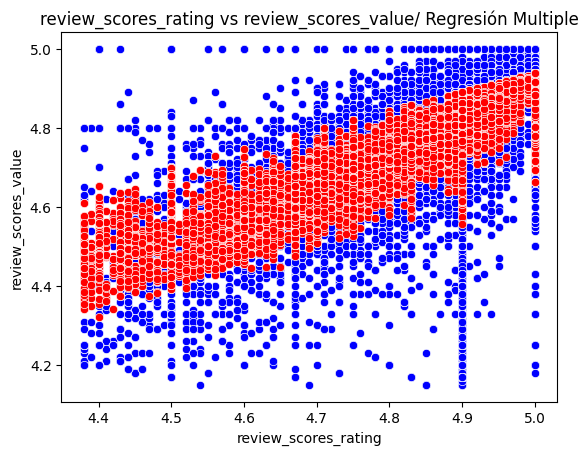

In [611]:
#Visualizamos la grafica comparativa entre el total real y el total parecido
sns.scatterplot(x='review_scores_rating', y='review_scores_value', color='blue', data=data_evaluar)
sns.scatterplot(x='review_scores_rating', y='predicciones_8', color='red', data=data_evaluar)
plt.title('review_scores_rating vs review_scores_value/ Regresión Multiple')
plt.show()

In [612]:
#Corrobaremos cual es el coeficiente de Determinación de nuestro modelo
coef_deter_8 = model_8.score(X=vars_indep_8, y=var_dep_8)
coef_deter_8

0.44801329272948875

In [613]:
#Corrobaremos cual es el coeficiente de correlación de nuestro modelo
coef_correl_8 = np.sqrt(coef_deter_8)
coef_correl_8

0.6693379510602164

##### Reviews Per Month

In [614]:
corr_factors1.sort_values(by='reviews_per_month', ascending=False).head(7)

host_is_superhost  room_type        id   host_id  \
reviews_per_month               0.255718   0.118153  0.218460  0.100186   
number_of_reviews_ltm           0.383337   0.155837  0.090543  0.063677   
host_is_superhost               1.000000   0.074308  0.069776  0.102150   
host_acceptance_rate            0.275697   0.053824  0.017318  0.024942   
number_of_reviews               0.337803   0.116879  0.255930  0.119480   
id                              0.069776   0.012383  1.000000  0.433434   
review_scores_checkin           0.086128   0.061800  0.237492  0.118049   

                       host_response_rate  host_acceptance_rate  \
reviews_per_month                0.019958              0.249251   
number_of_reviews_ltm            0.022801              0.272686   
host_is_superhost                0.037007              0.275697   
host_acceptance_rate             0.093410              1.000000   
number_of_reviews                0.026578              0.220332   
id                               0.025025              0.017318   
review_scores_checkin            0.003761              0.103972   

                       host_listings_count  host_total_listings_count  \
reviews_per_month                 0.041989                   0.026340   
number_of_reviews_ltm             0.043414                   0.039579   
host_is_superhost                 0.180728                   0.141758   
host_acceptance_rate              0.051524                   0.042268   
number_of_reviews                 0.041390                   0.027147   
id                                0.014963                   0.004457   
review_scores_checkin             0.046944                   0.051566   

                       latitude  longitude  accommodates  bathrooms  bedrooms  \
reviews_per_month      0.030529   0.061815      0.010418   0.077730  0.068055   
number_of_reviews_ltm  0.006899   0.105498      0.018173   0.051251  0.048681   
host_is_superhost      0.018032   0.068334      0.005881   0.031841  0.040426   
host_acceptance_rate   0.019247   0.004012      0.003986   0.042542  0.047273   
number_of_reviews      0.000560   0.087639      0.009366   0.035166  0.041820   
id                     0.007077   0.005366      0.037620   0.083122  0.045141   
review_scores_checkin  0.007473   0.027646      0.016980   0.012181  0.020975   

                           beds     price  minimum_nights  maximum_nights  \
reviews_per_month      0.047295  0.124610        0.097039        0.047908   
number_of_reviews_ltm  0.037222  0.144408        0.011562        0.066067   
host_is_superhost      0.033462  0.093790        0.042090        0.041497   
host_acceptance_rate   0.002495  0.071405        0.028710        0.077244   
number_of_reviews      0.074168  0.118072        0.033367        0.094790   
id                     0.219951  0.060776        0.204390        0.243256   
review_scores_checkin  0.062587  0.058409        0.008721        0.049514   

                       maximum_maximum_nights  minimum_nights_avg_ntm  \
reviews_per_month                    0.047413                0.047781   
number_of_reviews_ltm                0.145558                0.056751   
host_is_superhost                    0.123942                0.057017   
host_acceptance_rate                 0.151438                0.009171   
number_of_reviews                    0.188953                0.062005   
id                                   0.269512                0.179040   
review_scores_checkin                0.113938                0.025322   

                       maximum_nights_avg_ntm  availability_30  \
reviews_per_month                    0.038408         0.154324   
number_of_reviews_ltm                0.132851         0.215681   
host_is_superhost                    0.118639         0.168378   
host_acceptance_rate                 0.143234         0.163765   
number_of_reviews                    0.179404         0.200797   
id                                   0.276685        

In [615]:
#Declaramos las variables dependientes e independientes para la regresión lineal
vars_indep_9 = data_evaluar[['number_of_reviews_ltm', 'host_is_superhost', 'host_acceptance_rate','number_of_reviews','id','review_scores_checkin']]
var_dep_9 = data_evaluar['reviews_per_month']

In [616]:
model_9 = LinearRegression()

In [617]:
#Ajustamos el modelo con las variables antes declaradas
model_9.fit(X=vars_indep_9, y=var_dep_9)

LinearRegression()

In [618]:
#Predecimos los valores de total de accidentes a partir de las variables: 'alcohol', 'speeding' y 'no_previous'
y_pred_9 = model_9.predict(X=data_evaluar[['number_of_reviews_ltm', 'host_is_superhost', 'host_acceptance_rate','number_of_reviews','id','review_scores_checkin']])

In [619]:
#Insertamos la columna de predicciones en el DataFrame
data_evaluar.insert(8,'predicciones_9',y_pred_9)
data_evaluar.head(3)

predicciones_1  predicciones_2  predicciones_3  predicciones_4  \
0        0.985837        0.696892        2.845129        0.820732   
1        0.963457        0.563975        1.965101        1.679142   
2        0.748759        0.099917        4.370139        1.994978   

   host_is_superhost  predicciones_6  predicciones_7  predicciones_8  \
0                  1        1.424824       53.007059        4.608086   
1                  1        1.093401       38.669061        4.641777   
2                  0        0.880529       43.304613        4.875908   

   predicciones_9  room_type        id  host_id  host_response_rate  \
0        0.721326          1   17878.0    68997                 1.0   
1        0.721326          1   25026.0   102840                 1.0   
2        0.721326          3  220377.0  1142424                 1.0   

   host_acceptance_rate  host_listings_count  host_total_listings_count  \
0                  1.00                  2.0                        5.0   
1                  0.82                  1.0                        5.0   
2                  0.47                  3.0                        3.0   

   latitude  longitude  accommodates  bathrooms  bedrooms  beds  price  \
0 -22.96599  -43.17940           5.0        1.0       2.0   2.0  55.80   
1 -22.97735  -43.19105           3.0        1.0       1.0   2.0  36.54   
2 -22.92880  -43.24046           2.0        1.0       1.0   1.0  39.60   

   minimum_nights  maximum_nights  maximum_maximum_nights  \
0             5.0            28.0                      28   
1             2.0            60.0                      60   
2             1.0           365.0                    1125   

   minimum_nights_avg_ntm  maximum_nights_avg_ntm  availability_30  \
0                     5.0                    28.0                6   
1                     2.0                    60.0               24   
2                     1.0                  1125.0                9   

   availability_60  availability_90  availability_365  number_of_reviews  \
0               32               51               274               10.0   
1               54               71               241               10.0   
2               29               41               283                5.0   

   number_of_reviews_ltm  review_scores_rating  review_scores_accuracy  \
0                   23.0                  4.71                    4.77   
1                   23.0                  4.73                    4.71   
2                    1.0                  5.00                    5.00   

   review_scores_cleanliness  review_scores_checkin  \
0                       4.64                   4.84   
1                       4.79                   4.82   
2                       5.00                   5.00   

   review_scores_communication  review_scores_location  review_scores_value  \
0                         4.91                    4.77                 4.67   
1                         4.92                    4.84                 4.62   
2                         4.80                    4.80                 5.00   

   calculated_host_listings_count  reviews_per_month  
0                             1.0               1.88  
1                             1.0               1.70  
2                             3.0               0.03

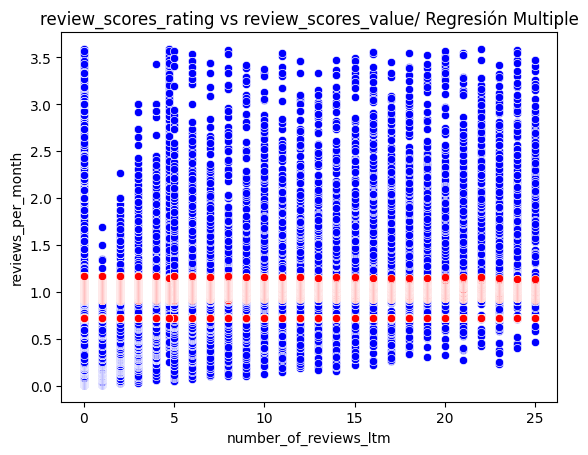

In [620]:
#Visualizamos la grafica comparativa entre el total real y el total parecido
sns.scatterplot(x='number_of_reviews_ltm', y='reviews_per_month', color='blue', data=data_evaluar)
sns.scatterplot(x='number_of_reviews_ltm', y='predicciones_9', color='red', data=data_evaluar)
plt.title('review_scores_rating vs review_scores_value/ Regresión Multiple')
plt.show()

In [621]:
#Corrobaremos cual es el coeficiente de Determinación de nuestro modelo
coef_deter_9 = model_9.score(X=vars_indep_9, y=var_dep_9)
coef_deter_9

0.04772472180970566

In [622]:
#Corrobaremos cual es el coeficiente de correlación de nuestro modelo
coef_correl_9 = np.sqrt(coef_deter_9)
coef_correl_9

0.21845988604250818

##### host_id

In [623]:
corr_factors1.sort_values(by='host_id', ascending=False).head(7)

host_is_superhost  room_type        id   host_id  \
host_id                          0.102150   0.061589  0.433434  1.000000   
id                               0.069776   0.012383  1.000000  0.433434   
minimum_nights_avg_ntm           0.057017   0.234102  0.179040  0.179613   
minimum_nights                   0.042090   0.205371  0.204390  0.178154   
review_scores_value              0.058019   0.084735  0.276022  0.141593   
maximum_nights                   0.041497   0.031571  0.243256  0.132185   
beds                             0.033462   0.208207  0.219951  0.126870   

                        host_response_rate  host_acceptance_rate  \
host_id                           0.007796              0.024942   
id                                0.025025              0.017318   
minimum_nights_avg_ntm            0.015783              0.009171   
minimum_nights                    0.009866              0.028710   
review_scores_value               0.016971              0.015801   
maximum_nights                    0.054833              0.077244   
beds                              0.014385              0.002495   

                        host_listings_count  host_total_listings_count  \
host_id                            0.083874                   0.118505   
id                                 0.014963                   0.004457   
minimum_nights_avg_ntm             0.008391                   0.024455   
minimum_nights                     0.019066                   0.004046   
review_scores_value                0.051222                   0.053984   
maximum_nights                     0.081313                   0.073868   
beds                               0.004095                   0.006944   

                        latitude  longitude  accommodates  bathrooms  \
host_id                 0.037838   0.089633      0.039742   0.088504   
id                      0.007077   0.005366      0.037620   0.083122   
minimum_nights_avg_ntm  0.002202   0.138210      0.110692   0.101063   
minimum_nights          0.009024   0.118161      0.096958   0.102723   
review_scores_value     0.024614   0.019142      0.030507   0.012289   
maximum_nights          0.025189   0.048572      0.003412   0.020729   
beds                    0.068937   0.026292      0.559719   0.392558   

                        bedrooms      beds     price  minimum_nights  \
host_id                 0.051313  0.126870  0.080573        0.178154   
id                      0.045141  0.219951  0.060776        0.204390   
minimum_nights_avg_ntm  0.101523  0.104093  0.114845        0.877475   
minimum_nights          0.101862  0.094317  0.121920        1.000000   
review_scores_value     0.005292  0.070641  0.014069        0.041475   
maximum_nights          0.014341  0.079476  0.032648        0.167401   
beds                    0.478755  1.000000  0.241413        0.094317   

                        maximum_nights  maximum_maximum_nights  \
host_id                       0.132185                0.088349   
id                            0.243256                0.269512   
minimum_nights_avg_ntm        0.167366                0.026252   
minimum_nights                0.167401                0.045588   
review_scores_value           0.043010                0.097991   
maximum_nights                1.000000                0.190727   
beds                          0.079476                0.075115   

                        minimum_nights_avg_ntm  maximum_nights_avg_ntm  \
host_id                               0.179613                0.079150   
id                                    0.179040                0.276685   
minimum_nights_avg_ntm                1.000000                0.025137   
minimum_nights                        0.877475                0.030640   
review_scores_value                   0.056585                0.088181   
maximum_nights                        0.167366                0.205378   
beds                                  0.104093                0.063859   

 

In [624]:
#Declaramos las variables dependientes e independientes para la regresión lineal
vars_indep_10 = data_evaluar[['minimum_nights_avg_ntm', 'minimum_nights', 'review_scores_value','maximum_nights','beds']]
var_dep_10 = data_evaluar['host_id']

In [625]:
model_10 = LinearRegression()

In [626]:
#Ajustamos el modelo con las variables antes declaradas
model_10.fit(X=vars_indep_10, y=var_dep_10)

LinearRegression()

In [627]:
#Predecimos los valores de total de accidentes a partir de las variables: 'alcohol', 'speeding' y 'no_previous'
y_pred_10 = model_10.predict(X=data_evaluar[['minimum_nights_avg_ntm', 'minimum_nights', 'review_scores_value','maximum_nights','beds']])

In [628]:
#Insertamos la columna de predicciones en el DataFrame
data_evaluar.insert(9,'predicciones_10',y_pred_10)
data_evaluar.head(3)

predicciones_1  predicciones_2  predicciones_3  predicciones_4  \
0        0.985837        0.696892        2.845129        0.820732   
1        0.963457        0.563975        1.965101        1.679142   
2        0.748759        0.099917        4.370139        1.994978   

   host_is_superhost  predicciones_6  predicciones_7  predicciones_8  \
0                  1        1.424824       53.007059        4.608086   
1                  1        1.093401       38.669061        4.641777   
2                  0        0.880529       43.304613        4.875908   

   predicciones_9  predicciones_10  room_type        id  host_id  \
0        0.721326     8.734631e+07          1   17878.0    68997   
1        0.721326     1.654446e+08          1   25026.0   102840   
2        0.721326     2.877828e+08          3  220377.0  1142424   

   host_response_rate  host_acceptance_rate  host_listings_count  \
0                 1.0                  1.00                  2.0   
1                 1.0                  0.82                  1.0   
2                 1.0                  0.47                  3.0   

   host_total_listings_count  latitude  longitude  accommodates  bathrooms  \
0                        5.0 -22.96599  -43.17940           5.0        1.0   
1                        5.0 -22.97735  -43.19105           3.0        1.0   
2                        3.0 -22.92880  -43.24046           2.0        1.0   

   bedrooms  beds  price  minimum_nights  maximum_nights  \
0       2.0   2.0  55.80             5.0            28.0   
1       1.0   2.0  36.54             2.0            60.0   
2       1.0   1.0  39.60             1.0           365.0   

   maximum_maximum_nights  minimum_nights_avg_ntm  maximum_nights_avg_ntm  \
0                      28                     5.0                    28.0   
1                      60                     2.0                    60.0   
2                    1125                     1.0                  1125.0   

   availability_30  availability_60  availability_90  availability_365  \
0                6               32               51               274   
1               24               54               71               241   
2                9               29               41               283   

   number_of_reviews  number_of_reviews_ltm  review_scores_rating  \
0               10.0                   23.0                  4.71   
1               10.0                   23.0                  4.73   
2                5.0                    1.0                  5.00   

   review_scores_accuracy  review_scores_cleanliness  review_scores_checkin  \
0                    4.77                       4.64                   4.84   
1                    4.71                       4.79                   4.82   
2                    5.00                       5.00                   5.00   

   review_scores_communication  review_scores_location  review_scores_value  \
0                         4.91                    4.77                 4.67   
1                         4.92                    4.84                 4.62   
2                         4.80                    4.80                 5.00   

   calculated_host_listings_count  reviews_per_month  
0                             1.0               1.88  
1                             1.0               1.70  
2                             3.0               0.03

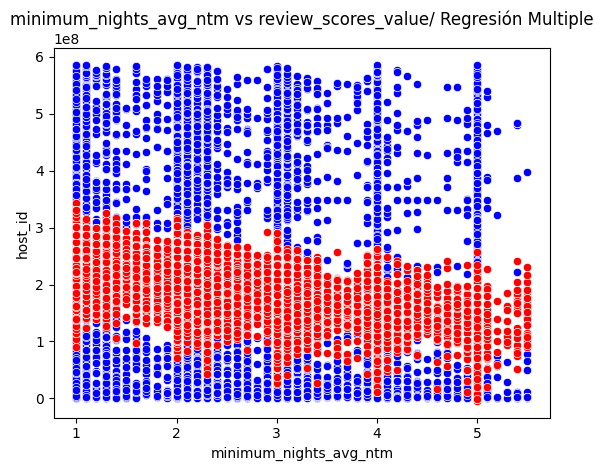

In [629]:
#Visualizamos la grafica comparativa entre el total real y el total parecido
sns.scatterplot(x='minimum_nights_avg_ntm', y='host_id', color='blue', data=data_evaluar)
sns.scatterplot(x='minimum_nights_avg_ntm', y='predicciones_10', color='red', data=data_evaluar)
plt.title('minimum_nights_avg_ntm vs review_scores_value/ Regresión Multiple')
plt.show()

In [630]:
#Corrobaremos cual es el coeficiente de Determinación de nuestro modelo
coef_deter_10 = model_10.score(X=vars_indep_10, y=var_dep_10)
coef_deter_10

0.06997846847605471

In [631]:
#Corrobaremos cual es el coeficiente de correlación de nuestro modelo
coef_correl_10 = np.sqrt(coef_deter_10)
coef_correl_10

0.2645344372214225

##### Tabla de Correlaciones

In [634]:
#Preparar datos del Frame
coef_data = {'Coef_Deter':[coef_deter_1,coef_deter_2,coef_deter_3,coef_deter_4,coef_deter_6,coef_deter_7,coef_deter_8,coef_deter_9,coef_deter_10],
             'Coef_Correl':[coef_correl_1,coef_correl_2,coef_correl_3,coef_correl_4,coef_correl_6,coef_correl_7,coef_correl_8,coef_correl_9,coef_correl_10]}

#Generar con llaves
df_coef_mult = pd.DataFrame(coef_data,index=['host_id', 'host_acceptance_rate', 'host_is_superhost', 'host_total_listings_count', 'room_type', 'bedrooms','price','review_scores_value','reviews_per_month'])
print('Tabla de correlaciones REGRESIóN LINEAL MULTIPLE\n\n',df_coef_mult)

Tabla de correlaciones REGRESIóN LINEAL MULTIPLE

                            Coef_Deter  Coef_Correl
host_id                      0.138058     0.371562
host_acceptance_rate         0.230070     0.479656
host_is_superhost            0.577163     0.759713
host_total_listings_count    0.225120     0.474469
room_type                    0.520498     0.721456
bedrooms                     0.230506     0.480110
price                        0.448013     0.669338
review_scores_value          0.047725     0.218460
reviews_per_month            0.069978     0.264534
